# Introduction

The following project for DSA5102X will attempt to study the dataset which contains information on bank default payments, demographic factors, credit data, payment history, and bill statements of credit card clients in Taiwan from Apr-Sep 2005.

Acknowledgements & Data Source:

Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients]. Irvine, CA: University of California, School of Information and Computer Science.

# Key Data Exploration Ideas

The study would like to investigate exploratory data analysis methods through visualizations to see correlations between different variables. Feature engineering is performed on current variables in an attempt to increase metric scoring. Study on the strongest predictors for default payment will be conducted.

**Problem statement**:
- Supervised learning task - binary classification for defaulters and non-defaulters for credit payment through 5 models - logistic regression, random forest classifier (bagging), Adaboost & XGBoost classifiers (boosting) and fully connected NN (FCNN). In context to bank defaults, there would be a high cost for the bankwhen a default credit card is predicted as non-default, as no actions would be taken from the bank. Thus, RECALL will be an important metric to be evaluated. RECALL holds more importance over PRECISION in the case of classifying defaulters, because we want the ability to catch as many potential defaulters as possible, so that the bank will not incur any losses. As we will note, there is class imbalance between binary target variables, hence accuracy is not an appropriate measure. F1-score is also looked at, which is a weighted average of precision / recall considering both false positive / negatives.

- Unsupervised learning task - utilization of principal component analysis and autoencoder dimensional reduction methods and K-Means and DBSCAN to determine the clusters. Principal component analysis as an exploratory data analysis method to observe structures within the initial dataset


## Description of variables within dataset

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

# Importing useful libraries

In [1]:
# Setting random seed for reproducibility
randomseed=69
from numpy.random import seed
seed(randomseed)
from tensorflow.random import set_seed
set_seed(randomseed)

In [2]:
# Pickle
import pickle
# Linear Algebra
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1, rc={'figure.figsize':(11.7,8.27)})
# Sci-kit learn
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, matthews_corrcoef, make_scorer, confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, precision_recall_fscore_support, f1_score, make_scorer, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# XGBoost
from xgboost import XGBClassifier
# Imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
# Tensorflow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.losses import categorical_crossentropy, BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import Recall




In [3]:
default_df = pd.read_csv('UCI_Credit_Card.csv')
default_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


At first look, we can see that some variables minimum values stood out for not matching the description of the features. For **Education and Marriage**, the zeroes could have been used to replace missing values. For '-2' on **PAY_X**, they did not have an explanation, but it should have a similar meaning as to that of -1 and 0, whereby they are all associated to have a lower chance of default.

For **BILL_AMTX**, we can see that there are high negative values, which could have meant that the bank customers paid more than required for their debt. A lower probability of credit card default should be expected for these people.

In [4]:
# Checking for missing data in all columns
default_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

From the above, we can make a few observations:

- There are 30,000 distinct credit card clients
- The average amount of credit limit balance is 167,484 with maximum value of 1 million.
- Average age of clients is 35.
- ID of the client can be excluded since it only identifies each client as in ID and will not play any part in predictions of model.
- We can see that there are no missing values within the data set, we do not have to do any adjustments
- We can note that we have 3 categorical variables, sex, education and marriage. We can consider sex and marriage as NOMINAL (one-hot encode) and education as ORDINAL (maintain the ordering)
- Excluding ID of clients, we have a total of 20 numerical variables. Without taking a look at the correlation of data initially, one can have the intuition to think that the repayment statuses will be highly correlated to one another the closer the months are (for PAY_ variables)

# Analyzing the total number of binary classes in target variable

Text(0.9, 8000, '22.12%')

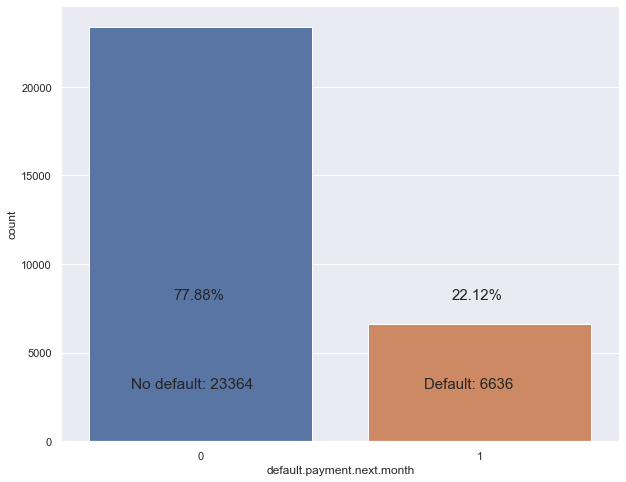

In [5]:
# Let us get the total number of defaults (1) and no defaults (0)
default_cases = default_df['default.payment.next.month'].sum()
no_default_cases = len(default_df['default.payment.next.month']) - default_cases

# Percentage of the defaults
default_percent = round(default_cases/len(default_df['default.payment.next.month'])*100, 2)
no_default_percent = 100 - default_percent

fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(x='default.payment.next.month', data=default_df)
plt.annotate(f'No default: {no_default_cases}', 
             xy=(-0.25, 3000), # xy = (x dist from 0, y dist from 0)
            size=15.5)

plt.annotate(f'Default: {default_cases}', 
             xy=(0.8, 3000), # xy = (x dist from 0, y dist from 0)
            size=15)
plt.annotate(f'{no_default_percent}%', xy=(-0.1, 8000),size=15)
plt.annotate(f'{default_percent}%', xy=(0.9, 8000),size=15)

We can see that from the above, the total number of no default cases is almost 4 times that of the number of default cases. We can experiment sampling methods such as undersampling / oversampling / SMOTE to see whether it improves our prediction result (recall / f1-score)

# Exploratory Data Analysis & Feature Engineering by Clipping



## Categorical Variables

In [6]:
catcol = ['SEX', 'EDUCATION', 'MARRIAGE']
default_df[catcol].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


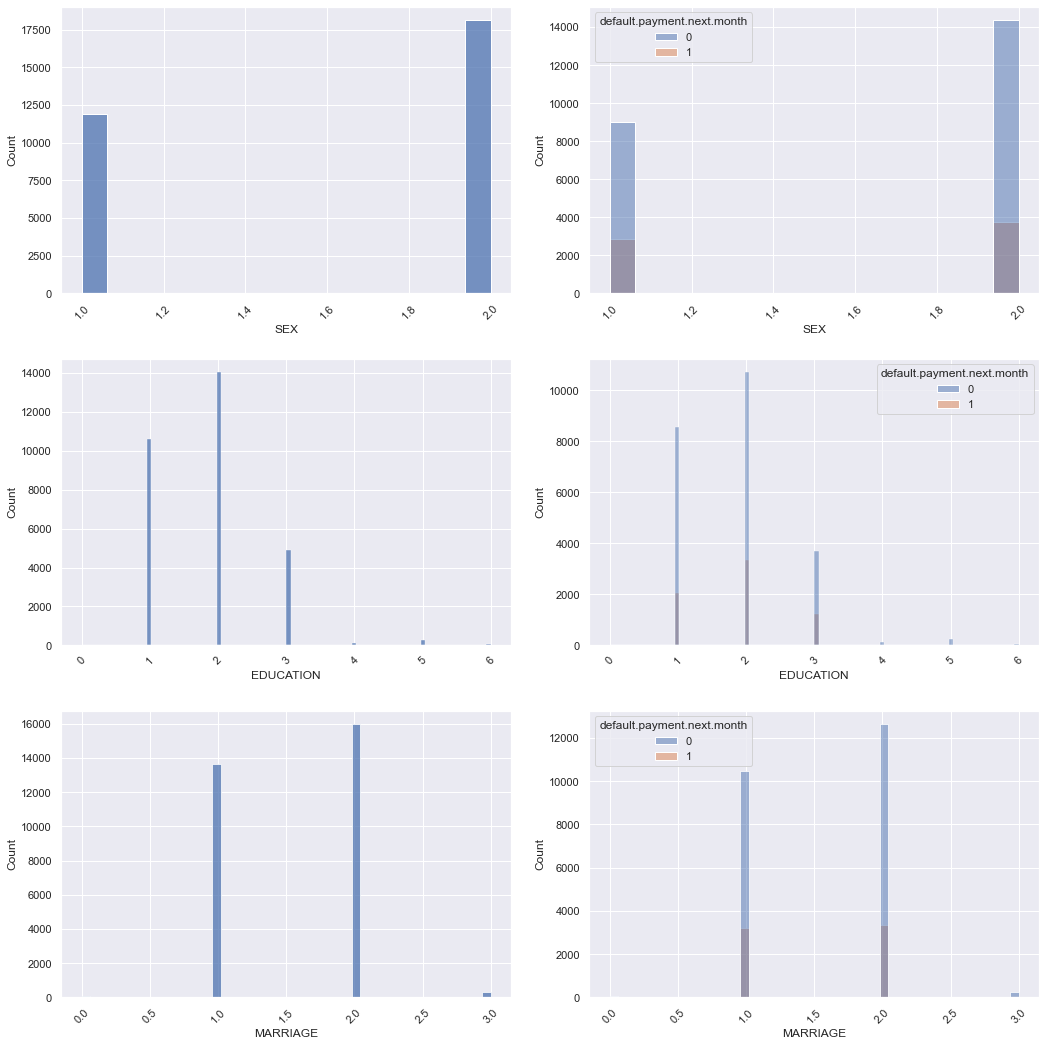

In [7]:
fig, ax = plt.subplots(len(catcol), 2, figsize=(15,15))
for i,cat in enumerate(catcol):
    sns.histplot(x=cat, data=default_df, ax=ax[i][0])
    sns.histplot(x=cat, data=default_df, hue='default.payment.next.month', ax=ax[i][1])
    ax[i][0].tick_params(axis='x', rotation=45)
    ax[i][1].tick_params(axis='x', rotation=45)
    
fig.tight_layout(pad=2.0)
plt.show()

We can see that for all categorical variables, there is varying seperabilities for both default and non-default case.

### Sex


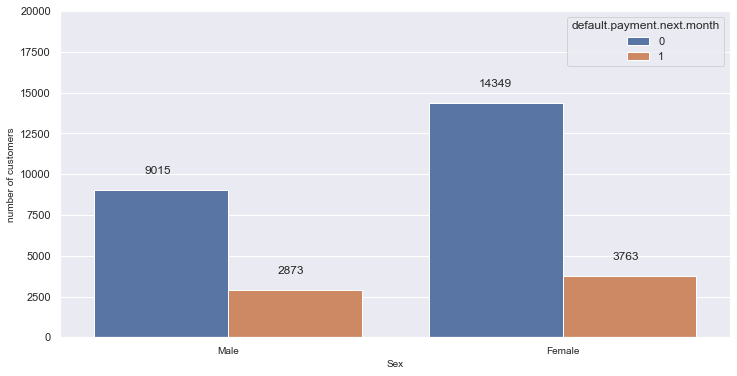

In [8]:
plt.figure(figsize=(12,6))

ax = sns.countplot(data=default_df, x='SEX', hue='default.payment.next.month')
plt.xlabel('Sex', fontsize=10)
plt.ylabel('number of customers', fontsize=10)
plt.ylim(0,20000)
plt.xticks([0, 1], ['Male', 'Female'], fontsize=10)

for patch in ax.patches:
    ax.annotate((patch.get_height()), (patch.get_x()+0.15, patch.get_height()+1000))
    
plt.show()

In [9]:
default_df['default.payment.next.month'].groupby(default_df['SEX']).value_counts(normalize = True)

SEX  default.payment.next.month
1    0                             0.758328
     1                             0.241672
2    0                             0.792237
     1                             0.207763
Name: default.payment.next.month, dtype: float64

From the above, We can see that male customers have a slightly higher credit default probability as compared to that of females

### Education

In [10]:
default_df[['EDUCATION']].value_counts()

EDUCATION
2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
dtype: int64

From the above, we can see the 'EDUCATION' column has unclassified samples that are set at 0. For simplicity, we will set 0, 5 and 6 value counts in education as 4 (others) to denote other education levels. The interpretation of other can be education levels that are below high school or above graduate school. 

In [11]:
clip_edu_val = (default_df['EDUCATION'] == 5) | (default_df['EDUCATION'] == 6) | (default_df['EDUCATION'] == 0) 
default_df.loc[clip_edu_val, 'EDUCATION'] = 4

default_df[['EDUCATION']].value_counts()

EDUCATION
2            14030
1            10585
3             4917
4              468
dtype: int64

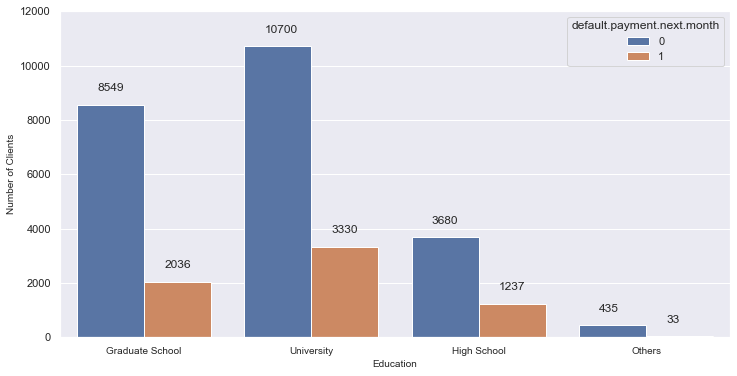

In [12]:
plt.figure(figsize=(12,6))

ax = sns.countplot(data = default_df, x = 'EDUCATION', hue="default.payment.next.month")

plt.xlabel("Education", fontsize= 10)
plt.ylabel("Number of Clients", fontsize= 10)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Graduate School','University','High School','Others'], fontsize = 10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

In [13]:
default_df['default.payment.next.month'].groupby(default_df['EDUCATION']).value_counts(normalize = True)

EDUCATION  default.payment.next.month
1          0                             0.807652
           1                             0.192348
2          0                             0.762651
           1                             0.237349
3          0                             0.748424
           1                             0.251576
4          0                             0.929487
           1                             0.070513
Name: default.payment.next.month, dtype: float64

We can make the observation that majority of the customers have an education level of university, followed by graduate school, high school and others.

Considering the Graduate School, University and High school, we can see that a higher education level usually results in a lower probability of credit card default. However, for the category 'others' they have a significantly lower probability.

### Marriage

In [14]:
default_df[['MARRIAGE']].value_counts()

MARRIAGE
2           15964
1           13659
3             323
0              54
dtype: int64

For marriage column, we can see that we have unclassified samples that are set at 0, hence, for simplicity, we will assume that these samples can be classified as others (3). The interpretation of 'others' could be for customers who are separated or divorced.

In [15]:
clip_marriage_val = (default_df['MARRIAGE'] == 0)
default_df.loc[clip_marriage_val, 'MARRIAGE'] = 3

default_df[['MARRIAGE']].value_counts()

MARRIAGE
2           15964
1           13659
3             377
dtype: int64

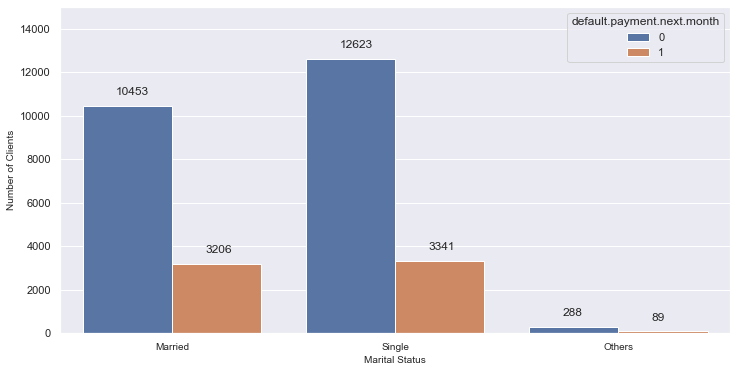

In [16]:
plt.figure(figsize=(12,6))

ax = sns.countplot(data = default_df, x = 'MARRIAGE', hue="default.payment.next.month")

plt.xlabel("Marital Status", fontsize= 10)
plt.ylabel("Number of Clients", fontsize= 10)
plt.ylim(0,15000)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+500))

plt.show()

In [17]:
default_df['default.payment.next.month'].groupby(default_df['MARRIAGE']).value_counts(normalize = True)

MARRIAGE  default.payment.next.month
1         0                             0.765283
          1                             0.234717
2         0                             0.790717
          1                             0.209283
3         0                             0.763926
          1                             0.236074
Name: default.payment.next.month, dtype: float64

From the above, we can see that majority of the customers fall under married or single category. Those who are single has a lower chance of default as compared to that of married people. Those who are under 'others' who might be divorced have a higher probability of defaults.

## Numerical Variables

In [18]:
drop_cols = ['SEX','MARRIAGE','EDUCATION','ID','default.payment.next.month']
numcol = default_df.drop(columns=drop_cols).columns

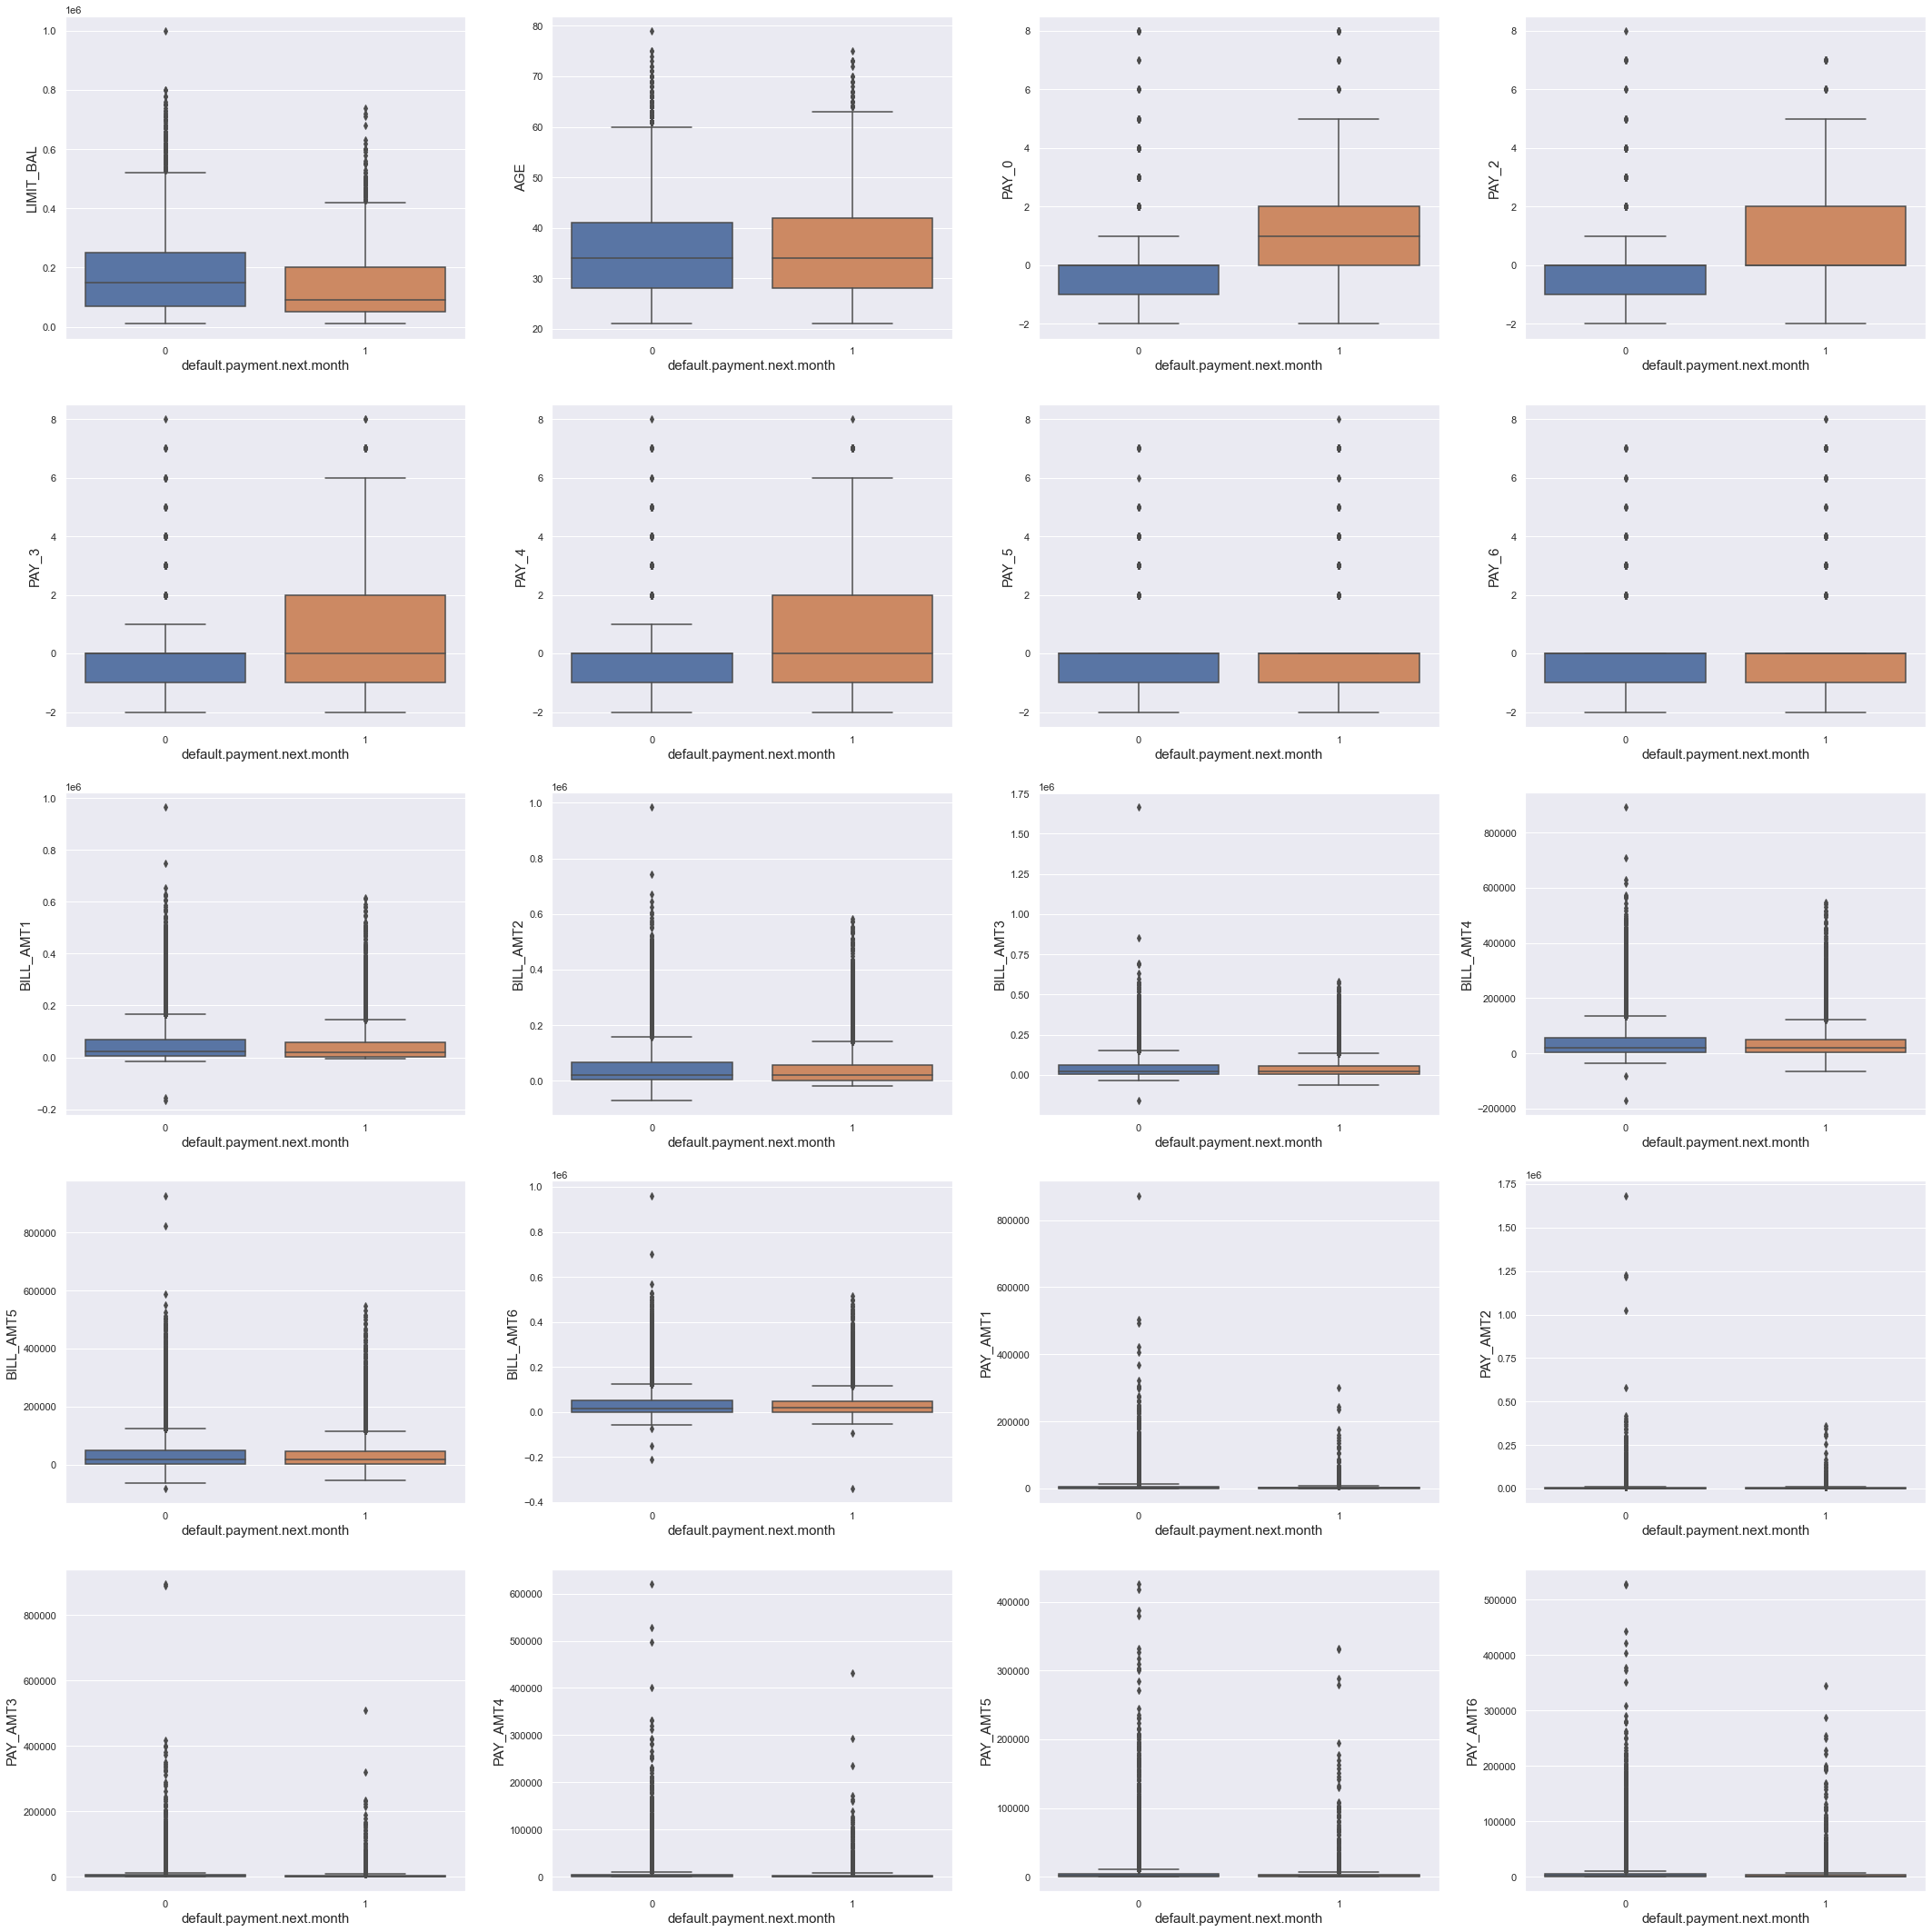

In [19]:
fig, ax2 = plt.subplots(ncols=4, nrows=5, figsize=(30,30))

colno = 0

for axrow in range(5):
    for axcol in range(4):
        if colno <= len(numcol)-1:
            sns.boxplot(x='default.payment.next.month', y=numcol[colno], data=default_df, ax=ax2[axrow][axcol])
            ax2[axrow][axcol].tick_params(axis='x')
            ax2[axrow][axcol].set_ylabel(numcol[colno], fontsize=15)
            ax2[axrow][axcol].set_xlabel('default.payment.next.month', fontsize=15)
            ax2[axrow][axcol].xaxis.label.set_size(15)
            ax2[axrow][axcol].yaxis.label.set_size(15)
            colno += 1
            
# for i,num in enumerate(numcol):
#     sns.boxplot(x='default.payment.next.month', y=num, data=default_df, ax=ax2[i])
#     ax2[i].tick_params(axis='x', rotation=45)
    
fig.tight_layout(pad=2.0)
plt.show()

### Repayment Status (PAY_0 to PAY_6)

In [20]:
default_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


We can see that for all PAY variables, they have unclassified label -2. We can assume that all negative numbers (-1 and -2) means the person has paid on time and positive numbers represent the number of months of delay. The values -1 and -2 will be clipped to the value of 0, indicating that there is timely payment for these data

In [21]:
numlist = [0,2,3,4,5,6]

# Clip all negative values to 0 instead, indicating that they all paid timely
for num in numlist:
    replace = (default_df[f'PAY_{num}'] == -2) | (default_df[f'PAY_{num}'] == -1) | (default_df[f'PAY_{num}'] == 0)
    default_df.loc[replace, f'PAY_{num}'] = 0


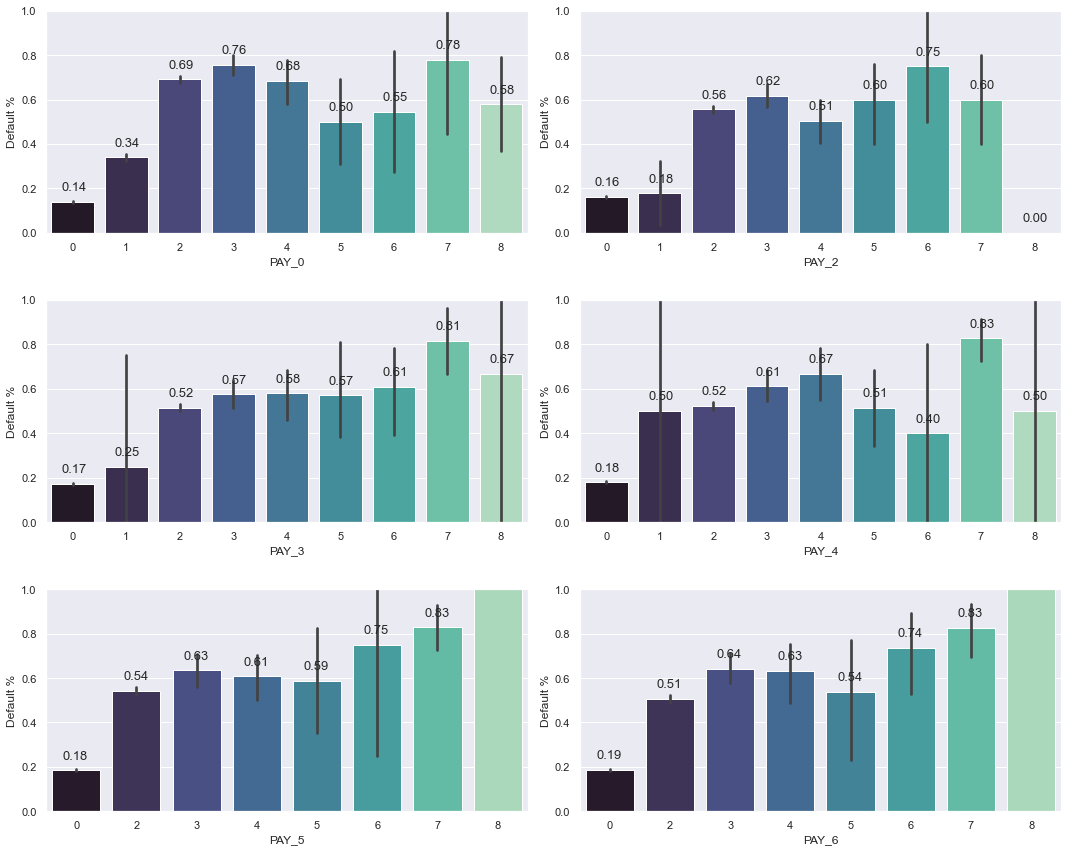

In [22]:
PAY_X_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(PAY_X_cols):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default.payment.next.month", data = default_df, palette = 'mako')
    plt.ylabel("Default %", fontsize= 12)
    plt.ylim(0,1.0)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.18, p.get_height()+0.05),fontsize=13)

plt.show()

We can see that majority of the customers are paying their credit card bills on time, and that their likelihood of defaulting in the subsequent months will be lowest. 

### Age

We start by analyzing the general distribution of age variable to get a sensing of the bank customer's age.

C:\Users\Gary2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


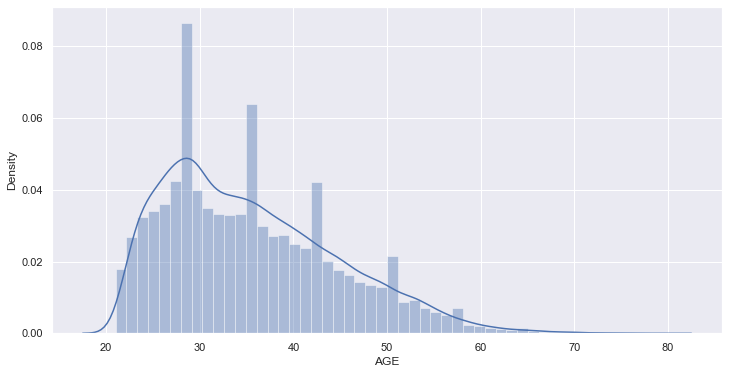

In [23]:
plt.figure(figsize=(12,6))

sns.distplot(default_df['AGE'])
plt.ylabel('Density')
plt.show()

From the above, we can see that majority of our customers lie between the age of 25-40. Let us take a look at their default probability for age variable

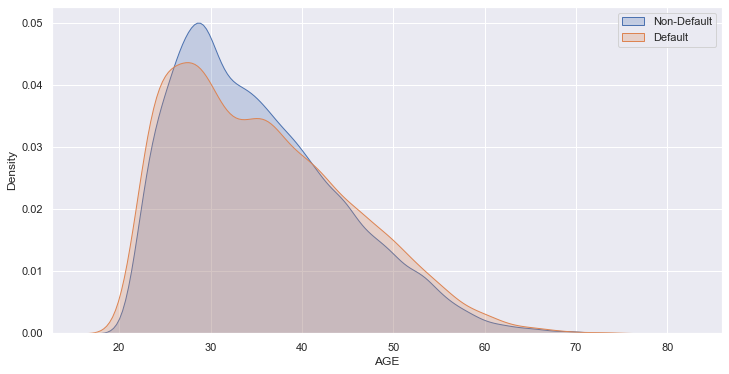

In [24]:
plt.figure(figsize=(12,6))

sns.kdeplot(default_df.loc[(default_df['default.payment.next.month'] == 0), 'AGE'], label = 'Non-Default', shade = True)
sns.kdeplot(default_df.loc[(default_df['default.payment.next.month'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('Density')
plt.legend()
plt.show()

From the above, we can see that there is a higher default for people in the age group 20-25 approximately, but we can separate out the age groups to be sure that this is the case. 

In [25]:
# Create new dataframe, we will add consider categorical age group variable
# in the feature engineering portion of the notebook.
# Max age = 79 from this dataset.
copy_default_df = default_df.copy()
copy_default_df['AgeGroup'] = pd.cut(copy_default_df['AGE'], [20, 25, 30, 35, 40, 50, 60, 80])

print(copy_default_df['AgeGroup'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeGroup, dtype: int64


Checking probability of default for the different age groups:

In [26]:
copy_default_df['default.payment.next.month'].groupby(copy_default_df['AgeGroup']).value_counts(normalize=True)

AgeGroup  default.payment.next.month
(20, 25]  0                             0.733402
          1                             0.266598
(25, 30]  0                             0.798516
          1                             0.201484
(30, 35]  0                             0.805728
          1                             0.194272
(35, 40]  0                             0.783811
          1                             0.216189
(40, 50]  0                             0.767027
          1                             0.232973
(50, 60]  0                             0.747621
          1                             0.252379
(60, 80]  0                             0.731618
          1                             0.268382
Name: default.payment.next.month, dtype: float64

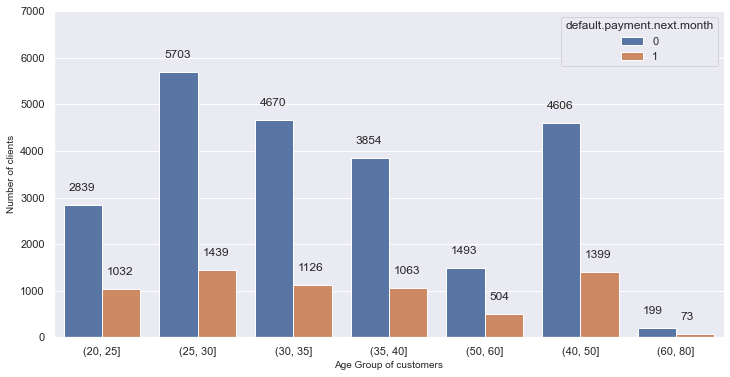

In [27]:
# Visualize the above result.
plt.figure(figsize=(12,6))
# Convert the numerical type to string type
copy_default_df['AgeGroup'] = copy_default_df['AgeGroup'].astype('str')

ax = sns.countplot(data=copy_default_df, x='AgeGroup', hue='default.payment.next.month')
plt.xlabel('Age Group of customers', fontsize=10)
plt.ylabel('Number of clients', fontsize=10)
plt.ylim(0,7000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+300))
    
plt.show()

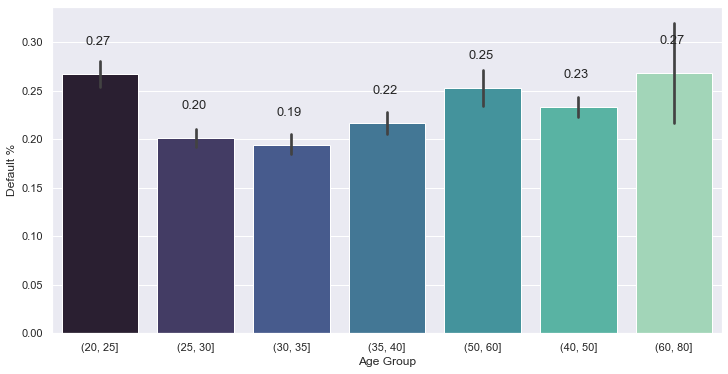

In [28]:
plt.figure(figsize=(12,6))

ax = sns.barplot(x='AgeGroup', y='default.payment.next.month', data=copy_default_df, palette='mako')
plt.xlabel('Age Group')
plt.ylabel('Default %')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

We can see that from the above plot, we can see that the age group 30-35 bank customers has lowest probability of default. However, for those in the extreme ends, such as 20-25 and 60-80 age groups, they show that they have highest probability of default.

### Credit Limit Balance - LIMIT_BAL

Intuitively, we would expect the credit limit balance to have a significant impact on customer's default rate, as it is somewhat a measure of a person's ability to pay debt. Let us first take a look at the distribution plot of limit balances.

C:\Users\Gary2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


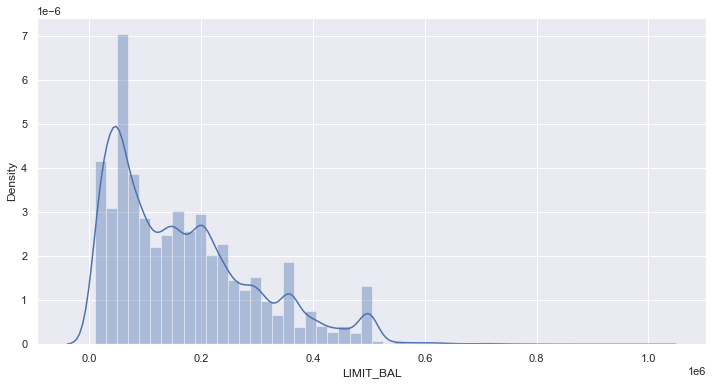

In [29]:
plt.figure(figsize=(12,6))

sns.distplot(default_df['LIMIT_BAL'])
plt.ylabel('Density')
plt.show()

Let us put a hue on the above plot.

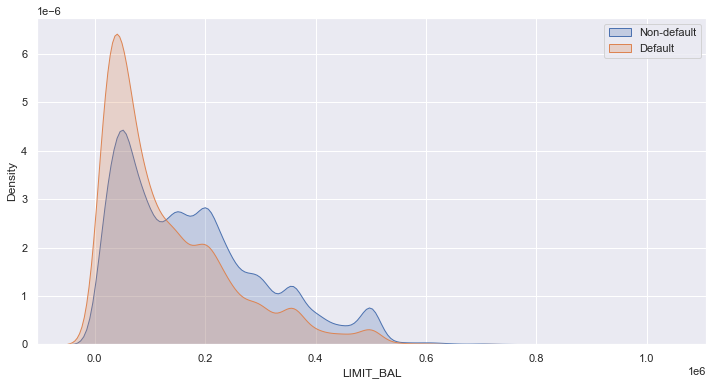

In [30]:
plt.figure(figsize=(12,6))

sns.kdeplot(default_df.loc[default_df['default.payment.next.month'] == 0, 'LIMIT_BAL'], label='Non-default', shade=True)
sns.kdeplot(default_df.loc[default_df['default.payment.next.month'] == 1, 'LIMIT_BAL'], label='Default', shade=True)
plt.ylabel('Density')
plt.legend()
plt.show()

From the above, majority of the customers have 200k credit limit balance or less. We can expect to find more customers in default within that range. Then again, we can make use of bin grouping to split the customers and analyze percentage of default. We can make use of the copy_default_df as before to create this variable

In [31]:
copy_default_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [32]:
copy_default_df['LimitBalGroup'] = pd.cut(copy_default_df['LIMIT_BAL'], [0, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1000000])
copy_default_df['LimitBalGroup'] = copy_default_df['LimitBalGroup'].astype('str')
print(copy_default_df['LimitBalGroup'].value_counts())

(0, 50000]           7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1000000]     206
Name: LimitBalGroup, dtype: int64


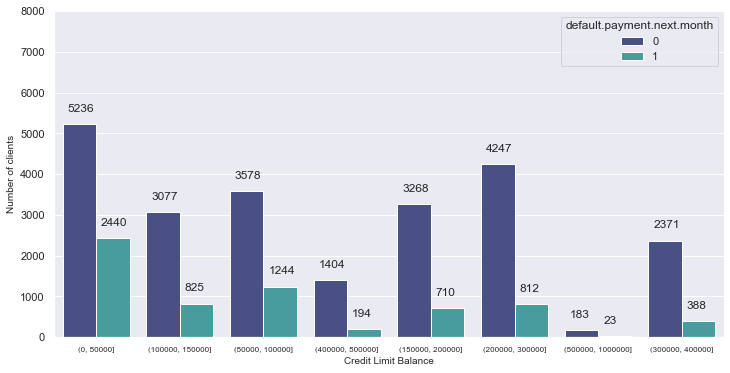

In [33]:
plt.figure(figsize=(12,6))

ax = sns.countplot(data=copy_default_df, x='LimitBalGroup', hue='default.payment.next.month', palette='mako')
plt.xlabel('Credit Limit Balance', fontsize=10)
plt.ylabel('Number of clients', fontsize=10)
plt.ylim(0,8000)
ax.tick_params(axis='x', labelsize=8)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300))

plt.show()

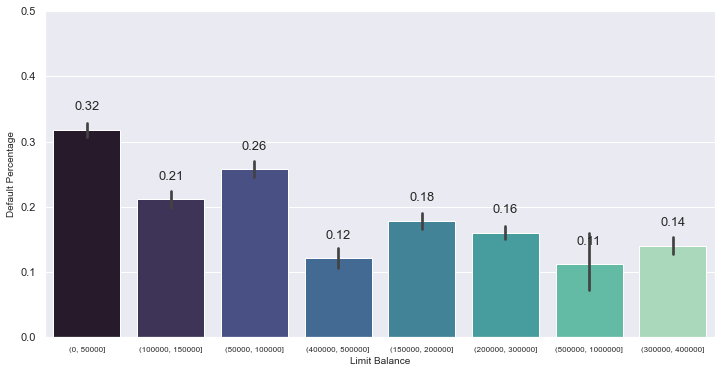

In [34]:
plt.figure(figsize=(12,6))

ax = sns.barplot(x = "LimitBalGroup", y = "default.payment.next.month", data = copy_default_df, palette = 'mako')

plt.xlabel("Limit Balance", fontsize= 10)
plt.ylabel("Default Percentage", fontsize= 10)
plt.ylim(0,0.5)
ax.tick_params(axis='x', labelsize=8)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

From the above, we can see that there is a high default rate as the customer's credit limit balance is decreasing. 

As part of feature engineering, we could consider the above.

Let us take a look at the correlation between credit limit balance to features in the dataset.

- **Limit Balance vs Marriage**
- **Limit Balance vs Education**
- **Limit Balance vs Age**

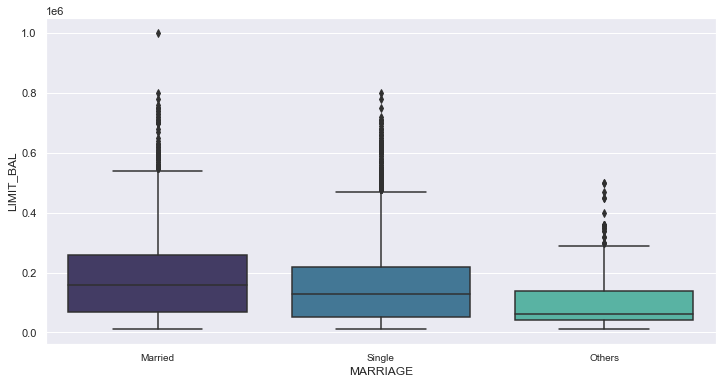

In [35]:
plt.figure(figsize=(12,6))

sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=copy_default_df, palette='mako')
plt.xticks([0,1,2], ['Married', 'Single', 'Others'], fontsize=10)
plt.show()

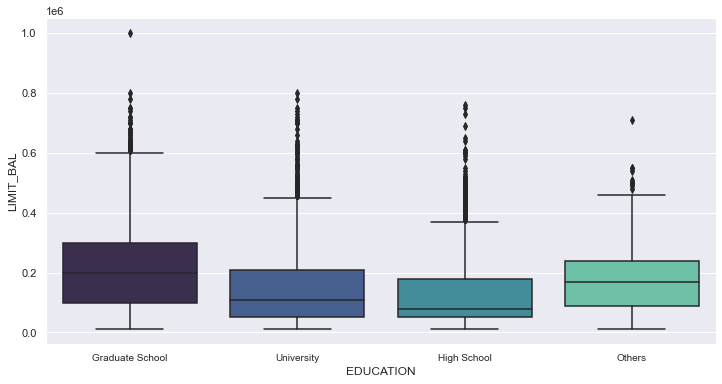

In [36]:
plt.figure(figsize=(12,6))

sns.boxplot(x='EDUCATION', y='LIMIT_BAL', data=copy_default_df, palette='mako')
plt.xticks([0,1,2,3], ['Graduate School', 'University', 'High School', 'Others'], fontsize=10)
plt.show()

We could see that generally, for the 3 education levels that are known, with higher education levels, we observe that they tend to have higher limit balance, possibly from being able to secure higher paying jobs and hence higher credit limit.

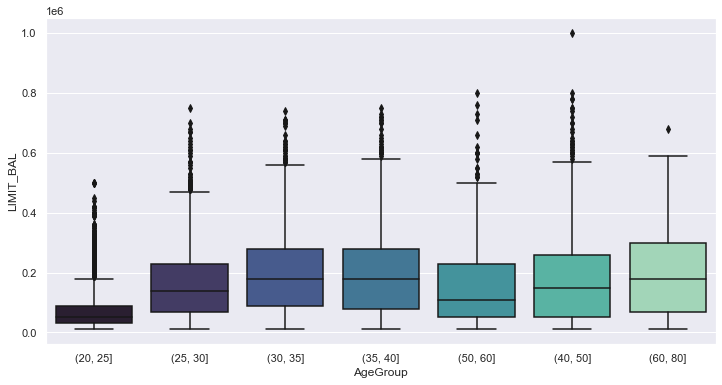

In [37]:
plt.figure(figsize=(12,6))

sns.boxplot(x='AgeGroup', y='LIMIT_BAL', data=copy_default_df, palette='mako')
plt.show()

From the above, the credit limit increases from age 20 to 40, and then stagnates after.

### Amount of bill statement (BILL_AMTX)

C:\Users\Gary2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gary2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gary2\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

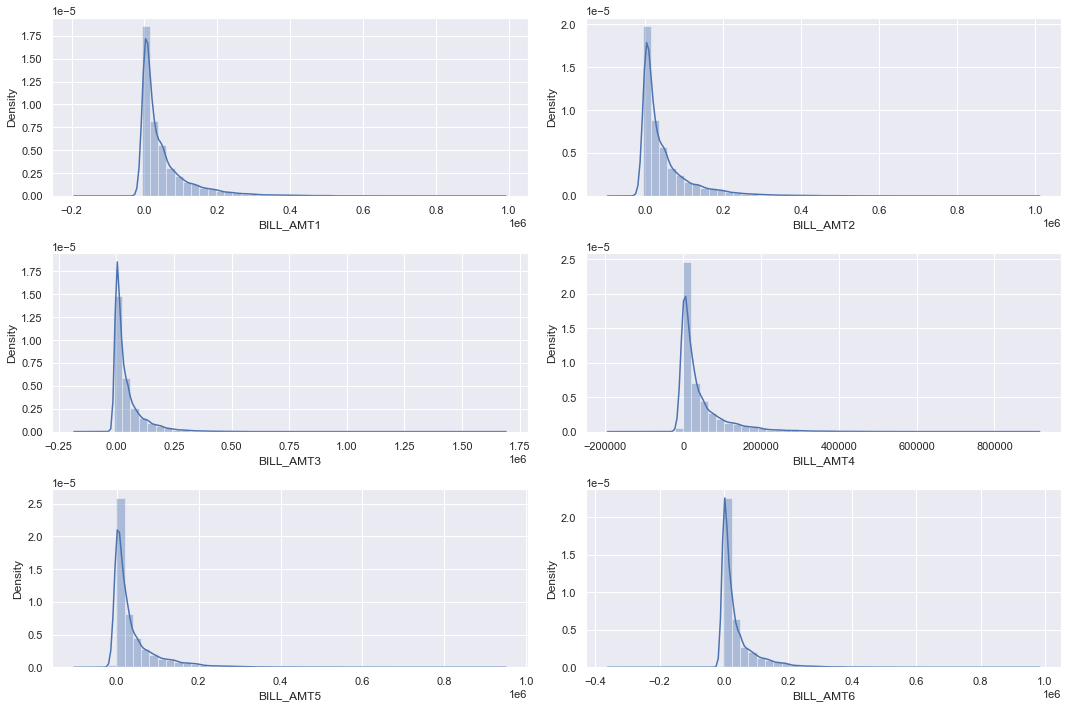

In [38]:
BILL_AMTX_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize=(15,10))

for i,col in enumerate(BILL_AMTX_cols):
    plt.subplot(3,2,i+1)
    sns.distplot(copy_default_df[col])
    plt.ylabel('Density')
    plt.tight_layout()
    
plt.show()

Putting a hue to the above using default payment target variable

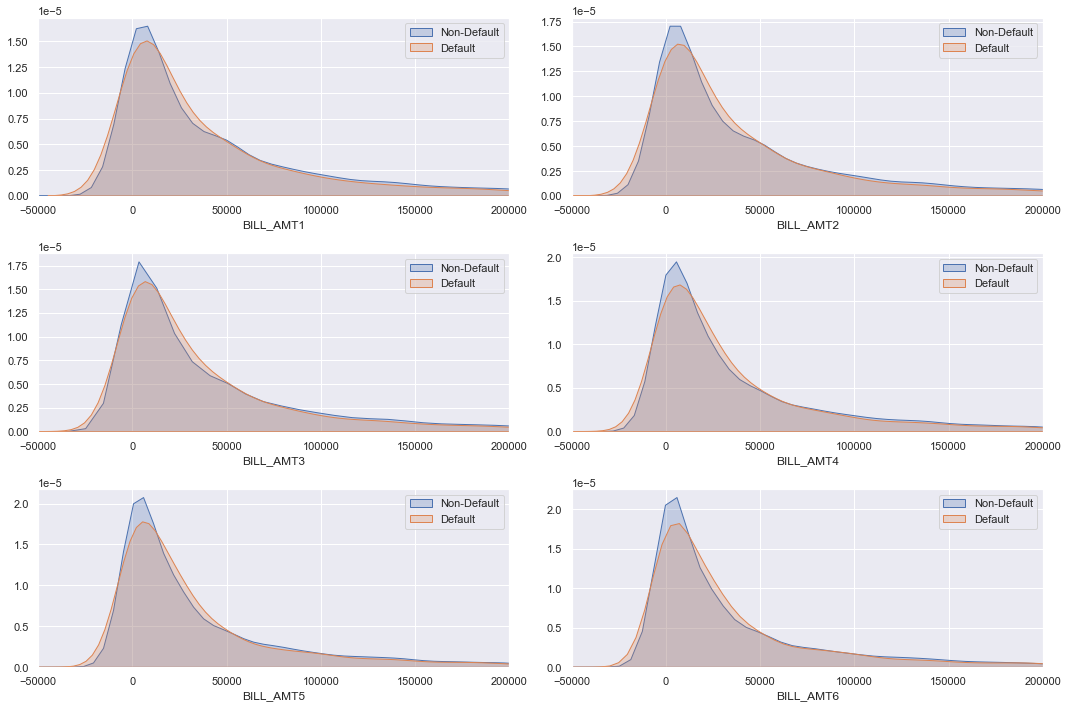

In [39]:
plt.figure(figsize=(15,10))

for i,col in enumerate(BILL_AMTX_cols):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(copy_default_df.loc[(copy_default_df['default.payment.next.month'] == 0), col], label = 'Non-Default', shade = True)
    sns.kdeplot(copy_default_df.loc[(copy_default_df['default.payment.next.month'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

We can make use of bin grouping to split the customers and analyze percentage of default. We can make use of the copy_default_df as before to create this variable for BILL_AMTX

In [40]:
copy_default_df['BILL_AMT1_bin'] = copy_default_df['BILL_AMT1'].copy()
copy_default_df['BILL_AMT2_bin'] = copy_default_df['BILL_AMT2'].copy()
copy_default_df['BILL_AMT3_bin'] = copy_default_df['BILL_AMT3'].copy()
copy_default_df['BILL_AMT4_bin'] = copy_default_df['BILL_AMT4'].copy()
copy_default_df['BILL_AMT5_bin'] = copy_default_df['BILL_AMT5'].copy()
copy_default_df['BILL_AMT6_bin'] = copy_default_df['BILL_AMT6'].copy()

In [41]:
BILL_AMTX_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (BILL_AMTX_bins):
    copy_default_df[col] = pd.cut(copy_default_df[BILL_AMTX_cols[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(copy_default_df[col].value_counts())

(0, 25000]           12965
(25000, 75000]        7656
(75000, 200000]       5258
(-1, 0]               2008
(200000, 2000000]     1523
(-350000, -1]          590
Name: BILL_AMT1_bin, dtype: int64
(0, 25000]           12647
(25000, 75000]        7692
(75000, 200000]       5094
(-1, 0]               2506
(200000, 2000000]     1392
(-350000, -1]          669
Name: BILL_AMT2_bin, dtype: int64
(0, 25000]           12696
(25000, 75000]        7635
(75000, 200000]       4888
(-1, 0]               2870
(200000, 2000000]     1256
(-350000, -1]          655
Name: BILL_AMT3_bin, dtype: int64
(0, 25000]           13081
(25000, 75000]        7401
(75000, 200000]       4623
(-1, 0]               3195
(200000, 2000000]     1025
(-350000, -1]          675
Name: BILL_AMT4_bin, dtype: int64
(0, 25000]           13401
(25000, 75000]        7163
(75000, 200000]       4399
(-1, 0]               3506
(200000, 2000000]      876
(-350000, -1]          655
Name: BILL_AMT5_bin, dtype: int64
(0, 25000]          

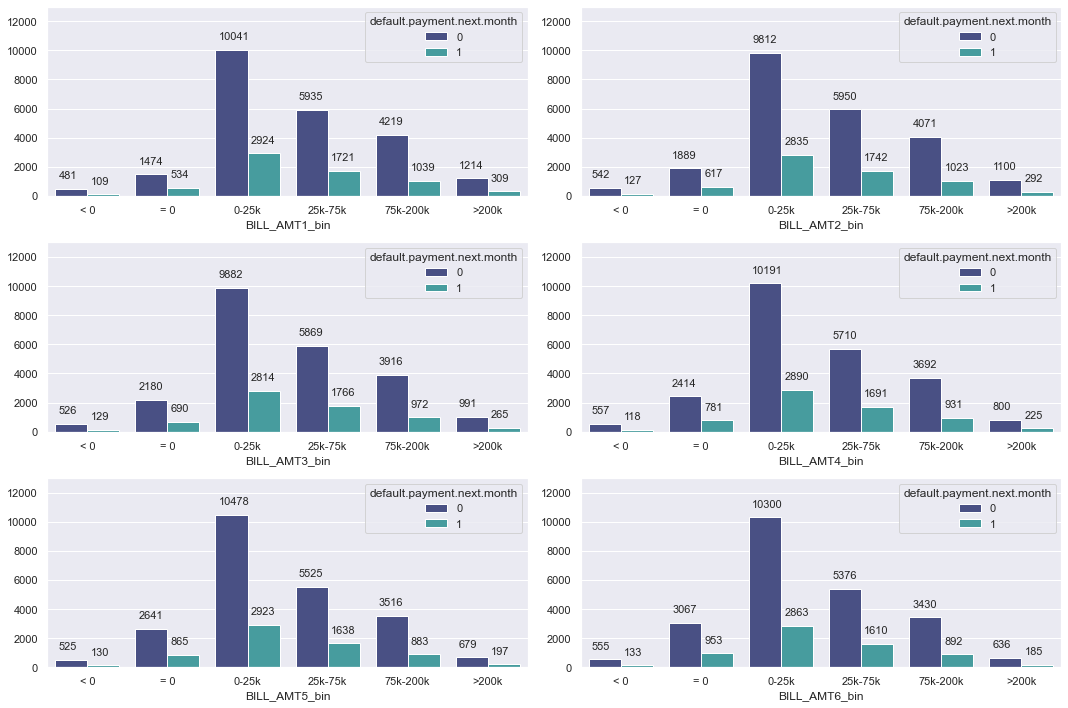

In [42]:
plt.figure(figsize=(15,10))

for i,col in enumerate(BILL_AMTX_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = copy_default_df, x = col, hue="default.payment.next.month", palette = 'mako')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['< 0', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

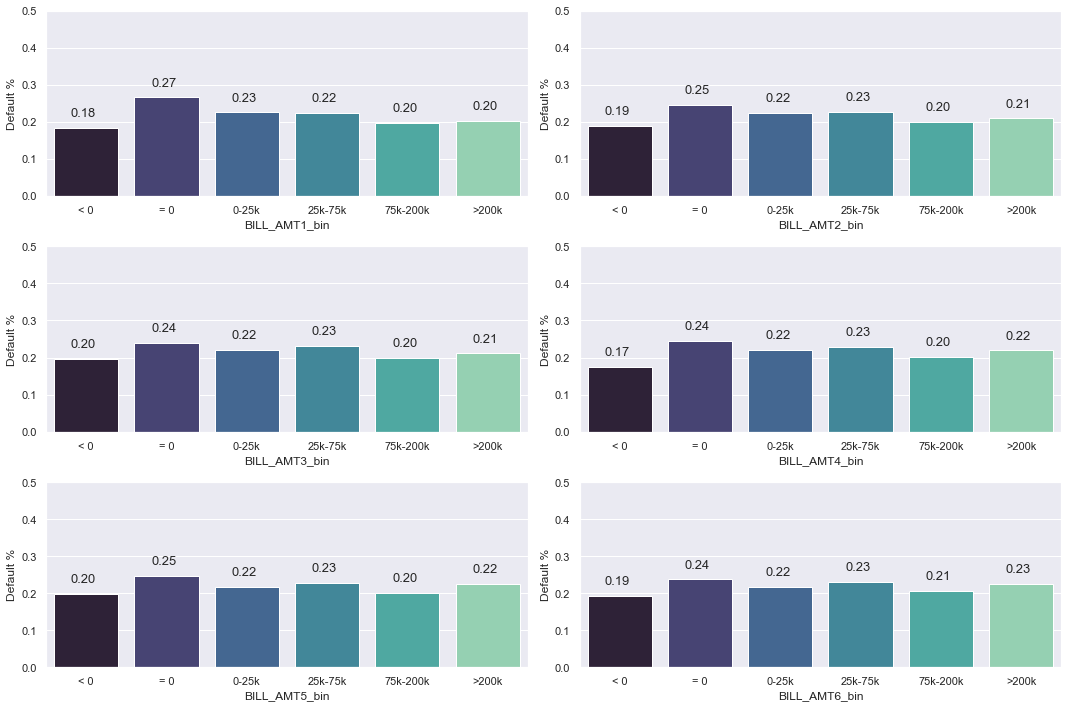

In [43]:
plt.figure(figsize=(15,10))

for i,col in enumerate(BILL_AMTX_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default.payment.next.month", data = copy_default_df, palette = 'mako', ci = None)
    plt.ylabel("Default %", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['< 0', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

From the above result after grouping the bill amounts, we can see that those who had a negative bill amount statement (who basically overpaid their previous credi card debt), has the lowest chance of default.

### Previous Payment Amount (PAY_AMTX)

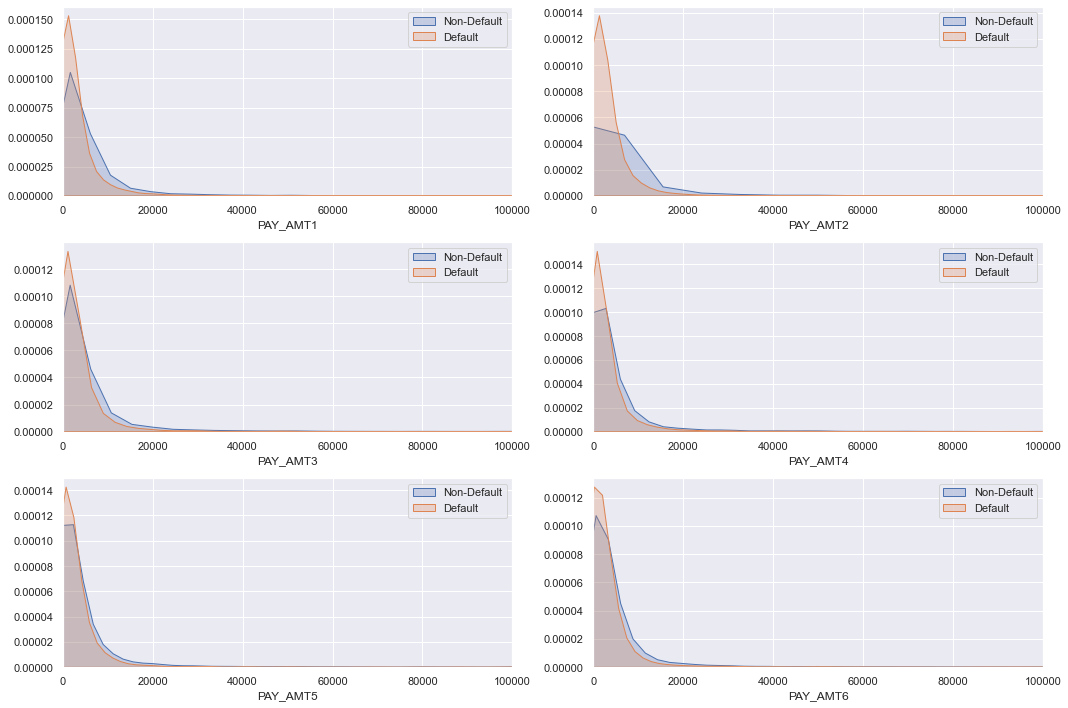

In [44]:
PAY_AMTX_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,10))


for i,col in enumerate(PAY_AMTX_cols):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(copy_default_df.loc[(copy_default_df['default.payment.next.month'] == 0), col], label = 'Non-Default', shade = True)
    sns.kdeplot(copy_default_df.loc[(copy_default_df['default.payment.next.month'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [45]:
# Adding new columns to our copied default data frame
copy_default_df['PAY_AMT1_bin'] = copy_default_df['PAY_AMT1'].copy()
copy_default_df['PAY_AMT2_bin'] = copy_default_df['PAY_AMT2'].copy()
copy_default_df['PAY_AMT3_bin'] = copy_default_df['PAY_AMT3'].copy()
copy_default_df['PAY_AMT4_bin'] = copy_default_df['PAY_AMT4'].copy()
copy_default_df['PAY_AMT5_bin'] = copy_default_df['PAY_AMT5'].copy()
copy_default_df['PAY_AMT6_bin'] = copy_default_df['PAY_AMT6'].copy()

In [46]:
PAY_AMTX_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (PAY_AMTX_bins):
    copy_default_df[col] = pd.cut(copy_default_df[PAY_AMTX_cols[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(copy_default_df[col].value_counts())

(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: PAY_AMT1_bin, dtype: int64
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: PAY_AMT2_bin, dtype: int64
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: PAY_AMT3_bin, dtype: int64
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: PAY_AMT4_bin, dtype: int64
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: PAY_AMT5_bin, dtype: int64
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 2000000]      225
Name: PAY_AMT6_bin, dtype

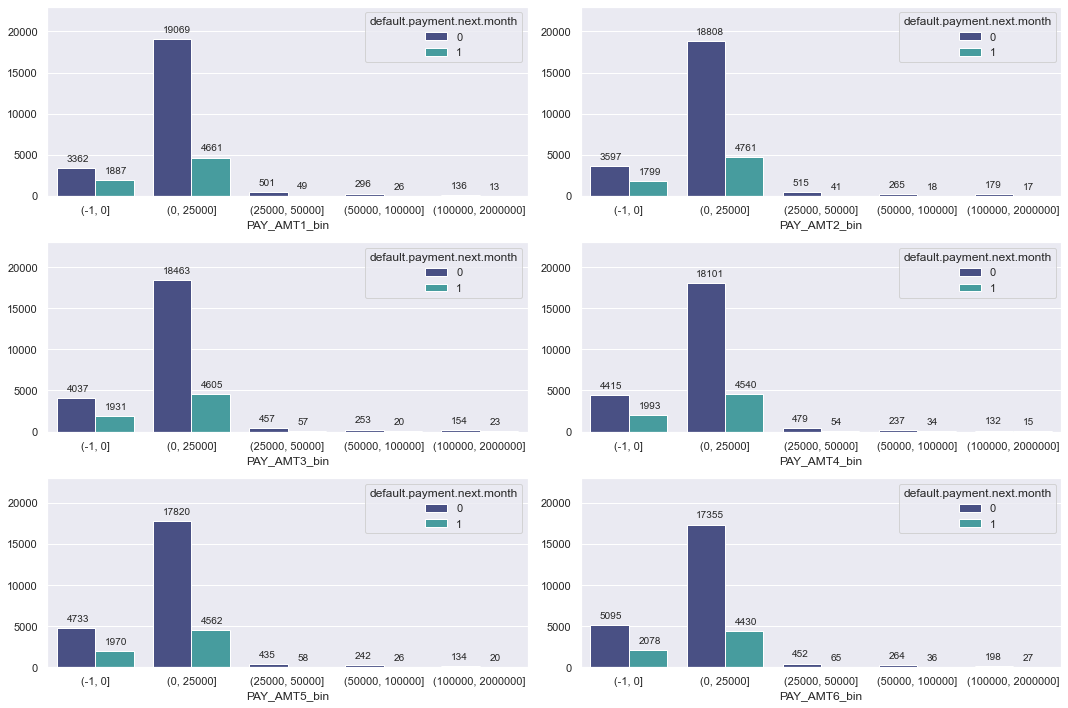

In [47]:
# visualizing count&probability of default by groups of PREVIOUS PAYMENT amount

plt.figure(figsize=(15,10))

for i,col in enumerate(PAY_AMTX_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = copy_default_df, x = col, hue="default.payment.next.month", palette = 'mako')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+800), fontsize=10)    

plt.show()

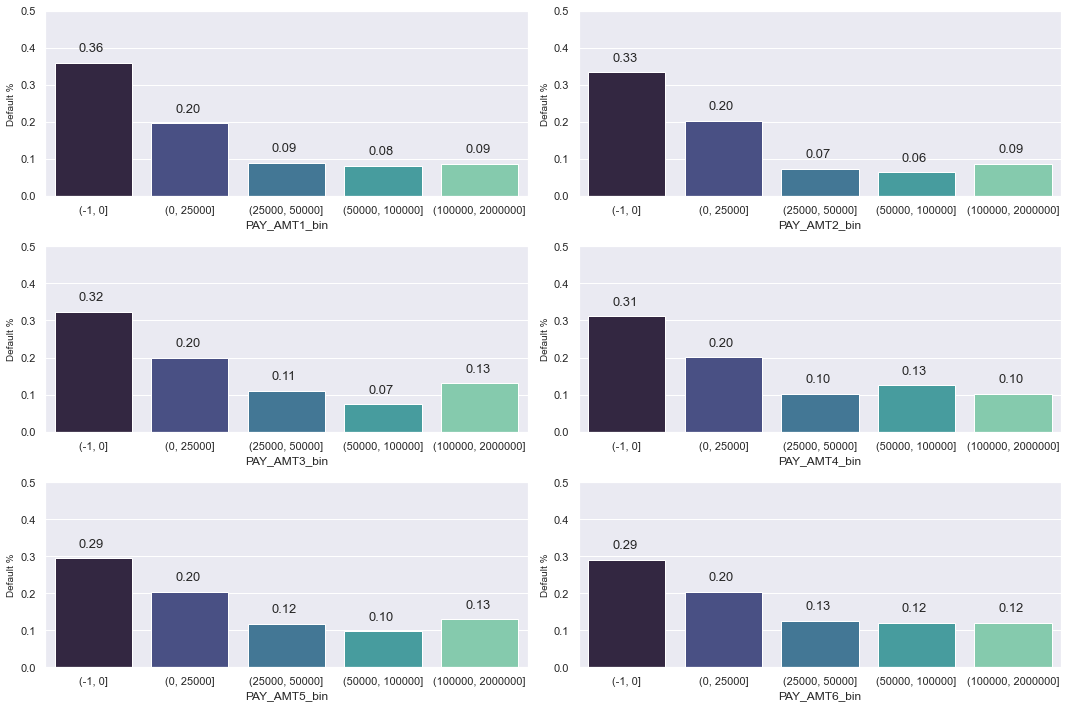

In [48]:
plt.figure(figsize=(15,10))

for i,col in enumerate(PAY_AMTX_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default.payment.next.month", data = copy_default_df, palette = 'mako', ci = None)
    plt.ylabel("Default %", fontsize= 10)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

From the graphs above, we can see that those who did not pay any credit card bill amount in the previous month had the highest probability of defaulting, while those who paid >25000 NTD had lowest probabilities of defaults. 

# Analyzing features correlation

### Between FEATURES, starting with repayment status (PAY)

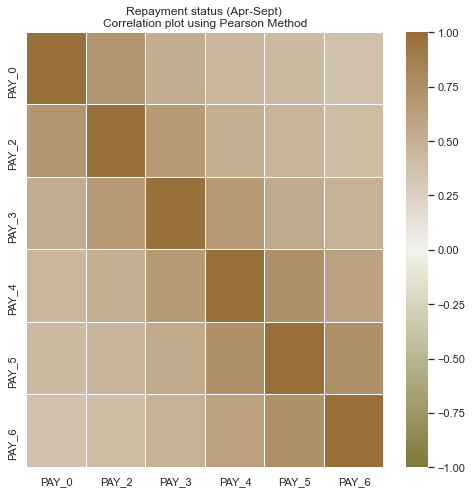

In [49]:
# Create a custom color palette for heatmap
cmap = sns.diverging_palette(80, 50, as_cmap=True) 
variables = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \nCorrelation plot using Pearson Method')
corr = default_df[variables].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, cmap=cmap)
plt.show()

We can see from the above, considering only delayed payment (PAY_2 to PAY_6 from April to September), we can see that the correlation increases as the distance between months decreases. This means that if a person has defaulted in April, there is a high likelihood that he will default again in the coming month.

### Between numerical variables, BILL_AMT

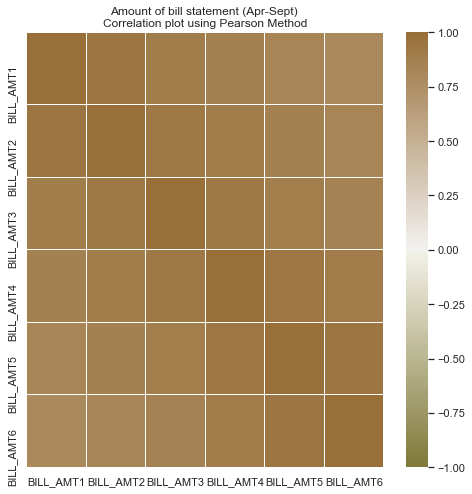

In [50]:
variables = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \nCorrelation plot using Pearson Method')
corr = default_df[variables].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, cmap=cmap)
plt.show()

Comparing bill amounts in each month, we can see that there is a stronger correlation between bill amount to be paid when the distance between months is less.

### Between numerical variables, PAY_AMT (referring to the amount of previous payment in the months labelled)

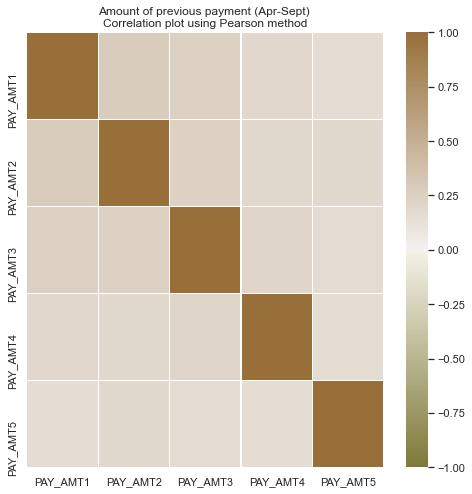

In [51]:
variables = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \nCorrelation plot using Pearson method')
corr = default_df[variables].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, cmap=cmap)
plt.show()

From the above, we can see that there is no correlation between the previous payment amount for April to September (values are at 0).

## Analyzing correlation between feature variables to target variable

In [52]:
corr_df = default_df.corr()
corr_df.iloc[:-1,-1:] # locating the target and feature variables in correlation DF.

,default.payment.next.month
ID,-0.013952
LIMIT_BAL,-0.153520
SEX,-0.039961
EDUCATION,0.033842
MARRIAGE,-0.027575
AGE,0.013890
PAY_0,0.396019
PAY_2,0.327093
PAY_3,0.286999
PAY_4,0.269055


<AxesSubplot:title={'center':'Correlation between features and target'}>

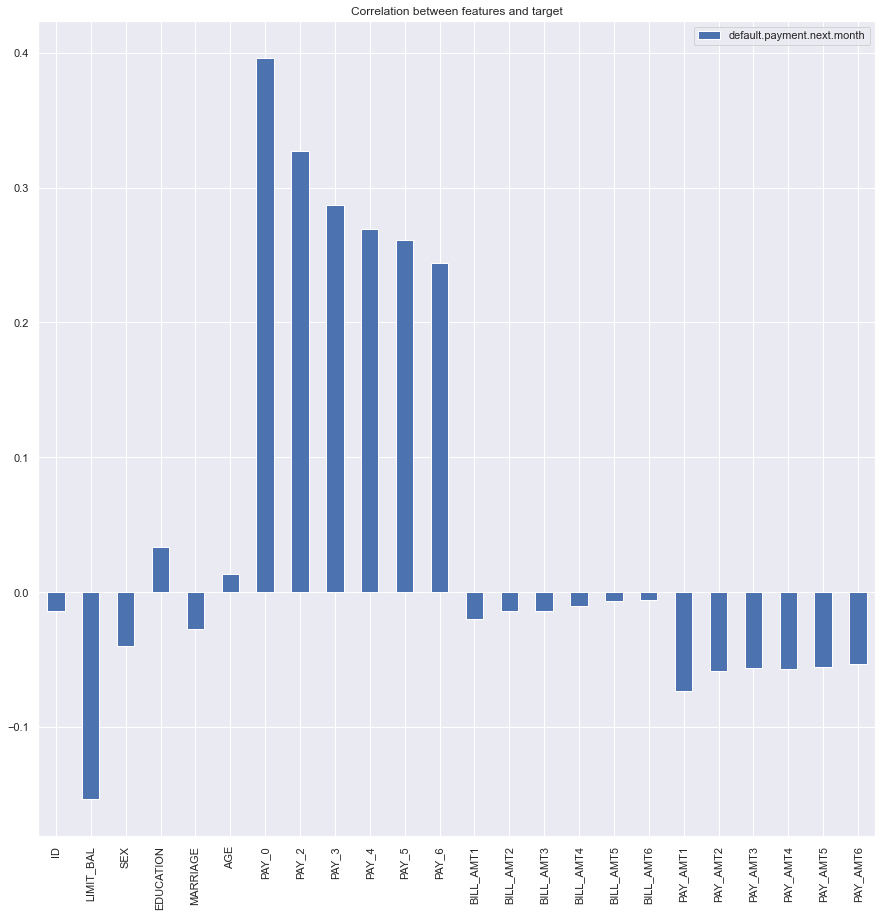

In [53]:
corr_df.iloc[:-1,-1:].plot(kind='bar', figsize=(15,15), title='Correlation between features and target')

From the above, we can see that PAY_0 has the highest correlation to that of the target variable 'default.payment.next.month'.

# Feature Importance analysis using RandomForestClassifier

We will define a score model function to help us append our results into a final result_dict

In [54]:
def score_model(model, Xtest, ytest):
    """
    Takes in a model and test sets from X and y, and returns a dictionary
    containing the score metrics of the trained model.
    """
    # get ypred from model
    ypred = model.predict(Xtest)
    model_baseline = 1 - np.mean(ytest)
    model_accuracy = accuracy_score(y_true=ytest, y_pred=ypred)
    model_recall = recall_score(y_true=ytest, y_pred=ypred)
    model_f1score = f1_score(y_true=ytest, y_pred=ypred)
    model_precision = precision_score(y_true=ytest, y_pred=ypred)
    print(f"Model test baseline: {model_baseline:.3f}")
    print(f"Model test accuracy: {model_accuracy:.3f}")
    print(f"Model test recall: {model_recall:.3f}")
    print(f"Model test F1-score: {model_f1score:.3f}")
    print(f"Model test precision: {model_precision:.3f}")
    result_dict = {
        'baseline': model_baseline,
        'accuracy': model_accuracy,
        'recall': model_recall,
        'f1score': model_f1score,
        'precision': model_precision
    }
    return result_dict


For our train data, we first drop ID and default payment status in our X
- We first drop ID and default payment status in our X and get y.
- One-hot encode for ordinal categorical variables like SEX and MARRIAGE
- Train test split with 20% test size
- Use StandardScaler to fit_transform X_train and transform X_test data
- Use a basic Random Forest Classifier with reasonable parameters
- Fit the model and do predictions
- Score the model with focus on recall and f1 score for bank context.

We will first work on the virgin dataset and just check out the performance using random forest classifier and without any sampling strategies used.

In [55]:
# WITHOUT OVERSAMPLING
Xcopy = default_df.drop(columns=['ID', 'default.payment.next.month'])
ycopy = default_df['default.payment.next.month']

# One-hot encode columns for SEX, and marriage, since they are ordinal variables.
# enable drop_first to prevent dummy variable trap
Xcopy2 = pd.get_dummies(data=Xcopy, columns=['SEX', 'MARRIAGE'], drop_first=True)

# Train test split with 20% test size
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xcopy2, ycopy, test_size=0.20, random_state=randomseed, stratify=ycopy)

# Use StandardScaler to fit_transform X_train and transform X_test data.
sc = StandardScaler()
X_train2_scaled = sc.fit_transform(X_train2)
X_test2_scaled = sc.transform(X_test2)
print("Train dims: ", X_train2_scaled.shape)
print("Test dims: ", X_test2_scaled.shape)

# Train a basic Random Forest Classifier without oversampling
model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=randomseed)

# Fit the model
model.fit(X_train2_scaled, y_train2)

# Evaluate
y_preds = model.predict(X_test2_scaled)

# Score model
baseline_dict = score_model(model, X_test2_scaled, y_test2)

Train dims:  (24000, 24)
Test dims:  (6000, 24)
Model test baseline: 0.779
Model test accuracy: 0.829
Model test recall: 0.376
Model test F1-score: 0.493
Model test precision: 0.716


From a basic random forest classifier above, without resampling, we can see that we achieved a recall % of about 37.6%. Let us see the results when we **consider binned PAY_AMTX, treating them as categorical variables now instead of numerical variables. We will check if there is any improvement to the baseline recall, to prove that feature engineering helps with model prediction.** We will keep age and limit balance as numerical variables as there is no improvement in metric scoring for baseline model after multiple experimental tests.

# Considering Payment Amount in previous months as categorical variables after binning as feature engineering

Previously we noted in our box plots above that PAY_AMTX had a high degree of skewedness, let us take a look whether there will be an improvement in recall results when we are considering binned PAY_AMTX, **we ultimately want an improvement in our recall score from the baseline of 0.376.**

In [56]:
default_df_3 = copy_default_df.copy()
print(default_df_3.shape)
default_df_3.columns

default_df_3 = default_df_3.drop(columns=['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin',
        'BILL_AMT5_bin', 'BILL_AMT6_bin','AgeGroup', 'LimitBalGroup', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6'])
# default_df_3 = default_df_3.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
#         'BILL_AMT5', 'BILL_AMT6','AGE', 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6'])

print(default_df_3.shape)
print(default_df_3.columns)

(30000, 39)
(30000, 25)
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'default.payment.next.month', 'PAY_AMT1_bin', 'PAY_AMT2_bin',
       'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin'],
      dtype='object')


In [57]:
# WITHOUT OVERSAMPLING
Xcopy_3 = default_df_3.drop(columns=['ID', 'default.payment.next.month'])
ycopy_3 = default_df_3['default.payment.next.month']

# One-hot encode columns for categorical
Xcopy_33 = pd.get_dummies(data=Xcopy_3, columns=['SEX', 'MARRIAGE', 'PAY_AMT1_bin',
       'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin',
       'PAY_AMT6_bin'], drop_first=True)

# Train test split with 20% test size
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(Xcopy_33, ycopy_3, test_size=0.20, random_state=randomseed, stratify=ycopy_3)

# Use StandardScaler to fit_transform X_train and transform X_test data.
sc = StandardScaler()
X_train_scaled_3 = sc.fit_transform(X_train_3)
X_test_scaled_3 = sc.transform(X_test_3)
print("Train dims: ", X_train_scaled_3.shape)
print("Test dims: ", X_test_scaled_3.shape)

# Train a basic Random Forest Classifier without oversampling
model_3 = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=randomseed)

# Fit the model
model_3.fit(X_train_scaled_3, y_train_3)

# Evaluate
y_preds_3 = model_3.predict(X_test_scaled_3)

# Score model
baseline_dict_3 = score_model(model_3, X_test_scaled_3, y_test_3)

Train dims:  (24000, 42)
Test dims:  (6000, 42)
Model test baseline: 0.779
Model test accuracy: 0.829
Model test recall: 0.378
Model test F1-score: 0.493
Model test precision: 0.712


We can see that from the above, the recall score improved from 0.376 to 0.378, albeit the small improvement. We will work with this feature engineered dataset for future models.

Let us experiment some form of oversampling using RandomOverSampler with 60% sampling strategy with the base model.



In [58]:
sampler = RandomOverSampler(sampling_strategy=0.6)
X_train2_resample, y_train2_resample = sampler.fit_resample(X_train2_scaled, y_train2)
print(f'Percentage of population that defaulted: {np.mean(y_train2):.2f}')
print(f'Percentage of population that defaulted after oversampling: {np.mean(y_train2_resample):.2f}')

Percentage of population that defaulted: 0.22
Percentage of population that defaulted after oversampling: 0.37


In [59]:
# WITH OVERSAMPLING
# Train a basic randomforestclassifier with oversampling
model_resample = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=randomseed)

# Fit the model
model_resample.fit(X_train2_resample, y_train2_resample)

# Evaluate
y_preds_2 = model_resample.predict(X_test2_scaled)

# Score the model
baseline_os_dict = score_model(model_resample, X_test2_scaled, y_test2)

Model test baseline: 0.779
Model test accuracy: 0.819
Model test recall: 0.492
Model test F1-score: 0.546
Model test precision: 0.614


In [60]:
# Compare results between oversample and without oversample
comparison = pd.DataFrame(data=[baseline_dict['recall'], baseline_os_dict['recall']], columns=['Recall'], index=['Baseline RFC','Baseline RFC w/ Oversample'])
comparison

,Recall
Baseline RFC,0.376036
Baseline RFC w/ Oversample,0.492087


We can see that from the above, recall score improved by ~12% when oversampling was introduced, we can explore further and include oversampling into imblearn pipeline to explore our options for the best model.

Now, let us observe the FEATURE IMPORTANCES from the random forest classifiers for the case with Random Forest Classifier without oveersampling

In [61]:
# Defining function to calculate and visualize feature importances
def model_featureimportance(model, Xtrain):
    """
    Takes in a trained model, Xtrain data respectively for column index
    and returns the feature importance data frame together with
    bar graph visualization for feature importances.
    """
    feature_importance = pd.DataFrame(model.feature_importances_,
                                     index=Xtrain.columns,
                                     columns=['Feature Importance']).sort_values('Feature Importance', ascending=True)
    sns.set(style='whitegrid')
    # Viz
    feature_importance.plot.barh(figsize=(15,15))
    # Calculate cumulative feature importance in a separate column
    feature_importance.sort_values('Feature Importance', ascending=False,inplace=True)
    feature_importance['Accumulative Feature Importance'] = feature_importance['Feature Importance'].cumsum()
    return feature_importance

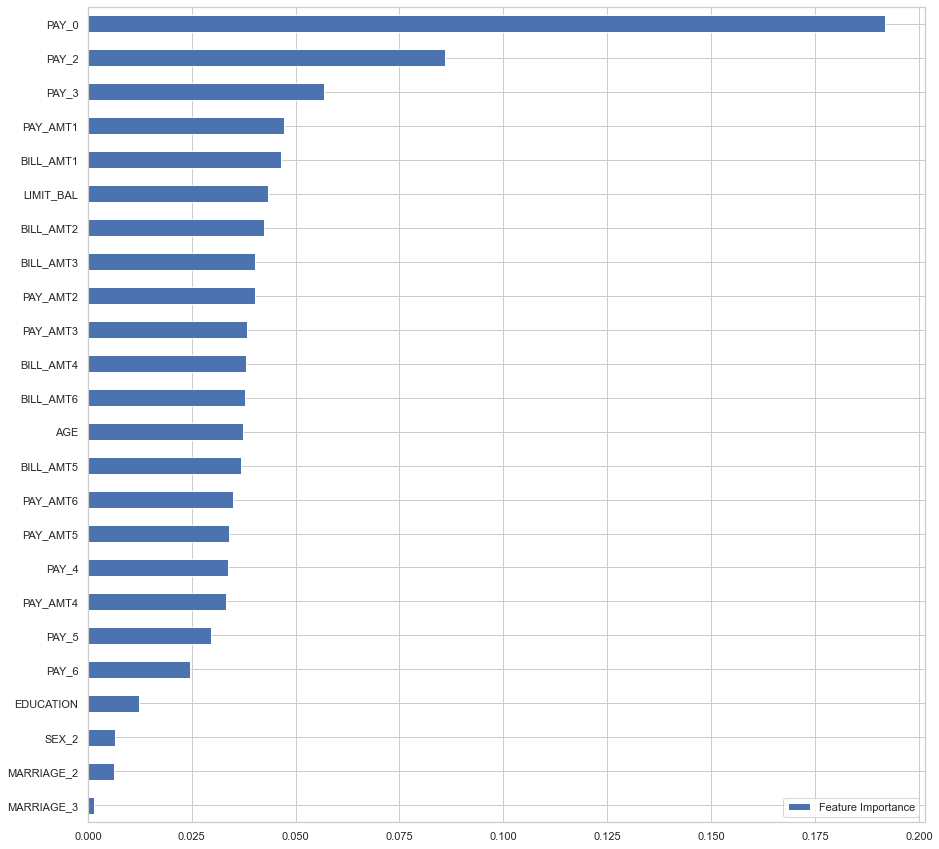

In [62]:
# Obtain feature importance for random forest classifier without oversampling
# On baseline dataset
rfcbaseline_featureimportance = model_featureimportance(model, X_train2)

In [63]:
rfcbaseline_featureimportance

,Feature Importance,Accumulative Feature Importance
PAY_0,0.191843,0.191843
PAY_2,0.085914,0.277756
PAY_3,0.056776,0.334533
PAY_AMT1,0.047221,0.381753
BILL_AMT1,0.046589,0.428342
LIMIT_BAL,0.043473,0.471815
BILL_AMT2,0.042511,0.514326
BILL_AMT3,0.040332,0.554659
PAY_AMT2,0.040285,0.594944
PAY_AMT3,0.038220,0.633164


We can see that from the above, PAY_0 indeed has the highest feature importance, which matches to what we see for the correlation plot

# Supervised Learning Task

## Model Selection and Usage of Pipeline 

Train test split
- stratified train/test split was performed to maintain similar target variable distribution in both train and test sets.
- 20% test split was selected to ensure sufficient 'default' target observations in the test set for model assessment.

Scaling
- Scaling is first performed across the training dataset using StandardScaler. fit_transform is peformed for training data set, followed by transform for the test data set.

Hyper-parameter tuning
- GridSearchCV is used to tune the various model parameters. We will use a 20% validation split.
- Models used will include: Logistic Regression, Random Forest Classifier, AdaBoost Classifier, XGBoost Classifier and Fully Connected Neural Networks (FCNN).
- 5-fold cross validation will be used to search for best parameters for each model.

**Evaluation Metrics**:
<br><br>
The trained model should have a cross-validated high **recall score and f1 score.** 

Recall is the ratio of True Positives / (True Positives + False Negatives), which is the ability of the classification models to find all positive samples (people who indeed default payment) and quantifies the number of positive class predictions made out of all positive examples in the dataset. In our case, we want to identify true cases of defaulters through the models, where if the model predicts customers to be in the defaulter group, they would eventually go on to default payment subsequently, preventing banks from incurring any potential costs from such issues of default payments.

F1-score (F-measure) provides a single score that balances both the concerns of precision and recall in one number.

All of the above will be carried out using IMBLEARN Pipeline to simplify.

Some functions will first be created to simplify things during training.

**Sampling Methods**:

We can see that there is some imbalance in the target variable 'default.payment.next.month'.

We will explore resampling methods for random under/oversampling and see how it can improve metric scoring for the models subsequently

In [64]:
# Scorer to be passed into GridSearchCV
recallscorer = make_scorer(recall_score)

# Create a dictionary to store training results
resultdict = {}

# Function for training a model
def train_model(Xtrain, ytrain, user_pipeline, user_paramgrid, filename, scorer):
    """
    This function takes in training dataset for X and y, user-defined pipeline, user-defined parameter grid for each specific model,
    file name and scorer function. Saves the model into a pickle file format into the current working directory according to
    file name, and returns the trained model.
    """
    model = GridSearchCV(estimator=user_pipeline, param_grid=user_paramgrid, scoring=scorer, cv=5, n_jobs=-1, verbose=2, error_score='raise')
    model.fit(Xtrain, ytrain)
    pickle.dump(model, open(filename,'wb'))
    return model

# Function for training a FCNN
def train_nn(Xtrain, ytrain, user_pipeline, user_paramgrid, filename, scorer):
    """
    This function takes in training dataset for X and y, user-defined pipeline, user-defined parameter grid for each specific model,
    file name and scorer function. Saves the model into a h5 file format into the current working directory according to
    file name, and returns the trained model.
    """
    model = GridSearchCV(estimator=user_pipeline, param_grid=user_paramgrid, scoring=scorer, cv=5, n_jobs=-1, verbose=2, error_score='raise')
    model.fit(Xtrain, ytrain)
    
    return model

# Function to display metrics of learned model
def print_results(model, traintestdata, description):
    """
    Takes in a trained/learned model, tuple containing X and y train&test data, and description
    Prints the relevant scoring results from cross validation. Adds the best parameters to the result dictionary for tracking.
    """
    print(f'Best parameters: {model.best_params_}')
    # Tuple Unpacking for xtrain, xtest, ytrain, ytest from input
    xtrain,xtest,ytrain,ytest = traintestdata
    # Model prediction on train/test data
    ytestpred = model.predict(xtest)
    ytestprobability = model.predict_proba(xtest)[:,1]
    ytrainpred = model.predict(xtrain)
    # Model Scoring
    test_recall = recall_score(ytest,ytestpred)
    train_recall = recall_score(ytrain,ytrainpred)
    test_f1score = f1_score(ytest, ytestpred)
    train_f1score = f1_score(ytrain,ytrainpred)
    test_precision = precision_score(ytest, ytestpred)
    train_precision = precision_score(ytrain, ytrainpred)
    test_acc = accuracy_score(ytest, ytestpred)
    train_acc = accuracy_score(ytrain, ytrainpred)
    test_rocauc = roc_auc_score(ytest, ytestprobability)
    test_display_roccurve = plot_roc_curve(model, xtest, ytest)
    plt.show()
    plt.clf()
    # Plot x (cross validation results) against y (scoring metrics)
    fig,ax = plt.subplots(figsize = (15,5))
    cvrank = sorted([[k,v] for k,v in zip(model.cv_results_['params'], model.cv_results_['mean_test_score'])],key = lambda x: x[1])
    plt.plot([str(i[0]) for i in cvrank],[i[1] for i in cvrank])
    plt.tick_params(axis='x', rotation=90)
    plt.ylabel('Recall Score')
    plt.xlabel('Cross Validation Params')
    plt.show()
    # Print out results
    print(f'RECALL Best CV Score: {max(model.cv_results_["mean_test_score"])}')
    print(f'recall_score (Train): {train_recall:.3f}')
    print(f'recall_score (Test): {test_recall:.3f}')
    print(f'f1_score (Train): {train_f1score:.3f}')
    print(f'f1_score (Test): {test_f1score:.3f}')
    print(f'precision_score (Train): {train_precision:.3f}')
    print(f'precision_score (Test): {test_precision:.3f}')
    print(f'roc_auc_score (Test): {test_rocauc:.3f}')
    print(confusion_matrix(ytest, ytestpred))
    print(classification_report(ytest, ytestpred))
    # Update result dictionary for tracking.
    resultdict[description] = [model.best_params_, test_recall, test_f1score]

    
    # Function to display metrics of learned NN. Since we are using KerasClassifier, it is ok to use .predict directly.
def print_nn_results_cv(model, traintestdata, description):
    """
    Takes in a trained/learned deep learnt neural network model, tuple containing X and y train&test data, and description
    Prints the relevant scoring results from cross validation. Adds the best parameters to the result dictionary for tracking.
    """
    print(f'Best parameters: {model.best_params_}')
    # Tuple Unpacking for xtrain, xtest, ytrain, ytest from input
    xtrain,xtest,ytrain,ytest = traintestdata
    # Model prediction on train/test data
    ytestpred = model.predict(xtest)
    ytestprobability = model.predict_proba(xtest)[:,1]
    ytrainpred = model.predict(xtrain)
    # Model Scoring
    test_recall = recall_score(ytest,ytestpred)
    train_recall = recall_score(ytrain,ytrainpred)
    test_f1score = f1_score(ytest, ytestpred)
    train_f1score = f1_score(ytrain,ytrainpred)
    test_precision = precision_score(ytest, ytestpred)
    train_precision = precision_score(ytrain, ytrainpred)
    test_acc = accuracy_score(ytest, ytestpred)
    train_acc = accuracy_score(ytrain, ytrainpred)
    test_rocauc = roc_auc_score(ytest, ytestprobability)
#     test_display_roccurve = plot_roc_curve(model, xtest, ytest)
#     plt.show()
#     plt.clf()
    fpr, tpr, threshold = roc_curve(ytest, ytestprobability)
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    # Plot x (cross validation results) against y (scoring metrics)
    fig,ax = plt.subplots(figsize = (15,5))
    cvrank = sorted([[k,v] for k,v in zip(model.cv_results_['params'], model.cv_results_['mean_test_score'])],key = lambda x: x[1])
    plt.plot([str(i[0]) for i in cvrank],[i[1] for i in cvrank])
    plt.tick_params(axis='x', rotation=90)
    plt.ylabel('Recall Score')
    plt.xlabel('Cross Validation Params')
    plt.show()
    # Print out results
    print(f'RECALL Best CV Score: {max(model.cv_results_["mean_test_score"])}')
    print(f'recall_score (Train): {train_recall:.3f}')
    print(f'recall_score (Test): {test_recall:.3f}')
    print(f'f1_score (Train): {train_f1score:.3f}')
    print(f'f1_score (Test): {test_f1score:.3f}')
    print(f'precision_score (Train): {train_precision:.3f}')
    print(f'precision_score (Test): {test_precision:.3f}')
    print(f'roc_auc_score (Test): {test_rocauc:.3f}')
    print(confusion_matrix(ytest, ytestpred))
    print(classification_report(ytest, ytestpred))
    # Update result dictionary for tracking.
    resultdict[description] = [model.best_params_, test_recall, test_f1score]

    
    # Function to display metrics of learned NN that is loaded from .h5 file from keras.
def print_nn_results_bestmodel(model, traintestdata, description):
    """
    Takes in a trained/learned deep learnt neural network model, tuple containing X and y train&test data, and description
    Prints the corresponding results from the loaded model, which is that of the best cross-validated model.
    """
    # Tuple Unpacking for xtrain, xtest, ytrain, ytest from input
    xtrain,xtest,ytrain,ytest = traintestdata
    # Model prediction on train/test data
    ytestpred = (model.predict(xtest) > 0.5).astype("int32") 
    ytrainpred = (model.predict(xtrain) > 0.5).astype("int32")
    # Model Scoring
    test_recall = recall_score(ytest,ytestpred)
    train_recall = recall_score(ytrain,ytrainpred)
    test_f1score = f1_score(ytest, ytestpred)
    train_f1score = f1_score(ytrain,ytrainpred)
    test_precision = precision_score(ytest, ytestpred)
    train_precision = precision_score(ytrain, ytrainpred)
    test_acc = accuracy_score(ytest, ytestpred)
    train_acc = accuracy_score(ytrain, ytrainpred)
    test_rocauc = roc_auc_score(ytest, model.predict(xtest))
    fpr, tpr, threshold = roc_curve(ytest, model.predict(xtest))
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(f'recall_score (Train): {train_recall:.3f}')
    print(f'recall_score (Test): {test_recall:.3f}')
    print(f'f1_score (Train): {train_f1score:.3f}')
    print(f'f1_score (Test): {test_f1score:.3f}')
    print(f'precision_score (Train): {train_precision:.3f}')
    print(f'precision_score (Test): {test_precision:.3f}')
    print(f'roc_auc_score (Test): {test_rocauc:.3f}')
    print(confusion_matrix(ytest, ytestpred))
    print(classification_report(ytest, ytestpred))
    

    
# Define column transformer to transform data within the dataset for pipeline
def get_col_transformer(categorical_cols, numerical_cols, drop_cols):
    """
    Uses column transformer to standardize feature input.
    """
    return ColumnTransformer([('scaler', StandardScaler(),numerical_cols),
                                  ('drop_columns', 'drop', drop_cols),
                                 ('encoder', OneHotEncoder(drop='if_binary'), categorical_cols)
                                 ], 
                                 remainder='passthrough')

# Define our final X and y respectively

In [65]:
final_df = copy_default_df.copy()
print(final_df.shape)
print(final_df.columns)

# We use binned PAY_AMTX after realizing that it helps improve baseline RFC score.
final_df = final_df.drop(columns=['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin',
        'BILL_AMT5_bin', 'BILL_AMT6_bin','AgeGroup', 'LimitBalGroup', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6'])

print(final_df.shape)
print(final_df.columns)

(30000, 39)
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'AgeGroup', 'LimitBalGroup',
       'BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin',
       'BILL_AMT5_bin', 'BILL_AMT6_bin', 'PAY_AMT1_bin', 'PAY_AMT2_bin',
       'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin'],
      dtype='object')
(30000, 25)
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'default.payment.next.month', 'PAY_AMT1_bin', 'PAY_AMT2_bin',
       'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin'],
      dtype='object')


In [66]:
X = final_df.drop(columns=['ID', 'default.payment.next.month'])
y = final_df['default.payment.next.month']


# One-hot encode columns for SEX, and marriage, since they are ordinal variables.
# enable drop_first to prevent dummy variable trap
X = pd.get_dummies(data=X, columns=['SEX', 'MARRIAGE', 'PAY_AMT1_bin',
       'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin',
       'PAY_AMT6_bin'], drop_first=True)

# Train test split with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomseed, stratify=y)


In [67]:
# Define a tuple to keep train and test data for input into print_result function
full_data = (X_train,X_test,y_train,y_test)

X.columns # all columns are already numerical, no need for any One-hot encoding

numericalcols = list(X.columns)
print(numericalcols)

# Transform our column by scaling our features before feeding into pipeline
col_transformer = get_col_transformer([], numericalcols, [])

['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'SEX_2', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_AMT1_bin_(0, 25000]', 'PAY_AMT1_bin_(25000, 50000]', 'PAY_AMT1_bin_(50000, 100000]', 'PAY_AMT1_bin_(100000, 2000000]', 'PAY_AMT2_bin_(0, 25000]', 'PAY_AMT2_bin_(25000, 50000]', 'PAY_AMT2_bin_(50000, 100000]', 'PAY_AMT2_bin_(100000, 2000000]', 'PAY_AMT3_bin_(0, 25000]', 'PAY_AMT3_bin_(25000, 50000]', 'PAY_AMT3_bin_(50000, 100000]', 'PAY_AMT3_bin_(100000, 2000000]', 'PAY_AMT4_bin_(0, 25000]', 'PAY_AMT4_bin_(25000, 50000]', 'PAY_AMT4_bin_(50000, 100000]', 'PAY_AMT4_bin_(100000, 2000000]', 'PAY_AMT5_bin_(0, 25000]', 'PAY_AMT5_bin_(25000, 50000]', 'PAY_AMT5_bin_(50000, 100000]', 'PAY_AMT5_bin_(100000, 2000000]', 'PAY_AMT6_bin_(0, 25000]', 'PAY_AMT6_bin_(25000, 50000]', 'PAY_AMT6_bin_(50000, 100000]', 'PAY_AMT6_bin_(100000, 2000000]']


# Principal Component Analysis for EDA

We are able to perform PCA to get the optimal number of components which capture the greatest amount of variance, and plot them in reduced space, to check if there are any potential seperable clusters.

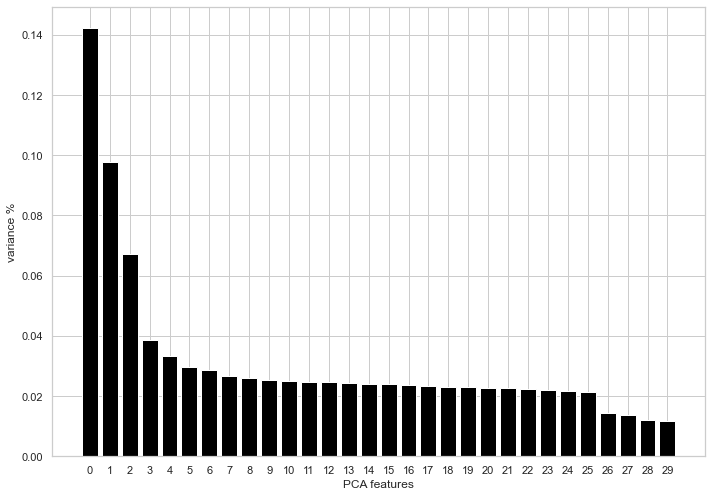

In [68]:
# import required libraries
from sklearn.decomposition import PCA

# Standardize our data prior to fitting 
scaler_pca = StandardScaler()
X_train_scaled_pca = scaler_pca.fit_transform(X)

# Define our PCA fitter, we use the top 3 Principal Components for this case.
pca_eda = PCA(n_components=30)
pca_eda.fit(X_train_scaled_pca)
principalComponents_eda = pca_eda.fit_transform(X_train_scaled_pca)

# Plot the explained variances
features_eda = range(pca_eda.n_components_)
plt.bar(features_eda, pca_eda.explained_variance_ratio_, color='black')

plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features_eda)
# Save components to a DataFrame
PCA_eda_components = pd.DataFrame(principalComponents_eda)

Text(0.5, 1.0, 'Explained Variance Ratio vs No. of PC')

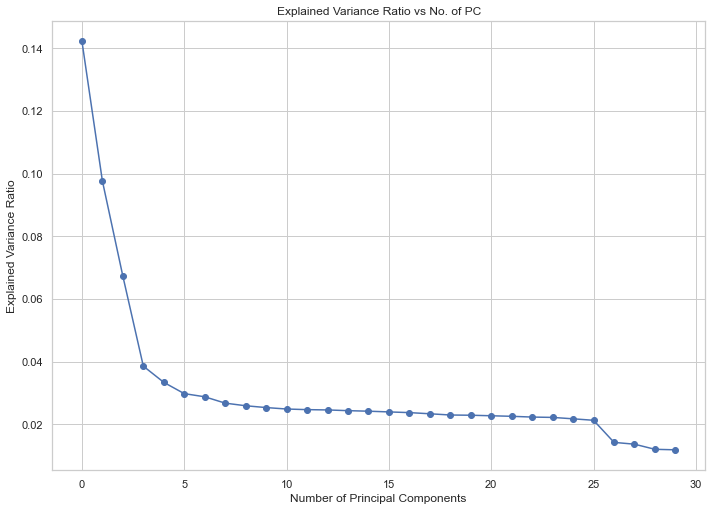

In [69]:
plt.plot(pca_eda.explained_variance_ratio_, '-o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs No. of PC')

From the above plots, we can see that the first 3 components have significantly larger variance in the data compared to other principal components

First Principal Component


<AxesSubplot:>

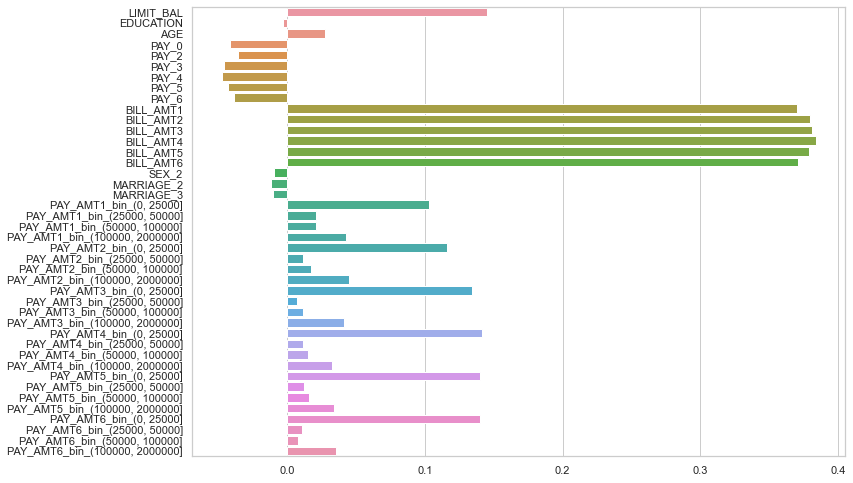

In [70]:
print('First Principal Component')
sns.barplot(x=pca_eda.components_[0], y=X.columns, orient='h')


From the first principal component feature importance plot, we can see that the major contributing factors would be from BILL_AMT1 to BILL_AMT6, which refers to the amount of bill statement in months April to September 2005.

Second Principal Component


<AxesSubplot:>

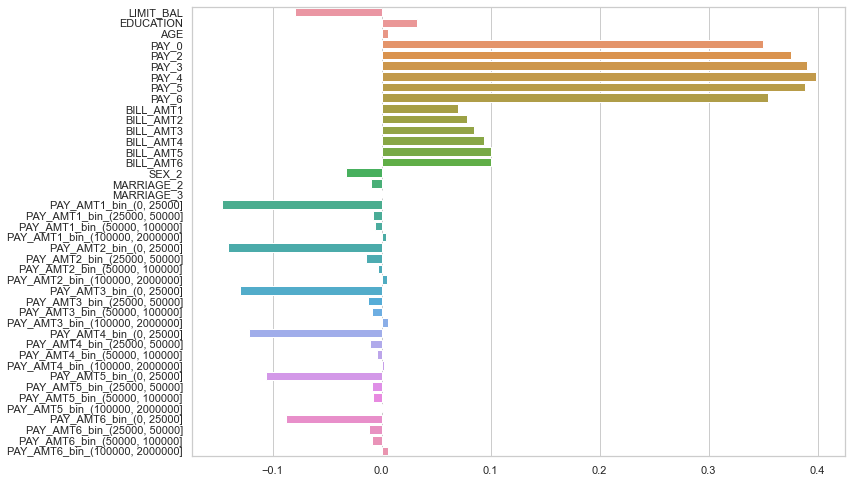

In [71]:
print('Second Principal Component')
sns.barplot(x=pca_eda.components_[1], y=X.columns, orient='h')

From the second principal component feature importance plot, we can see that the major contributing factors would be PAY_0 to PAY_6, which refers to the repayment status for credit from April to September 2005. 

Third Principal Component


<AxesSubplot:>

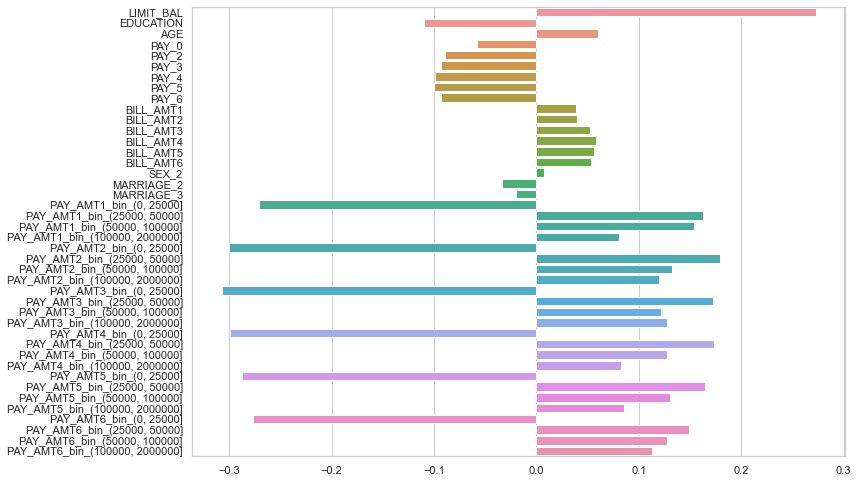

In [72]:
print('Third Principal Component')
sns.barplot(x=pca_eda.components_[2], y=X.columns, orient='h')

From the third principal component feature importance plot, we can see that the major contributing factors would be PAY_AMT1 to PAY_AMT6 grouped in the range from 0 to 25000, which refers to the previous months repayment amount from April to September 2005, showing that people who had the paid lesser amount of money in the previous month had greatest influence on the 3rd principal component.

Hence, the above plots show us that we will be able to plot a meaningful 3D plot using Plotly Express, to visualize the different clusters that could be formed from 2 methods to be looked at namely: KMeans and DBSCAN clustering algorithm.

3D plot axes
- PC1 axis: dominated by feature importance from **bill statement amount in previous months**
- PC2 axis: dominated by feature importance from **repayment status in previous months**
- PC3 axis: dominated by feature importance from **repayment amount in previous months**

Let us check for the top 3 principal components for any separable clusters. We make use of the plotly express library to do this and visualize 3D plots below

In [73]:
# import plotly.express as px
# PCA_eda_top3_data = PCA_eda_components.iloc[:,:3]

# fig = px.scatter_3d(PCA_eda_top3_data,
#                    x=PCA_eda_top3_data.columns[0],
#                     y=PCA_eda_top3_data.columns[1],
#                     z=PCA_eda_top3_data.columns[2],
#                    labels={'0':'PC1','1':'PC2','2':'PC3'},
#                     title='Scatter Plot in 3D with top 3 Principal Components',
#                     opacity=0.2
#                    )

# fig.show()
# fig.write_html('graphs/PCAEDA.html')

#![alt text](./graphs/PCAEDAplotly.jpg "PCA EDA for first 3 Principal Components")

In [74]:
from IPython.display import IFrame

IFrame(src='./graphs/PCAEDA.html', width=700, height=600)

From the above, we are able to see that there are no clearly separate clusters in the image above. This would mean that the data in question does not have separable clusters, and hence, we should expect relatively lower recall scores from our classification models from supervised learning.

Let us now set up our supervised learning models and analyze their recall scores.

# Logistic Regression baseline (no resample)

C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

Best parameters: {'lr__C': 0.2}


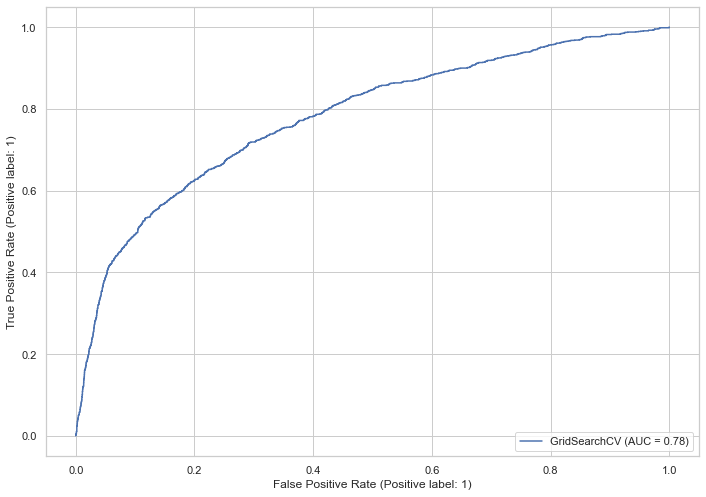

<Figure size 842.4x595.44 with 0 Axes>

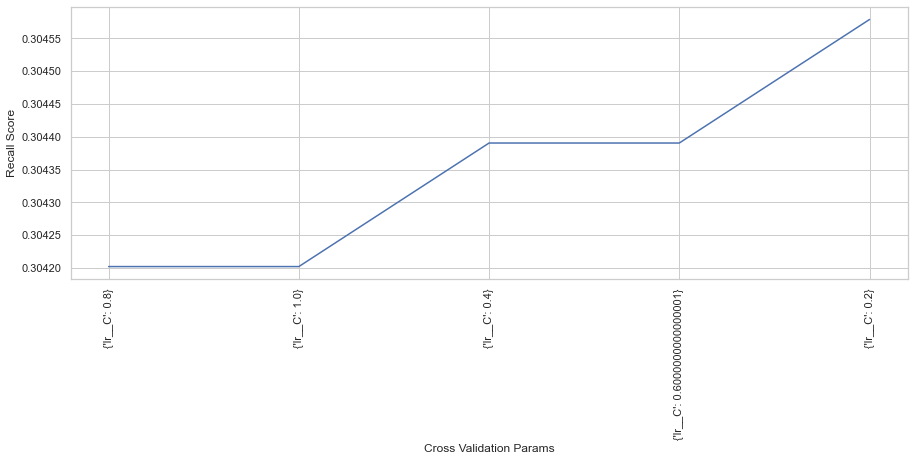

RECALL Best CV Score: 0.30457888038680064
recall_score (Train): 0.308
recall_score (Test): 0.323
f1_score (Train): 0.425
f1_score (Test): 0.442
precision_score (Train): 0.687
precision_score (Test): 0.702
roc_auc_score (Test): 0.780
[[4491  182]
 [ 899  428]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.70      0.32      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [75]:
# # Define file name for pickle to dump to.
filename = './model/logisticregNORS.pkl'

# Define pipeline
pipe_lr = Pipeline([
    ('columntransform', col_transformer),
    ('lr', LogisticRegression(random_state=randomseed, max_iter=500, solver='liblinear'))
])

# Define param grid
lr_param = {
    'lr__C': np.arange(0.2,1.2,0.2)
}

# Train model using the train_model function
# lr_baseline = train_model(X_train,y_train, pipe_lr, lr_param, filename, recallscorer)

# # Load pickle file since we have already trained the model
lr_baseline = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(lr_baseline, full_data, 'Logistic Regression (No Resample)')

# Random Forest Classifier baseline

Best parameters: {'rfc__max_depth': 15, 'rfc__n_estimators': 200}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

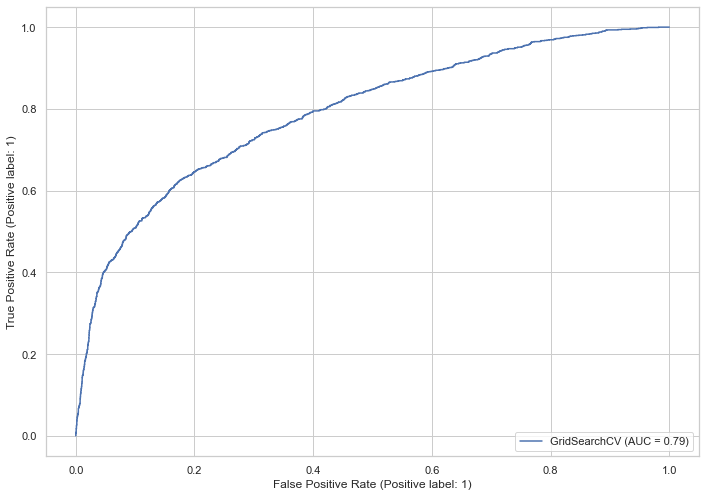

<Figure size 842.4x595.44 with 0 Axes>

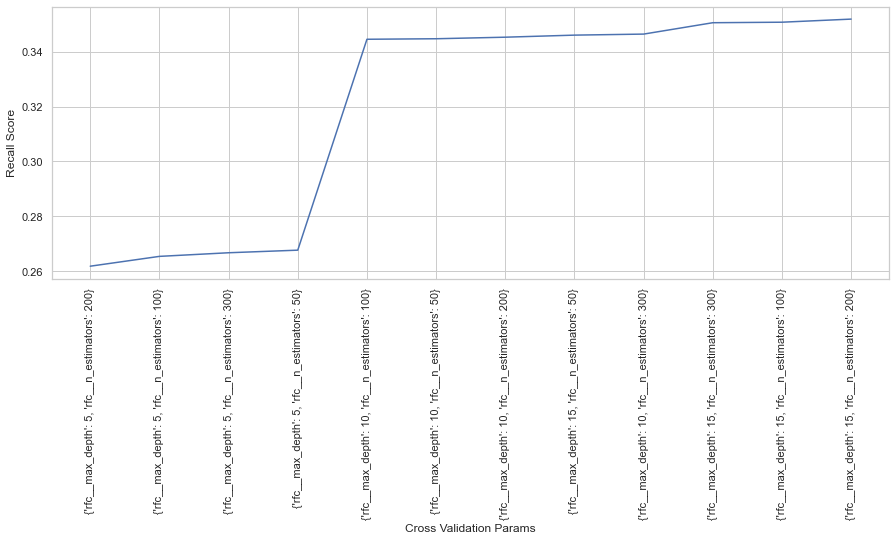

RECALL Best CV Score: 0.35185812339920236
recall_score (Train): 0.544
recall_score (Test): 0.384
f1_score (Train): 0.694
f1_score (Test): 0.500
precision_score (Train): 0.957
precision_score (Test): 0.713
roc_auc_score (Test): 0.792
[[4468  205]
 [ 817  510]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4673
           1       0.71      0.38      0.50      1327

    accuracy                           0.83      6000
   macro avg       0.78      0.67      0.70      6000
weighted avg       0.82      0.83      0.81      6000



In [76]:
# Define file name for pickle to dump to.
filename = './model/randomforestclassifierNORS.pkl'

# Define pipeline
pipe_rfc = Pipeline([
    ('columntransform', col_transformer),
    ('rfc', RandomForestClassifier(random_state=randomseed))
])

# Define param grid
rfc_param = {
    'rfc__n_estimators': [50,100,200,300],
    'rfc__max_depth': np.arange(5,20,5)
}

# Train model using the train_model function
# rfc_baseline = train_model(X_train,y_train, pipe_rfc, rfc_param, filename, recallscorer)

# Load pickle file since we have already trained the model
rfc_baseline = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(rfc_baseline, full_data, 'Random Forest Classifier (No Resample)')

# AdaBoost Classifier Baseline (no resample)

Best parameters: {'adb__n_estimators': 200}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

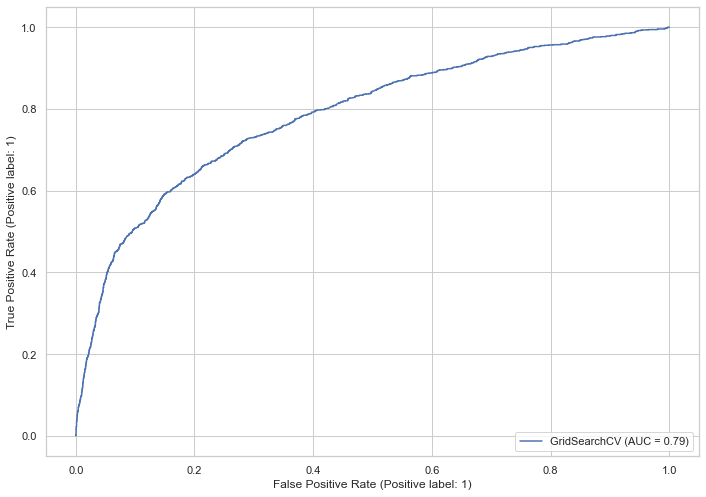

<Figure size 842.4x595.44 with 0 Axes>

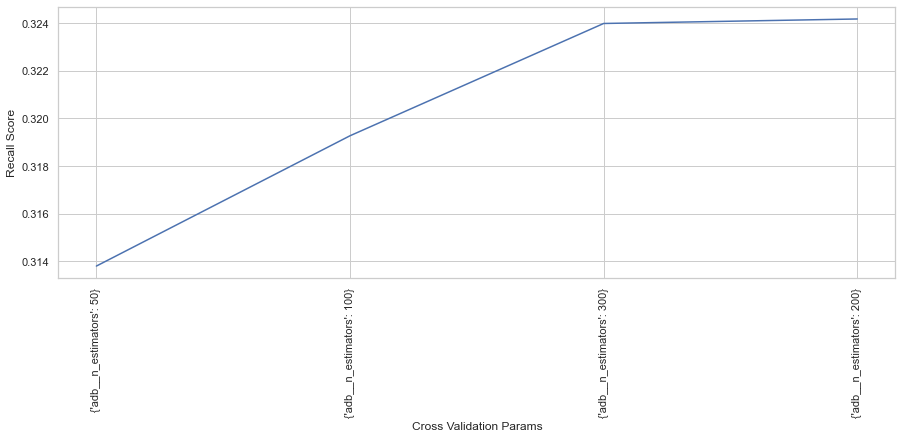

RECALL Best CV Score: 0.3241688276880533
recall_score (Train): 0.330
recall_score (Test): 0.340
f1_score (Train): 0.446
f1_score (Test): 0.456
precision_score (Train): 0.688
precision_score (Test): 0.692
roc_auc_score (Test): 0.786
[[4472  201]
 [ 876  451]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.34      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



In [77]:
# Define file name for pickle to dump to.
filename = './model/AdaBoostclassifierNORS.pkl'

# Define pipeline
pipe_adb = Pipeline([
    ('columntransform', col_transformer),
    ('adb', AdaBoostClassifier())
])

# Define param grid
adb_param = {
    'adb__n_estimators': [50,100,200,300],
    
}

# Train model using the train_model function
# adb_baseline = train_model(X_train,y_train, pipe_adb, adb_param, filename, recallscorer)

# Load pickle file since we have already trained the model
adb_baseline = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(adb_baseline, full_data, 'AdaBoost Classifier (No Resample)')

# XGBoost baseline (no resample)

C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

Best parameters: {'xgb__max_depth': 14, 'xgb__n_estimators': 200}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


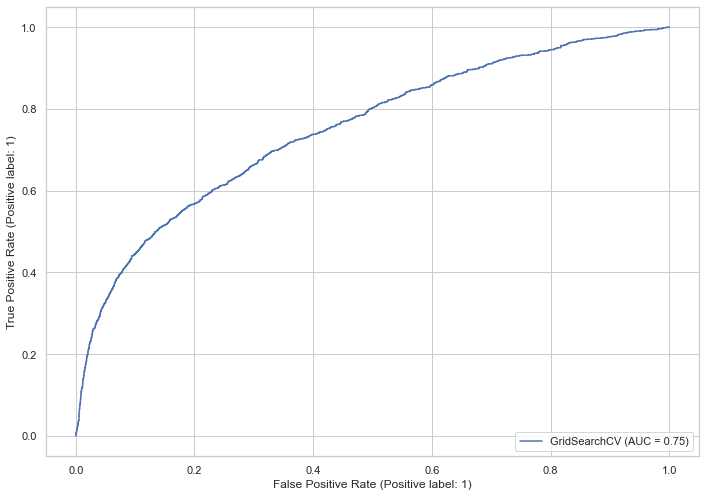

<Figure size 842.4x595.44 with 0 Axes>

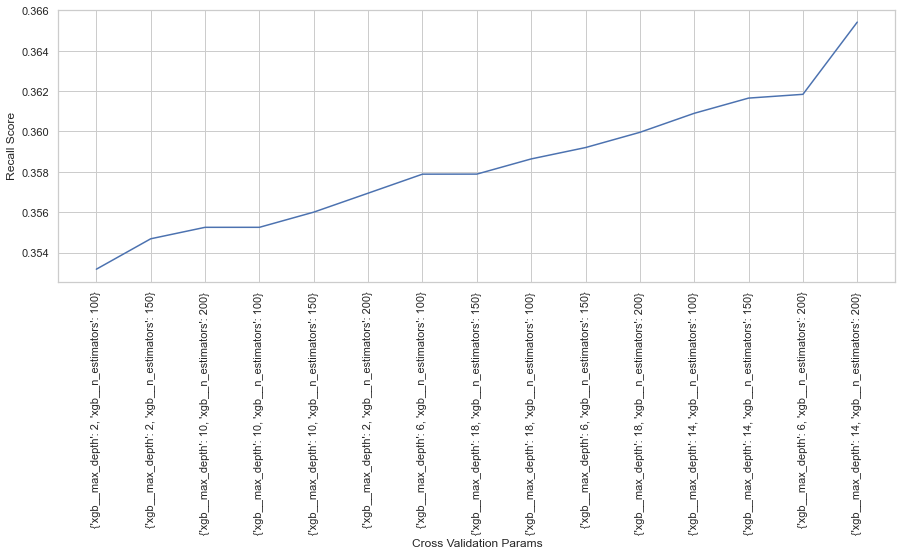

RECALL Best CV Score: 0.3654208178689401
recall_score (Train): 0.995
recall_score (Test): 0.384
f1_score (Train): 0.997
f1_score (Test): 0.472
precision_score (Train): 0.999
precision_score (Test): 0.614
roc_auc_score (Test): 0.750
[[4353  320]
 [ 818  509]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.61      0.38      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [78]:
# Define file name for pickle to dump to.
filename = './model/XGBoostNORS.pkl'

# Define pipeline
pipe_xgb = Pipeline([
    ('columntransform', col_transformer),
    ('xgb', XGBClassifier())
])

# Define param grid
xgb_param = {
    'xgb__n_estimators': [100,150,200],
    'xgb__max_depth': np.arange(2,20,4)
}


# Train model using the train_model function
# xgb_baseline = train_model(X_train,y_train, pipe_xgb, xgb_param, filename, recallscorer)

# Load pickle file since we have already trained the model
xgb_baseline = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(xgb_baseline, full_data, 'XGBoost Classifier (No Resample)')

# Fully Connected Neural Network baseline

In [79]:
# define function to create a simple FCNN with 3 hidden layers and 1 input & output layer

def build_fcnn(unit):
    nn = tf.keras.models.Sequential()
    # Define input layer
    nn.add(Input(shape=(X_train.shape[1],)))
    nn.add(Flatten())
    # Define hidden layer
    nn.add(Dense(units=unit, activation='relu'))
    nn.add(Dense(units=unit, activation='relu'))
    nn.add(Dense(units=unit, activation='relu'))
    # Define output layer
    nn.add(Dense(units=1, activation='sigmoid')) # sigmoid function will output probabilities.
    nn.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()])
    return nn


In [80]:
# Define file name for us to save keras model to:
filename = './model/FCNNNORS.h5'

# Define pipeline
pipe_fcnn = Pipeline([
    ('columntransform', col_transformer),
    ('fcnn', KerasClassifier(build_fn=build_fcnn))
])

# Define param grid
fcnn_param = {
    'fcnn__batch_size': [64],
    'fcnn__nb_epoch': [100],
    'fcnn__unit': [32, 64, 128, 256],
}


#### TRAINING THE MODEL ####


# # Train model using the train_nn function (SINCE WE HAVE TRAINED THE MODEL, we simply load it below.)
# fcnn_baseline = train_nn(X_train,y_train, pipe_fcnn, fcnn_param, filename, recallscorer)

# # Print results using print_results function for cross validated results and appends to the CV dictionary.
# print_nn_results_cv(fcnn_baseline, full_data, 'Fully Connected Neural Network (No Resample)') 

# # Save the model that we have trained through the KerasClassifier
# best_fcnn_baseline = fcnn_baseline.best_estimator_['fcnn'].model # retrieving the keras model through the keras classifier
# best_fcnn_baseline.save(filename)

![alt text](./graphs/fcnn_baseline.png "Cross-Validation for baseline FCNN")

We are able to save the keras model if we use the best_estimator_ method to get to the pipeline, thereafter using the name of the KerasClassifier and saving its model by calling .save to a h5 file format. This helps us to prevent the training time when the kernel is restarted.

We first need to save a copy of the standard scaled data for training and test to load back the same scores previously.

In [81]:
# Save a copy of standard scaled data for training and test data to re-train the NN based on best parameters and save it after
sc = StandardScaler()
X_train_stdscale = sc.fit_transform(X_train)
X_test_stdscale = sc.transform(X_test)

# Saving a copy of full_data_nn as a tuple with standard scaling since we are testing the loaded model without pipeline:
full_data_nn = (X_train_stdscale, X_test_stdscale, y_train, y_test)


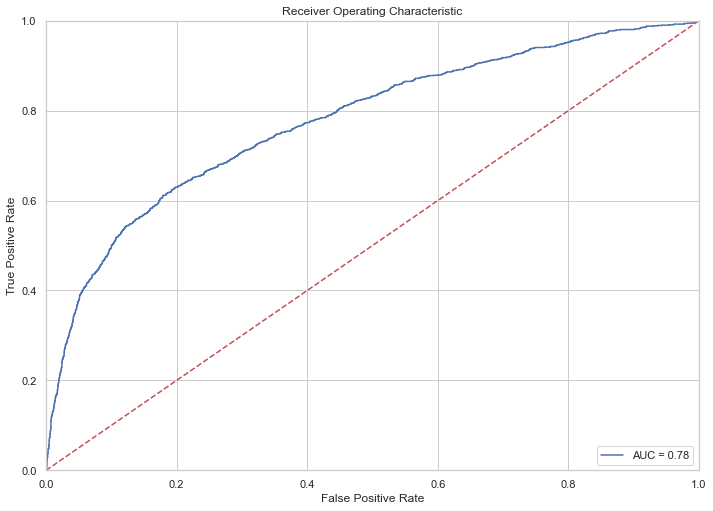

recall_score (Train): 0.337
recall_score (Test): 0.349
f1_score (Train): 0.451
f1_score (Test): 0.464
precision_score (Train): 0.682
precision_score (Test): 0.693
roc_auc_score (Test): 0.777
[[4468  205]
 [ 864  463]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [82]:
# Load best trained model and display the best model results accordingly.
best_fcnn_baseline = load_model(filename)
print_nn_results_bestmodel(best_fcnn_baseline, full_data_nn, 'Fully Connected Neural Network (No Resample)')

# Oversample only models (sampling strategy = 0.6)

In [83]:
os = RandomOverSampler(sampling_strategy = 0.6, random_state=randomseed)

# Logistic Regression (oversample)

Best parameters: {'lr__C': 0.2}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

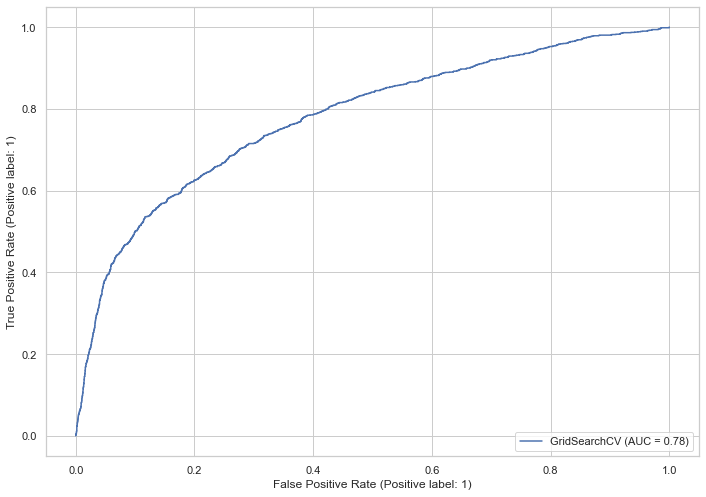

<Figure size 842.4x595.44 with 0 Axes>

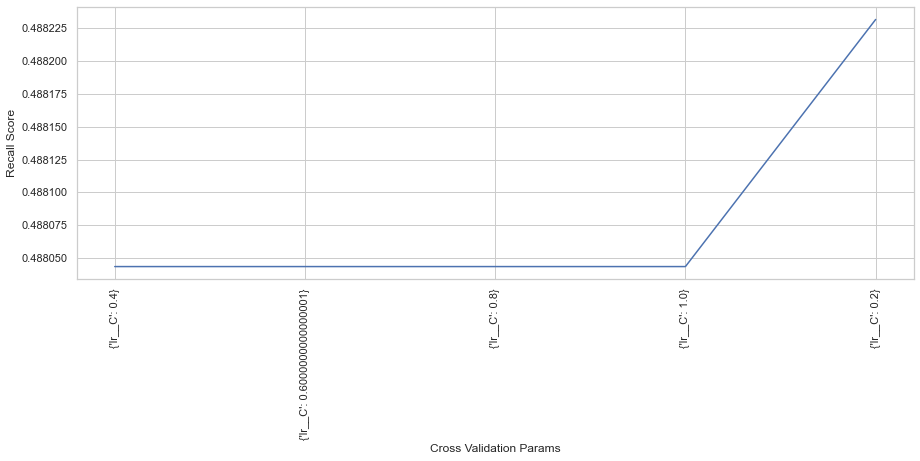

RECALL Best CV Score: 0.48823179639007364
recall_score (Train): 0.490
recall_score (Test): 0.515
f1_score (Train): 0.525
f1_score (Test): 0.542
precision_score (Train): 0.565
precision_score (Test): 0.572
roc_auc_score (Test): 0.779
[[4161  512]
 [ 643  684]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4673
           1       0.57      0.52      0.54      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.70      0.71      6000
weighted avg       0.80      0.81      0.80      6000



In [84]:
# Define file name for pickle to dump to.
filename = './model/logisticregOS.pkl'

# Define pipeline
pipe_lr_os = Pipeline([
    ('os', os),
    ('columntransform', col_transformer),
    ('lr', LogisticRegression(random_state=randomseed, max_iter=500, solver='liblinear'))
])

# Define param grid
lr_os_param = {
    'lr__C': np.arange(0.2,1.2,0.2)
}

# Train model using the train_model function
# lr_os = train_model(X_train,y_train, pipe_lr_os, lr_os_param, filename, recallscorer)

# Load pickle file since we have already trained the model
lr_os = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(lr_os, full_data, 'Logistic Regression Oversample')

# Random Forest Classifier (Oversample)

Best parameters: {'rfc__max_depth': 10, 'rfc__n_estimators': 50}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

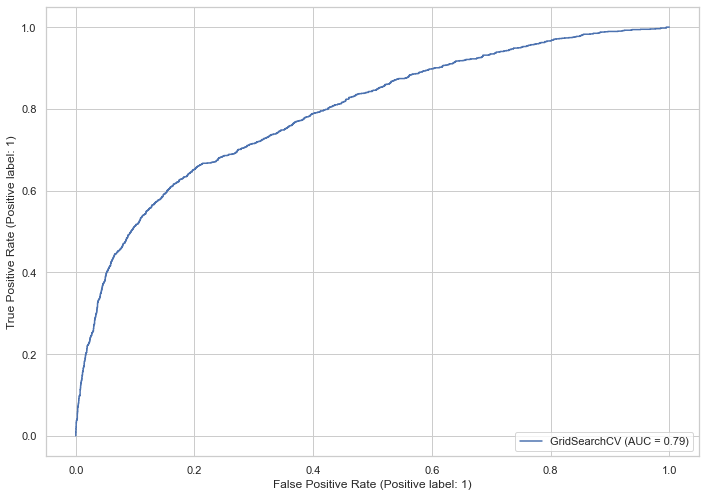

<Figure size 842.4x595.44 with 0 Axes>

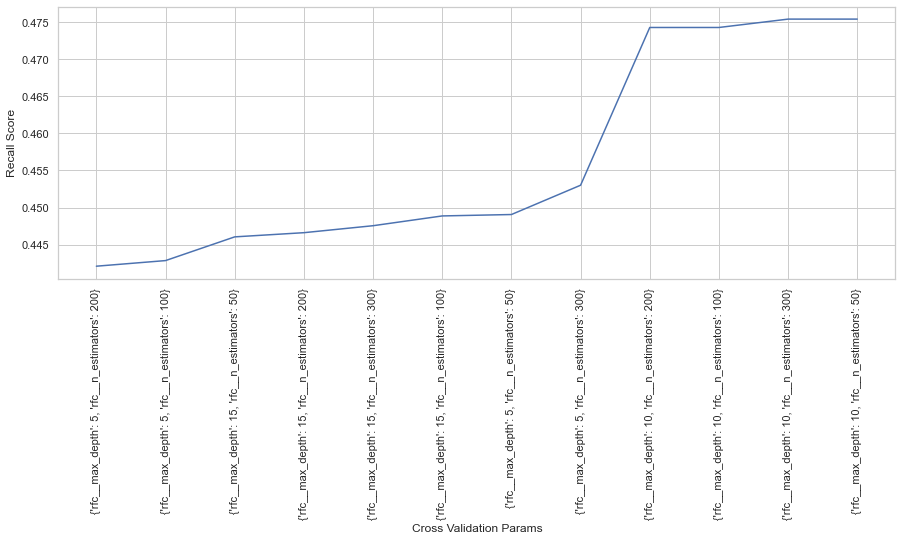

RECALL Best CV Score: 0.4754247050449865
recall_score (Train): 0.545
recall_score (Test): 0.500
f1_score (Train): 0.599
f1_score (Test): 0.547
precision_score (Train): 0.665
precision_score (Test): 0.604
roc_auc_score (Test): 0.790
[[4237  436]
 [ 663  664]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4673
           1       0.60      0.50      0.55      1327

    accuracy                           0.82      6000
   macro avg       0.73      0.70      0.72      6000
weighted avg       0.81      0.82      0.81      6000



In [85]:
# Define file name for pickle to dump to.
filename = './model/randomforestclassifierOS.pkl'

# Define pipeline
pipe_rfc_os = Pipeline([
    ('os', os),
    ('columntransform', col_transformer),
    ('rfc', RandomForestClassifier(random_state=randomseed))
])

# Define param grid
rfc_os_param = {
    'rfc__n_estimators': [50,100,200,300],
    'rfc__max_depth': np.arange(5,20,5)
}

# Train model using the train_model function
# rfc_os = train_model(X_train,y_train, pipe_rfc_os, rfc_os_param, filename, recallscorer)

# Load pickle file since we have already trained the model
rfc_os = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(rfc_os, full_data, 'Random Forest Classifier Oversample')

# Adaboost Oversample

Best parameters: {'adb__n_estimators': 50}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

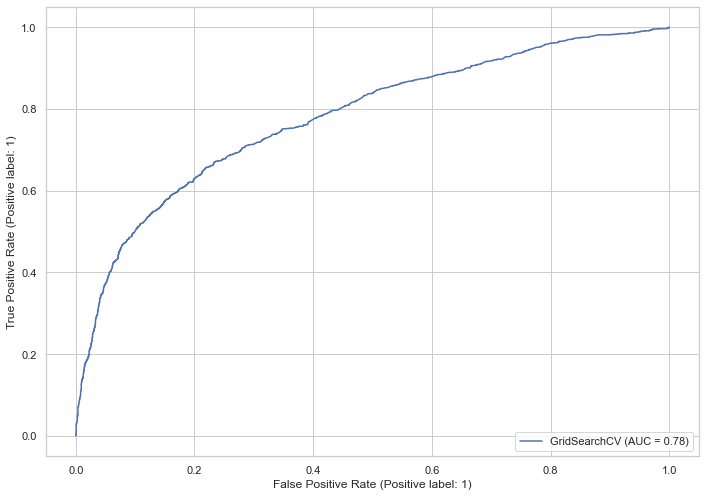

<Figure size 842.4x595.44 with 0 Axes>

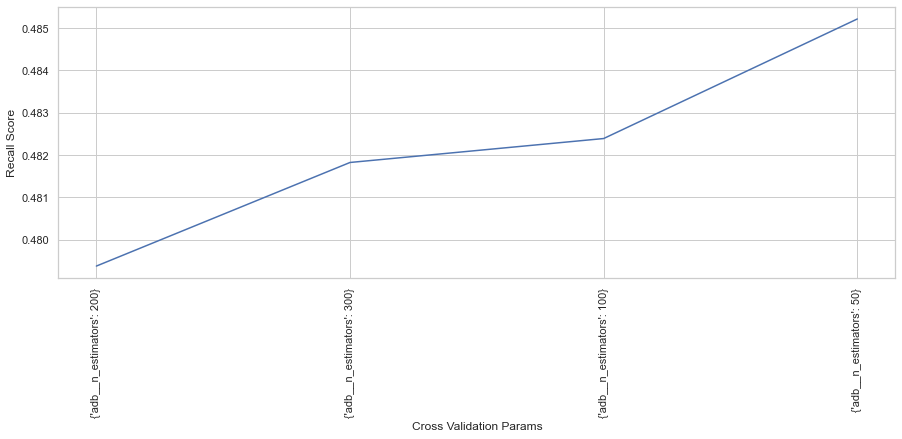

RECALL Best CV Score: 0.4852175487361353
recall_score (Train): 0.487
recall_score (Test): 0.512
f1_score (Train): 0.524
f1_score (Test): 0.543
precision_score (Train): 0.568
precision_score (Test): 0.578
roc_auc_score (Test): 0.779
[[4177  496]
 [ 647  680]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4673
           1       0.58      0.51      0.54      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.70      0.71      6000
weighted avg       0.80      0.81      0.81      6000



In [86]:
# Define file name for pickle to dump to.
filename = './model/AdaBoostclassifierOS.pkl'

# Define pipeline
pipe_adb_os = Pipeline([
    ('os', os),
    ('columntransform', col_transformer),
    ('adb', AdaBoostClassifier())
])

# Define param grid
adb_os_param = {
    'adb__n_estimators': [50,100,200,300],
    
}

# Train model using the train_model function
# adb_os = train_model(X_train,y_train, pipe_adb_os, adb_os_param, filename, recallscorer)

# Load pickle file since we have already trained the model
adb_os = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(adb_os, full_data, 'AdaBoost Classifier Oversample')

# XGBoost Oversample

Best parameters: {'xgb__max_depth': 2, 'xgb__n_estimators': 150}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

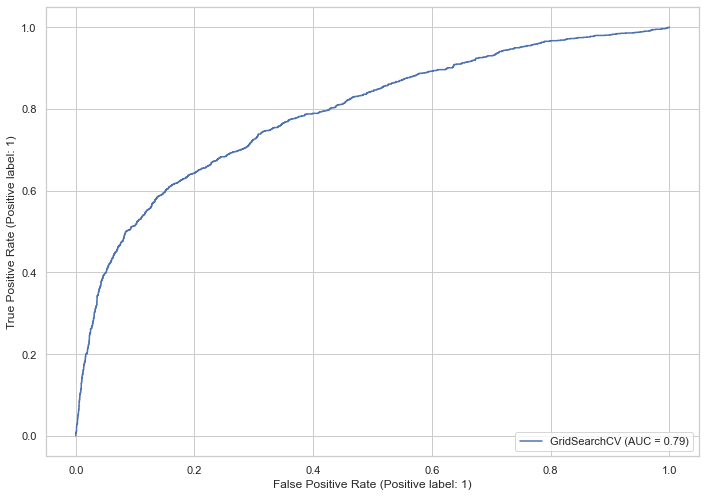

<Figure size 842.4x595.44 with 0 Axes>

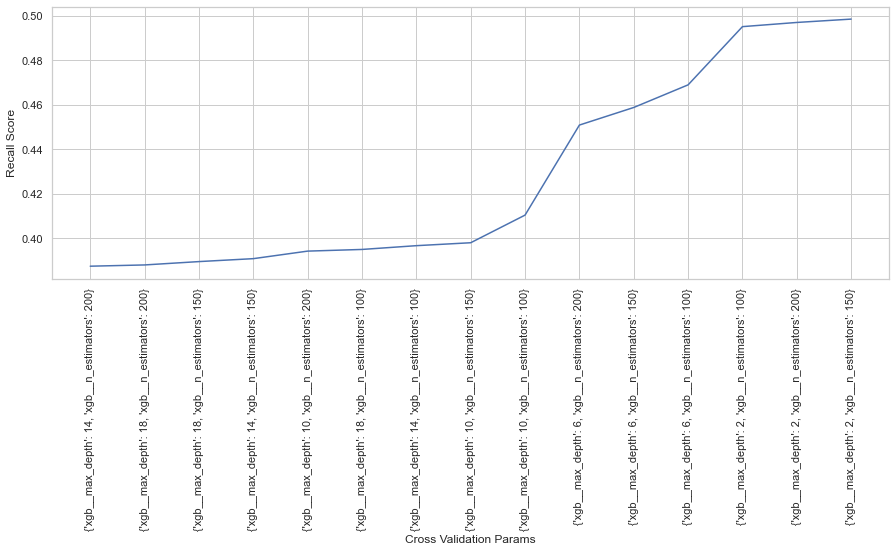

RECALL Best CV Score: 0.4985919192887356
recall_score (Train): 0.521
recall_score (Test): 0.523
f1_score (Train): 0.554
f1_score (Test): 0.555
precision_score (Train): 0.591
precision_score (Test): 0.591
roc_auc_score (Test): 0.790
[[4192  481]
 [ 633  694]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4673
           1       0.59      0.52      0.55      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.71      0.72      6000
weighted avg       0.81      0.81      0.81      6000



In [87]:
# Define file name for pickle to dump to.
filename = './model/XGBoostOS.pkl'

# Define pipeline
pipe_xgb_os = Pipeline([
    ('os', os),
    ('columntransform', col_transformer),
    ('xgb', XGBClassifier())
])

# Define param grid
xgb_os_param = {
    'xgb__n_estimators': [100,150,200],
    'xgb__max_depth': np.arange(2,20,4)
}


# Train model using the train_model function
# xgb_os = train_model(X_train,y_train, pipe_xgb_os, xgb_os_param, filename, recallscorer)

# # Load pickle file since we have already trained the model
xgb_os = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(xgb_os, full_data, 'XGBoost Classifier Oversample')

# Neural Network Oversample

In [88]:
# Define file name for keras model to be saved to
filename = './model/FCNNNOS.h5'

# Define pipeline
pipe_fcnn_os = Pipeline([
    ('os', os),
    ('columntransform', col_transformer),
    ('fcnn', KerasClassifier(build_fn=build_fcnn))
])

# Define param grid
fcnn_os_param = {
    'fcnn__batch_size': [64],
    'fcnn__nb_epoch': [100],
    'fcnn__unit': [32, 64, 128, 256],
}


#### TRAIN MODEL ####

# # Train model using the train_nn function (SINCE WE HAVE TRAINED THE MODEL, we simply load it below.)
# fcnn_os = train_nn(X_train,y_train, pipe_fcnn_os, fcnn_os_param, filename, recallscorer)

# # Print results using print_results function for cross validated results
# print_nn_results_cv(fcnn_os, full_data, 'Fully Connected Neural Network Oversample')

# # Save the model that we have trained through KerasClassifier
# best_fcnn_os = fcnn_os.best_estimator_['fcnn'].model # Retrieving the keras model through the keras classifier
# best_fcnn_os.save(filename)

![alt text](./graphs/fcnn_oversample.png "Cross-Validation for oversampled FCNN")

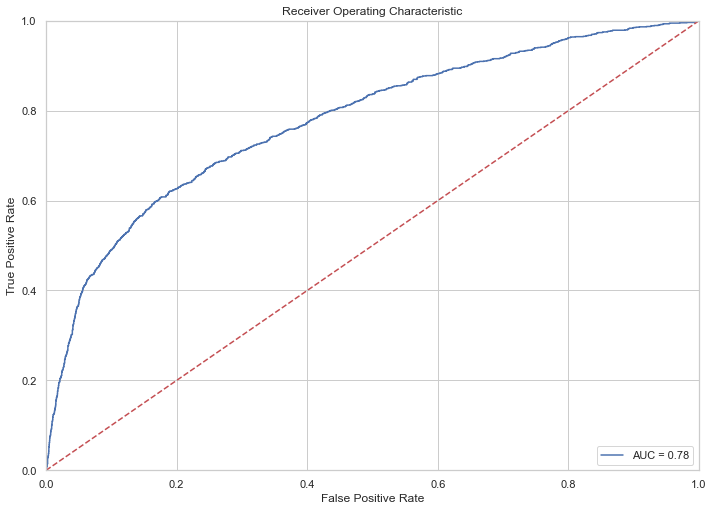

recall_score (Train): 0.575
recall_score (Test): 0.598
f1_score (Train): 0.528
f1_score (Test): 0.547
precision_score (Train): 0.488
precision_score (Test): 0.504
roc_auc_score (Test): 0.778
[[3894  779]
 [ 534  793]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      4673
           1       0.50      0.60      0.55      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.72      0.70      6000
weighted avg       0.80      0.78      0.79      6000



In [89]:
# Load best trained model and display the best model results accordingly.
best_fcnn_os = load_model(filename)
print_nn_results_bestmodel(best_fcnn_os, full_data_nn, 'Fully Connected Neural Network Oversample')

# Undersample only models (sampling strategy = 0.6)

In [90]:
us = RandomUnderSampler(sampling_strategy = 0.6, random_state = randomseed)

# Logistic Regression (undersample)

Best parameters: {'lr__C': 0.6000000000000001}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

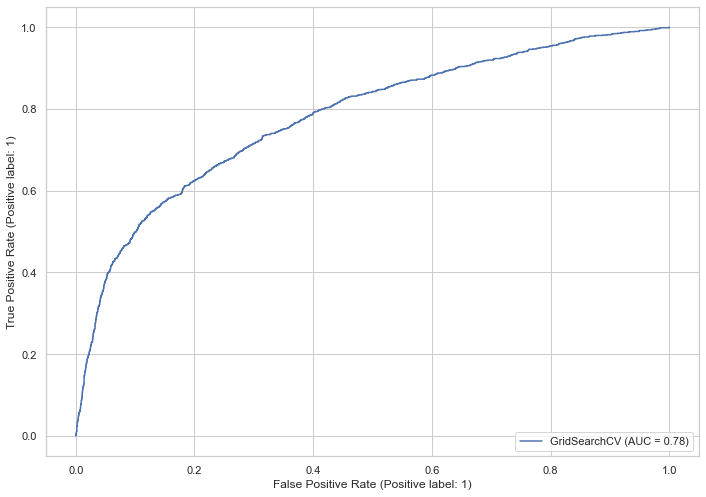

<Figure size 842.4x595.44 with 0 Axes>

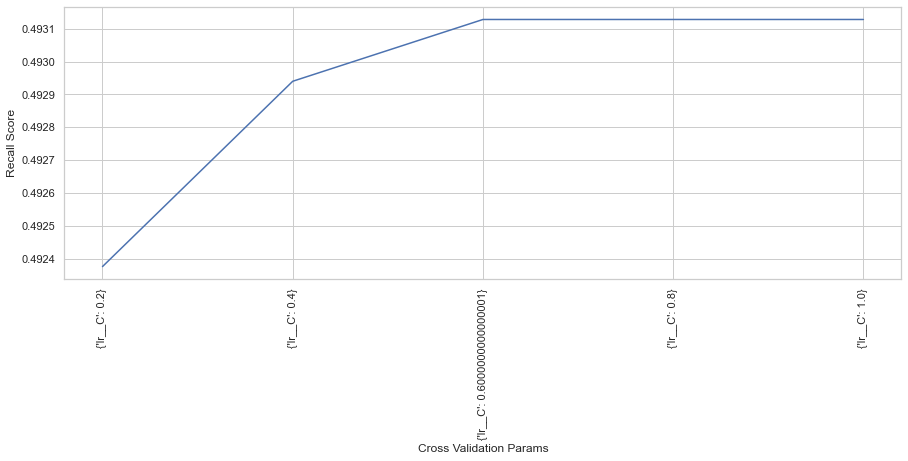

RECALL Best CV Score: 0.4931285732288943
recall_score (Train): 0.493
recall_score (Test): 0.522
f1_score (Train): 0.525
f1_score (Test): 0.547
precision_score (Train): 0.562
precision_score (Test): 0.574
roc_auc_score (Test): 0.780
[[4159  514]
 [ 634  693]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4673
           1       0.57      0.52      0.55      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.71      0.71      6000
weighted avg       0.80      0.81      0.81      6000



In [91]:
# Define file name for pickle to dump to.
filename = './model/logisticregUS.pkl'

# Define pipeline
pipe_lr_us = Pipeline([
    ('us', us),
    ('columntransform', col_transformer),
    ('lr', LogisticRegression(random_state=randomseed, max_iter=500, solver='liblinear'))
])

# Define param grid
lr_us_param = {
    'lr__C': np.arange(0.2,1.2,0.2)
}

# Train model using the train_model function
# lr_us = train_model(X_train,y_train, pipe_lr_us, lr_us_param, filename, recallscorer)

# # Load pickle file since we have already trained the model
lr_us = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(lr_us, full_data, 'Logistic Regression Undersample')

# Random Forest Classifier (undersample)

Best parameters: {'rfc__max_depth': 15, 'rfc__n_estimators': 50}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

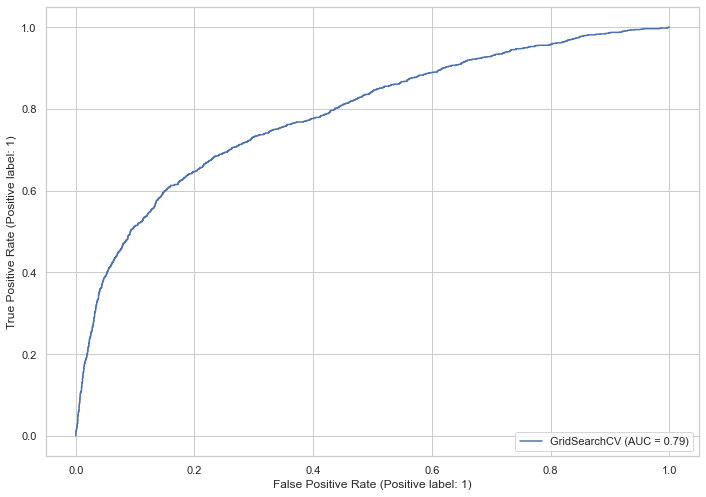

<Figure size 842.4x595.44 with 0 Axes>

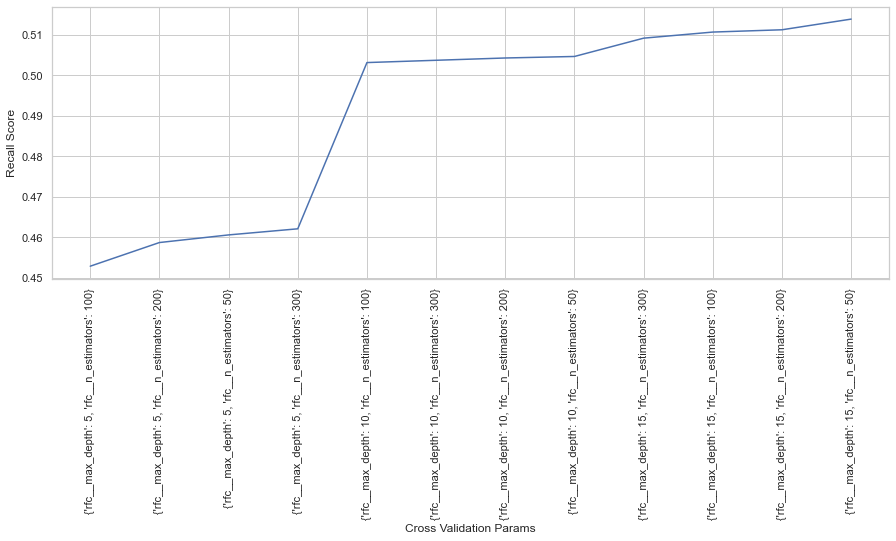

RECALL Best CV Score: 0.5138466890667406
recall_score (Train): 0.682
recall_score (Test): 0.531
f1_score (Train): 0.702
f1_score (Test): 0.550
precision_score (Train): 0.723
precision_score (Test): 0.571
roc_auc_score (Test): 0.788
[[4143  530]
 [ 622  705]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4673
           1       0.57      0.53      0.55      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.71      0.71      6000
weighted avg       0.80      0.81      0.81      6000



In [92]:
# Define file name for pickle to dump to.
filename = './model/randomforestclassifierUS.pkl'

# Define pipeline
pipe_rfc_us = Pipeline([
    ('us', us),
    ('columntransform', col_transformer),
    ('rfc', RandomForestClassifier(random_state=randomseed))
])

# Define param grid
rfc_us_param = {
    'rfc__n_estimators': [50,100,200,300],
    'rfc__max_depth': np.arange(5,20,5)
}

# Train model using the train_model function
# rfc_us = train_model(X_train,y_train, pipe_rfc_us, rfc_us_param, filename, recallscorer)

# # # Load pickle file since we have already trained the model
rfc_us = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(rfc_us, full_data, 'Random Forest Classifier Undersample')

# Adaboost Undersample

Best parameters: {'adb__n_estimators': 200}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

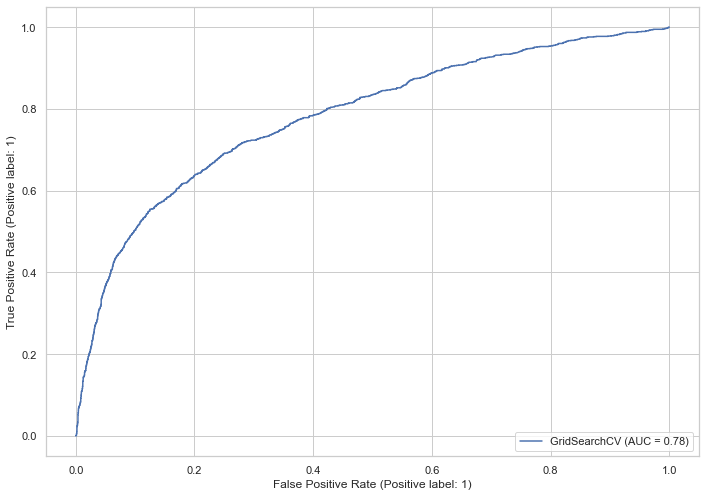

<Figure size 842.4x595.44 with 0 Axes>

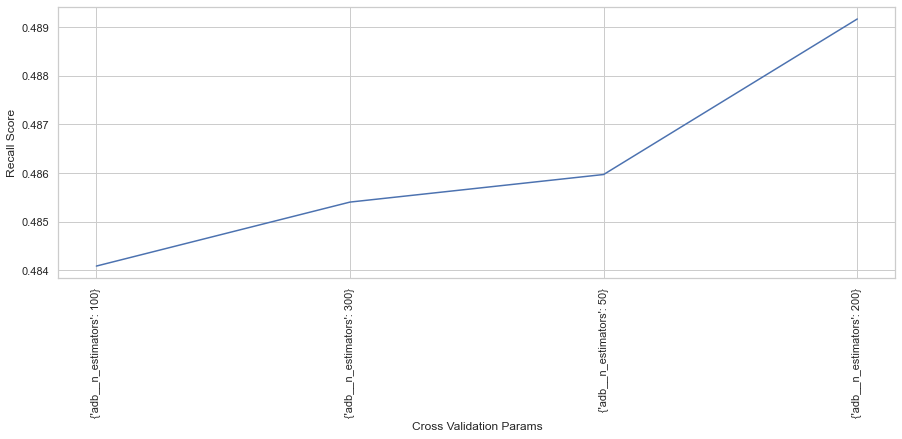

RECALL Best CV Score: 0.48917093102303727
recall_score (Train): 0.502
recall_score (Test): 0.530
f1_score (Train): 0.533
f1_score (Test): 0.550
precision_score (Train): 0.569
precision_score (Test): 0.572
roc_auc_score (Test): 0.782
[[4146  527]
 [ 624  703]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4673
           1       0.57      0.53      0.55      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.71      0.71      6000
weighted avg       0.80      0.81      0.81      6000



In [93]:
# Define file name for pickle to dump to.
filename = './model/AdaBoostclassifierUS.pkl'

# Define pipeline
pipe_adb_us = Pipeline([
    ('us', us),
    ('columntransform', col_transformer),
    ('adb', AdaBoostClassifier())
])

# Define param grid
adb_us_param = {
    'adb__n_estimators': [50,100,200,300],
    
}

# Train model using the train_model function
# adb_us = train_model(X_train,y_train, pipe_adb_us, adb_us_param, filename, recallscorer)

# # # Load pickle file since we have already trained the model
adb_us = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(adb_us, full_data, 'AdaBoost Classifier Undersample')

# XGBoost Undersample

Best parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 100}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.24.2 when using version 1.0.1. This might lead to breaking code or invalid results

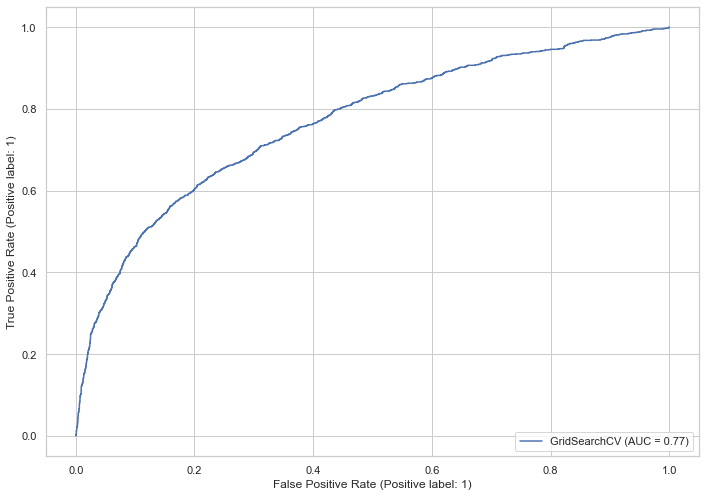

<Figure size 842.4x595.44 with 0 Axes>

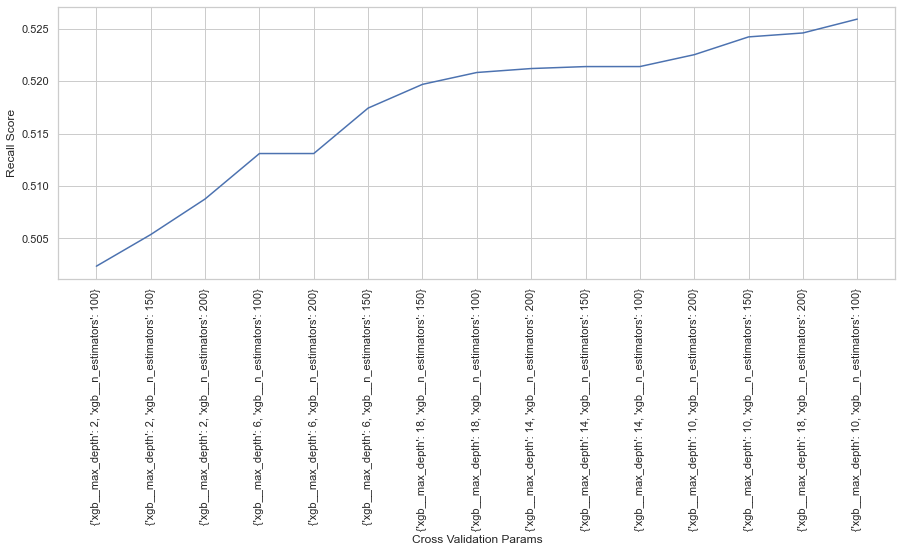

RECALL Best CV Score: 0.5259010172331471
recall_score (Train): 0.945
recall_score (Test): 0.562
f1_score (Train): 0.831
f1_score (Test): 0.530
precision_score (Train): 0.742
precision_score (Test): 0.501
roc_auc_score (Test): 0.767
[[3931  742]
 [ 581  746]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4673
           1       0.50      0.56      0.53      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



In [94]:
# Define file name for pickle to dump to.
filename = './model/XGBoostUS.pkl'

# Define pipeline
pipe_xgb_us = Pipeline([
    ('us', us),
    ('columntransform', col_transformer),
    ('xgb', XGBClassifier())
])

# Define param grid
xgb_us_param = {
    'xgb__n_estimators': [100,150,200],
    'xgb__max_depth': np.arange(2,20,4)
}


# Train model using the train_model function
# xgb_us = train_model(X_train,y_train, pipe_xgb_us, xgb_us_param, filename, recallscorer)

# # Load pickle file since we have already trained the model
xgb_us = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(xgb_us, full_data, 'XGBoost Classifier Undersample')

# Neural Network Undersample

In [95]:
# Define file name that model is already saved to:
filename = './model/FCNNUS.h5'

# Define pipeline
pipe_fcnn_us = Pipeline([
    ('us', us),
    ('columntransform', col_transformer),
    ('fcnn', KerasClassifier(build_fn=build_fcnn))
])

# Define param grid
fcnn_us_param = {
    'fcnn__batch_size': [64],
    'fcnn__nb_epoch': [100],
    'fcnn__unit': [32, 64, 128, 256],
}


# # Train model using the train_nn function (SINCE WE HAVE TRAINED THE MODEL, we simply load it below.)
# fcnn_us = train_nn(X_train,y_train, pipe_fcnn_us, fcnn_us_param, filename, recallscorer)

# # Print results using print_results function
# print_nn_results_cv(fcnn_us, full_data, 'Fully Connected Neural Network Undersample')

# # Save the model that we have trained through KerasClassifier
# best_fcnn_us = fcnn_us.best_estimator_['fcnn'].model # Retrieving the keras model through the keras classifier
# best_fcnn_us.save(filename)

![alt text](./graphs/fcnn_undersample.png "Cross-Validation for undersampled FCNN")

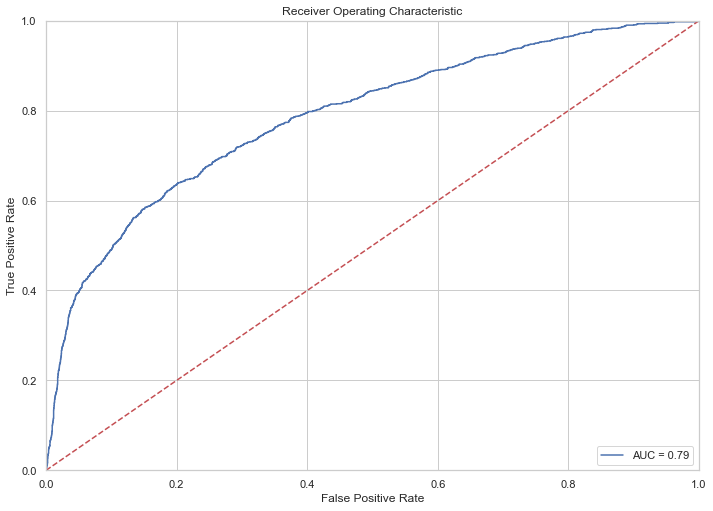

recall_score (Train): 0.528
recall_score (Test): 0.543
f1_score (Train): 0.534
f1_score (Test): 0.547
precision_score (Train): 0.539
precision_score (Test): 0.552
roc_auc_score (Test): 0.787
[[4088  585]
 [ 607  720]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4673
           1       0.55      0.54      0.55      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.80      0.80      0.80      6000



In [96]:
# Load best trained model and display the best model results accordingly.
best_fcnn_us = load_model(filename)
print_nn_results_bestmodel(best_fcnn_us, full_data_nn, 'Fully Connected Neural Network Undersample')

# Results from training & 5-fold cross-validation

In [97]:
# resultdict
# print(len(resultdict))

# Saving our resultdict final results
resultdict_final = {'Fully Connected Neural Network (No Resample)': [{'fcnn__batch_size': 64,
   'fcnn__nb_epoch': 100,
   'fcnn__unit': 128},
  0.34890730972117556,
  0.4641604010025062],
 'Logistic Regression Oversample': [{'lr__C': 0.2},
  0.5154483798040693,
  0.5422116527942925],
 'Random Forest Classifier Oversample': [{'rfc__max_depth': 10,
   'rfc__n_estimators': 50},
  0.5003767897513187,
  0.5471775854964978],
 'AdaBoost Classifier Oversample': [{'adb__n_estimators': 50},
  0.5124340617935192,
  0.5433479824210946],
 'XGBoost Classifier Oversample': [{'xgb__max_depth': 2,
   'xgb__n_estimators': 150},
  0.5229841748304446,
  0.5547561950439648],
 'Fully Connected Neural Network Oversample': [{'fcnn__batch_size': 64,
   'fcnn__nb_epoch': 100,
   'fcnn__unit': 32},
  0.5584024114544084,
  0.546258754146701],
 'Logistic Regression Undersample': [{'lr__C': 0.6000000000000001},
  0.5222305953278071,
  0.5469613259668509],
 'Random Forest Classifier Undersample': [{'rfc__max_depth': 15,
   'rfc__n_estimators': 50},
  0.5312735493594575,
  0.5503512880562061],
 'AdaBoost Classifier Undersample': [{'adb__n_estimators': 200},
  0.5297663903541824,
  0.5498631208447399],
 'XGBoost Classifier Undersample': [{'xgb__max_depth': 10,
   'xgb__n_estimators': 100},
  0.5621703089675961,
  0.5300177619893428],
 'Fully Connected Neural Network Undersample': [{'fcnn__batch_size': 64,
   'fcnn__nb_epoch': 100,
   'fcnn__unit': 256},
  0.49284099472494347,
  0.5325732899022801],
 'XGBoost Classifier (No Resample)': [{'xgb__max_depth': 14,
   'xgb__n_estimators': 200},
  0.3835719668425019,
  0.47217068645640076],
 'AdaBoost Classifier (No Resample)': [{'adb__n_estimators': 200},
  0.3398643556895252,
  0.4557857503789793],
 'Random Forest Classifier (No Resample)': [{'rfc__max_depth': 15,
   'rfc__n_estimators': 200},
  0.38432554634513943,
  0.4995102840352596],
 'Logistic Regression (No Resample)': [{'lr__C': 0.2},
  0.3225320271288621,
  0.4419204956117707]}

Let us view our final results from cross validation and the best model respective scores in a dataframe below

In [98]:
sortedresults = sorted([[k,v[0],v[1],v[2]] for k, v in resultdict_final.items()], key = lambda x: x[2], reverse = True)
res = pd.DataFrame(sortedresults, columns = ['Model','Best Params','Recall Score','F1 Score'])
res.head(len(res))

,Model,Best Params,Recall Score,F1 Score
0,XGBoost Classifier Undersample,"{'xgb__max_depth': 10, 'xgb__n_estimators': 100}",0.562170,0.530018
1,Fully Connected Neural Network Oversample,"{'fcnn__batch_size': 64, 'fcnn__nb_epoch': 100...",0.558402,0.546259
2,Random Forest Classifier Undersample,"{'rfc__max_depth': 15, 'rfc__n_estimators': 50}",0.531274,0.550351
3,AdaBoost Classifier Undersample,{'adb__n_estimators': 200},0.529766,0.549863
4,XGBoost Classifier Oversample,"{'xgb__max_depth': 2, 'xgb__n_estimators': 150}",0.522984,0.554756
5,Logistic Regression Undersample,{'lr__C': 0.6000000000000001},0.522231,0.546961
6,Logistic Regression Oversample,{'lr__C': 0.2},0.515448,0.542212
7,AdaBoost Classifier Oversample,{'adb__n_estimators': 50},0.512434,0.543348
8,Random Forest Classifier Oversample,"{'rfc__max_depth': 10, 'rfc__n_estimators': 50}",0.500377,0.547178
9,Fully Connected Neural Network Undersample,"{'fcnn__batch_size': 64, 'fcnn__nb_epoch': 100...",0.492841,0.532573


From the above, it is obvious that the models without resampling performed the worst as they placed last 5 positions in the rankings. Our top 3 models are XGBoost undersampled model, Fully Connected Neural Network oversampled model and finally the Random Forest Classifier undersampled model.

We can see that sampling strategies have helped improve the recall scores of our model, due to the class imbalance in our label.

# Deep dive into our top model (XGBoost Classifier Undersampled) and model insights

In [99]:
features = sorted([[name,fi] for name,fi in zip(X_train.columns,xgb_us.best_estimator_.named_steps['xgb'].feature_importances_)],key = lambda x: x[1], reverse = True)
f = pd.DataFrame(features)
f.columns = ['Variable Name','Importance']
f.set_index('Variable Name',inplace=True)
f.head(10)

,Importance
Variable Name,
PAY_0,0.323659
PAY_3,0.049457
PAY_4,0.032854
PAY_2,0.029410
PAY_5,0.026693
PAY_6,0.022570
MARRIAGE_3,0.021851
"PAY_AMT2_bin_(25000, 50000]",0.020212
"PAY_AMT5_bin_(25000, 50000]",0.019785


From the above table, we can see that the variable that has the greatest influence on the customer would be PAY_0 which referred to the payment status in the latest month of the dataset - September 2005, and mostly on the months that followed before that. This tells the bank that this is a great indicator and telltale sign of detecting potential credit card defaulters. 

In addition, MARRIAGE_3 which refers to the group of people who are categorized under 'others' for marriage status, also shows up as one of the key factors for feature importance. Our interpretation of 'others' could refer to customers who are separated or divorced. This allows bank to focus on these groups of customers to identify defaulters.

# Achievement Summary (Supervised Learning)

We have achieved ~56% recall in predicting whether a potential customer will default his/her next month's credit payment using the best model.

Rather than using the current strategy and identifying defaulters at an expected success rate of ~22% (from current class imbalance dataset), the bank can have more targets and reminders coming in the way of customers who have been predicted positive by the model and achieve more than 2-fold increase in the expected identification of credit-defaulters.

This prevents the banks from incurring massive losses due to defaulters that are not caught and increased effectiveness of bank catching defaulters. In addition, the banks can make use of the feature importances from the models to focus on groups of customers who have higher probability of being defaulters and act on them before incurring large losses from such cases. Thus, this proves to be useful to the bank.

# Further improvements for supervised learning task

1. The data used in the study was obtained between (start_date) and (end_date). More recent data should be collected to capture the traits and characteristics of today's population, such as social and economic variables that may affect their behaviour in credit payment. This would help to enhance the model's prediction on current customer defaulter trends.

2. Further improvements could be made from fine tuning of hyper-parameters given more computational power, such that we are able to test more hyper-parameters to obtain a more optimal model.

3. To address the imbalanced nature from the current dataset, we could explore alternative resampling strategies, such as SMOTE resampling and other effective methods.

4. In addition, useful data such as other economic variables that would give information about the current economic state such as inflation rate and consumer price index (CPI) could also tell us how customers would behave according to such data, hence, the provision of such data would possibly improve the recall score of the classification models above.

# Unsupervised learning task

### In this section, we will explore a few unsupervised learning methods and their visualizations, namely:

- Autoencoders and their reconstructed errors for defaulters and non-defaulters for credit card.
- K-Means and DBSCAN clustering

## Autoencoders for detecting anomalies in credit card default data

In [100]:
# First import the useful libraries that we will be utilizing
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense

### Visualizing clusters with t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a method to visualize high-dimensional data, which converts similarities between data points to joint probabilities. It tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and high-dimensional data. We can use this method to get an idea of how easy it will be to discriminate between classes.

In [101]:
viz_df = copy_default_df.copy()

viz_df = viz_df.drop(columns=['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin',
        'BILL_AMT5_bin', 'BILL_AMT6_bin','AgeGroup', 'LimitBalGroup', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6'])

viz_df = pd.get_dummies(data=viz_df, columns=['SEX', 'MARRIAGE', 'PAY_AMT1_bin',
       'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin',
       'PAY_AMT6_bin'], drop_first=True)

viz_defaulter = viz_df[viz_df['default.payment.next.month']==1]
viz_nondefaulter = viz_df[viz_df['default.payment.next.month']==0]

# concatenate nondefaulters and defaulters ino a single df.
viz_initial_df = pd.concat([viz_defaulter, viz_nondefaulter])
column_names = list(viz_initial_df.drop(columns=['ID', 'default.payment.next.month']))

# isolate features from the labels
features, labels = viz_initial_df.drop(columns=['ID', 'default.payment.next.month']), viz_initial_df['default.payment.next.month'].values

In [102]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d/3d. Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=randomseed).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Credit Card Defaulters'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Credit Card Non-Defaulters'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show;
    
# tsne_scatter(features, labels, dimensions=2, save_as='./graphs/tsne_initial_2d.png')

Since we have already ran the code above for t-SNE scatter for initial dataframe before utilizing autoencoders result.

![alt text](./graphs/tsne_initial_2d.png "TSNE Scatter (Initial)")

From the above, we can see that some clusters for credit card defaulters are apparent, but there are significant number of defaulters that belong in other clusters.

### Training the autoencoder

We note that we are not using the outcome column 'default.payment.next.month' as a label to predict since this is unsupervised learning. We will train the autoencoder on the nondefaulters data, and see how well it can detect the defaulters which are anomalies.

The autoencoder will only train on data containing non-defaulters. **For this fact, we  will take about 90% of the non-defaulter data for training the autoencoder, the remaining 10% will be utilized for validation**


**We will split the defaulter training data into at 25% validation set and 75% train set.**


The general flow will look like this:

1. Training: only on non-defaulter case (90% training and 10% validation)
    - Split into: <br>
        A. Training dataset for training autoencoder ~90% <br>
        B. Validation of neural network's generalization abilities ~10%


2. Testing: only on defaulters (50% of total defaulters each)
    - Attempt to identify anomalies: <br>
        A. Compute reconstruction loss from the autoencoder using mean squared error <br>
        B. Application of threshold, considering achieving highest recall & precision

In [103]:
viz_df = viz_df.drop(columns=['ID'])
data_0 = viz_df[viz_df['default.payment.next.month']==0] # contains only the non-defaulters
data_1 = viz_df[viz_df['default.payment.next.month']==1] # contains only the defaulters

# We do some data splitting, 
# non defaulters 90%-10% for training and testing
# defaulters data 50%-50% for cross validation and testing

x_train1, x_test1, y_train1, y_test1 = train_test_split(
    data_0.drop(columns=['default.payment.next.month']),
    data_0['default.payment.next.month'],
    test_size=0.1    
)

x_train1_1, x_test1_1, y_train1_1, y_test1_1 = train_test_split(
    data_1.drop(columns=['default.payment.next.month']),
    data_1['default.payment.next.month'],
    test_size=0.5
)


### There is a requirement to scale our data for autoencoders to have reasonable accuracies.

- We do not want gradient of larger parameter to dominate the updates for stochastic gradient descent convergence, and instead want paramters to be updated in equal proportions.

In [104]:
df_train, df_test = train_test_split(viz_df, test_size=0.25, random_state=randomseed)

df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=randomseed)

df_train_0 = df_train.loc[viz_df['default.payment.next.month']==0]
df_train_1 = df_train.loc[viz_df['default.payment.next.month']==1]
df_train_0_x = df_train_0.drop(columns=['default.payment.next.month'])
df_train_1_x = df_train_1.drop(columns=['default.payment.next.month'])

df_valid_0 = df_valid.loc[viz_df['default.payment.next.month'] == 0]
df_valid_1 = df_valid.loc[viz_df['default.payment.next.month'] == 1]
df_valid_0_x = df_valid_0.drop(['default.payment.next.month'], axis=1)
df_valid_1_x = df_valid_1.drop(['default.payment.next.month'], axis=1)
df_test_0 = df_test.loc[viz_df['default.payment.next.month'] == 0]
df_test_1 = df_test.loc[viz_df['default.payment.next.month'] == 1]
df_test_0_x = df_test_0.drop(['default.payment.next.month'], axis=1)
df_test_1_x = df_test_1.drop(['default.payment.next.month'], axis=1)

In [105]:
scaler = StandardScaler().fit(df_train_0_x)
df_train_0_x_rescaled = scaler.transform(df_train_0_x)
df_valid_0_x_rescaled = scaler.transform(df_valid_0_x)
df_valid_x_rescaled = scaler.transform(df_valid.drop(['default.payment.next.month'], axis = 1))
df_test_0_x_rescaled = scaler.transform(df_test_0_x)
df_test_x_rescaled = scaler.transform(df_test.drop(['default.payment.next.month'], axis = 1))

### Creating autoencoder model

In [106]:
model_ae = Sequential()
# Encoding
model_ae.add(Dense(units=32, input_dim=df_train_0_x_rescaled.shape[1], activation='relu'))
model_ae.add(Dense(units=16, activation='relu'))

# Decoding
model_ae.add(Dense(units=32, activation='relu'))
model_ae.add(Dense(units=df_train_0_x_rescaled.shape[1]))
model_ae.compile(loss='mean_squared_error', optimizer='adam')
model_ae.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1376      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 42)                1386      
Total params: 3,834
Trainable params: 3,834
Non-trainable params: 0
_________________________________________________________________


### Define some callbacks, so that the model continues to train as long as it is reducing training loss. We will only save the weights for model with lowest val loss.

In [107]:
### Defining our training parameters for autoencoder
BATCHSIZE=32
EPOCHS=300

from datetime import datetime

# Define date&time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCHSIZE}_layers{len(model_ae.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='./model/model_ae_best_weights.h5',
    save_best_only=True, # allow keras to overwrite the latest checkpoint
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    update_freq='batch'
)

# callbacks argument only takes a list, and is a set of functions to be applied
# at a given stage of the training procedure.
cb = [early_stop, save_model, tensorboard]

In [108]:
# # Train our data with 300 epochs
# ae_history = model_ae.fit(
#     df_train_0_x_rescaled, df_train_0_x_rescaled,
#     shuffle = True,
#     epochs = EPOCHS,
#     batch_size = BATCHSIZE,
#     callbacks = cb,
#     validation_data = (df_valid_0_x_rescaled, df_valid_0_x_rescaled),
#     verbose=1,
# )


# # Plot our autoencoder training performance compared to validation test data
# plt.plot(ae_history.history['loss'])
# plt.plot(ae_history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('Loss')
# plt.xlabel('Number of epochs')
# plt.legend(['train', 'validation'], loc='upper right');


# SINCE we have already trained the model, we can load our model by the following:
model_ae = load_model('./model/model_ae_best_weights.h5')

![alt text](./graphs/autoencodertrainingval_loss_final.png "Autoencoder training/validation loss")

From the above, we can see that our autoencoder seems to perform well, as it is able to perform minimization of the loss function well, just after 95 epochs before early stopping criteria kicked in.

### Finding the optimal threshold based on maximizing both recall and precision to obtain maximum f1-score

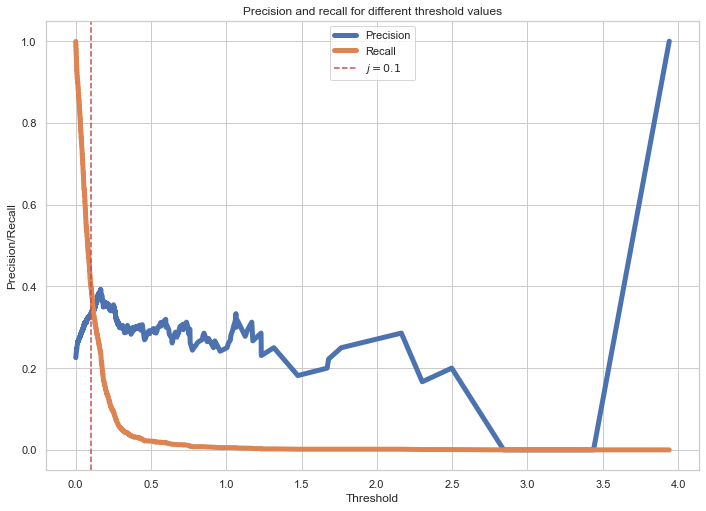

In [109]:
valid_x_predictions = model_ae.predict(df_valid_x_rescaled)
mse = np.mean(np.power(df_valid_x_rescaled - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_valid['default.payment.next.month']})
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.axvline(x=0.1, c='r', ls='--', label=r'$j=0.1$')
plt.legend()
plt.show()

Ideally, we want both recall and precision to be as high as possible, hence, we will see that a correct value of threshold to be utilized should be around 0.1 as shown by the red line, which balances both recall and precision.

In [110]:
from sklearn.metrics import mean_squared_error

# Predicting nondefaulter test data set score
pred = model_ae.predict(df_test_0_x_rescaled)
score1 = mean_squared_error(pred, df_test_0_x_rescaled)

# Predicting out of test sample score consisting of defaulter & nondefaulter mixture
pred2 = model_ae.predict(df_test_x_rescaled)
score2 = mean_squared_error(pred2, df_test_x_rescaled)

print(f'Test sample non-defaulter score (MSE): {score1:.3f}')
print(f'Test sample defaulter score (MSE): {score2:.3f}')

Test sample non-defaulter score (MSE): 0.083
Test sample defaulter score (MSE): 0.091


From the above result, we are able to observe that our training data that contained only non-defaulters had a MSE score of 0.083. With our test sample, which contains only defaulters, we can see that the MSE is higher at 0.091, indicating that the autoencoder picks up some of the samples that are identified as anomalies (credit defaulters).

In [111]:
# Getting the training mse, by which we define our threshold to be within 1 stdev
test_mse = (np.mean(np.power(df_test_x_rescaled - pred2, 2), axis=1))
# Define mse_threshold from the graph
mse_threshold = 0.1
print(f'Threshold defined that maximizes recall & precision: {mse_threshold:.3f}')
outliers_percentile = test_mse > mse_threshold
print(f"Detected {np.sum(outliers_percentile)} outliers in a total of {len(test_mse)} customer data [{np.sum(outliers_percentile)/len(test_mse):.2%}].")

Threshold defined that maximizes recall & precision: 0.100
Detected 2096 outliers in a total of 7500 customer data [27.95%].


In [112]:
# get (mis)classification
cm = confusion_matrix(df_test['default.payment.next.month'], outliers_percentile)

# true/false positives/negatives
(tn, fp, 
 fn, tp) = cm.flatten()

The classifications with threshold=0.1 are as follows:
[[4396 1409]
 [1008  687]]

% of customers labeled as defaulters that were correct (precision): 687/(1409+687) = 32.78%
% of defaulter customers that were caught succesfully (recall):    687/(1008+687) = 40.53%


Text(66.5, 0.5, 'Truth')

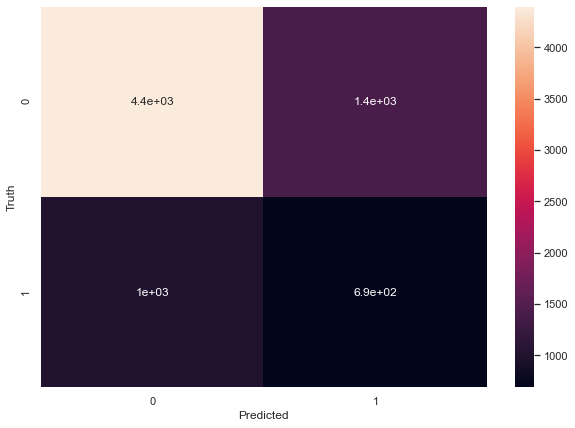

In [113]:
print(f"""The classifications with threshold={mse_threshold} are as follows:
{cm}

% of customers labeled as defaulters that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of defaulter customers that were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


From the above, using the optimal threshold of 0.1 that was defined from the precision & recall trade off against the threshold value used, we are able to see that the autoencoder is able to have a 32.78% precision and 40.53% recall. If there is a requirement for higher recall, the bank is able to adjust the threshold accordingly to get optimal results.

Let us now observe the distribution differences of the defaulters and non-defaulters through a histogram below

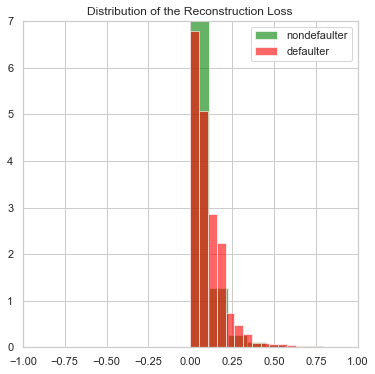

In [114]:
nondefaulter = test_mse[df_test['default.payment.next.month']==0]
defaulter = test_mse[df_test['default.payment.next.month']==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(nondefaulter, bins=100, density=True, label="nondefaulter", alpha=.6, color="green")
ax.hist(defaulter, bins=100, density=True, label="defaulter", alpha=.6, color="red")

plt.title("Distribution of the Reconstruction Loss")
plt.xlim(-1,1)
plt.ylim(0,7)
plt.legend()
plt.show()

Based on our results from the distribution of reconstructed loss, we can see that there are no distinguishable distribution differences between nondefaulters and defaulters. Hence, further improvements have to be made to the autoencoder model to achieve better results.

# KMeans clustering

We first need to decide on the optimal number of clusters to use for our dataset, and we use the elbow method to identify the optimal number of clusters below.

We will make use of a subset of the data from the entire training data set. In our case, we will look at the variables that describe repayment status and history of customers, namely:

- PAY_0 to PAY_6
- BILL_AMT1 to BILL_AMT6
- PAY_AMT1 to PAY_AMT6
- LIMIT_BAL

Using these characteristic traits of the bank customers, we hope to infer some structures and cluster these data into different groups.

In [115]:
# import required libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# Getting subset of the data that is required for analysis
X_kmeans = copy_default_df[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

# Standardize X data for clustering
kmeans_scaler = StandardScaler()
X_kmeans_scaled = kmeans_scaler.fit_transform(X_kmeans)

To decide on the optimal number of kmeans cluster to define, we need to make use of the elbow method, which monitors the trend of inertias from clustering compared to the total number of K clusters used. The point at which inertia starts to decrease in a linear fashion would be the optimal number of clusters to use. We test this from a range of 1 to 10 clusters.

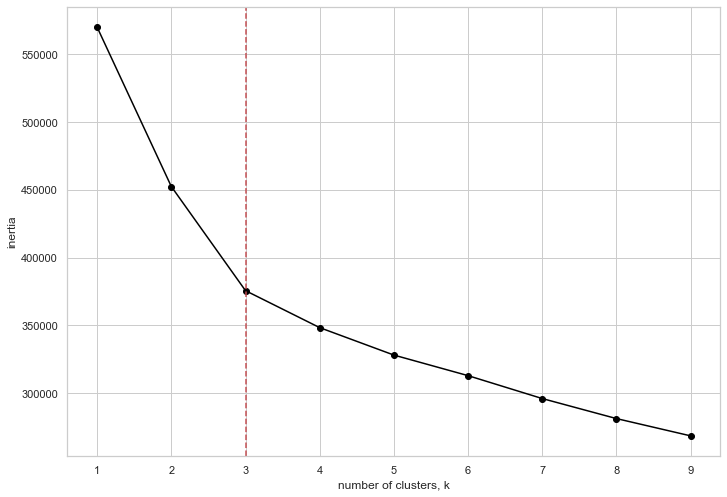

In [116]:
ks = range(1, 10)
inertias_kmeans = []
           
for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, random_state=randomseed)
    
    # Fit model to samples
    kmeans.fit(X_kmeans_scaled)
    
    # Append the inertia to the list of inertias
    inertias_kmeans.append(kmeans.inertia_)
    
plt.plot(ks, inertias_kmeans, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.axvline(x=3, c='r', ls='--', label=r'$j=3$')
plt.show()

From the above, we are able to observe an elbow forming at k = 3. Hence we will proceed to plot the results using 3 clusters. We will apply KMeans clustering once more to pick out the clusters from the selected features and also calculate the silhouette scores.

In [117]:
# Define file name for pickle to dump to.
filename = './model/KMeansFinal.pkl'
# kmeans_final = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=randomseed)
# pickle.dump(kmeans_final, open(filename,'wb'))

# Since we have already trained the model, let us just load the kmeans pickle file and check our results.
kmeans_final = pickle.load(open(filename,'rb'))
kmeans_final_labels = kmeans_final.fit_predict(X_kmeans_scaled)
kmeans_final_silhouette = silhouette_score(X_kmeans_scaled, kmeans_final_labels)
print(f'KMeans Silhouette Score {kmeans_final_silhouette:.3f} using 3 clusters')

KMeans Silhouette Score 0.444 using 3 clusters


# DBSCAN clustering

Let us attempt to use another algorithm, which is DBSCAN. (Describe DBSCAN)

For this algorithm, we need to select min_samples and eps value. We will go with the arbitrary min_samples = dimensions of data and determine the epsilon value by using the method referenced in this article: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

The technique of determining epsilon will calculate the average distance between each point and is k nearest neighbors, where k = MinPts was selected. The average k-distances are then plotted in ascending order on a k-distance graph. The optimal value for epsilon is determined at the point of maximum curvature (where graph has greatest slope)

- Epsilon refers to the maximum radius of the neighborhood. Data points will be valid neighbos if their mutual distance is <= specified epsilon. A larger eps value will produce broader clusters and a smaller eps will build smaller clusters.

- Min points refer to the minimum number of data points within he radius of the neighborhood for it to be considered a cluster. A higher minpts will ensure more robust clusters with less noise, but if it is too large, smaller clusters will be incorporated into larger clusters.


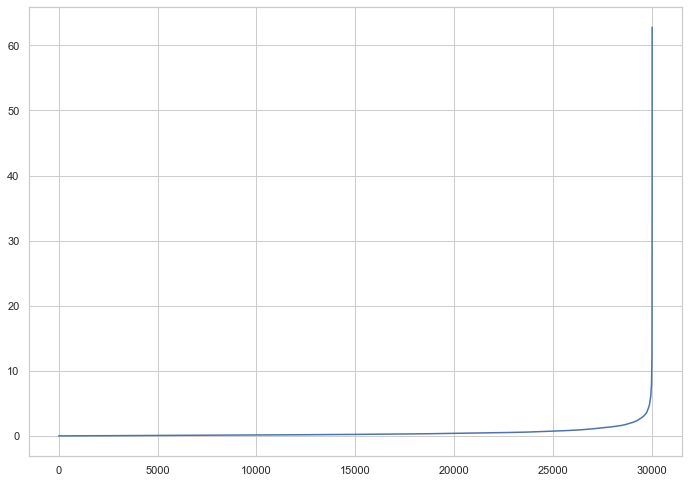

In [118]:
neighbors = NearestNeighbors(n_neighbors=X_kmeans_scaled.shape[1]) # minpts = 2*19
neighbors_fit = neighbors.fit(X_kmeans_scaled)
distances, indices = neighbors_fit.kneighbors(X_kmeans_scaled)

distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

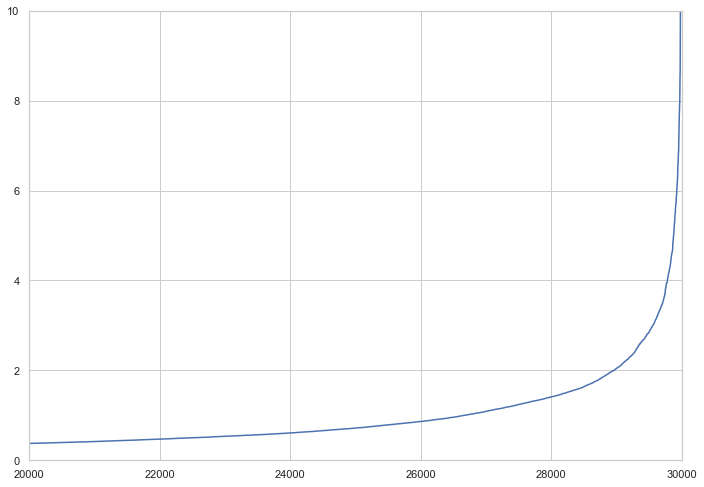

In [119]:
# Zoomed in plot to determine epsilon value
plt.plot(distances)
plt.axis([20000, 30000, 0, 10])
plt.show()

From the above zoomed-in plot, we are able to tell that the optimal epsilon value = 4 at the point of maximum slope. We will proceed to train the DBSCAN clustering algorithm with min_samples=19 and eps=3

In [120]:
# db = DBSCAN(eps=3, min_samples=X_kmeans_scaled.shape[1]).fit(X_kmeans_scaled)
# Define file name for pickle to dump to.
filename = './model/DBSCANFinal.pkl'
# pickle.dump(db, open(filename,'wb'))

# Since we have already trained the model, let us just load the DBSCAN pickle file and check our results.
db = pickle.load(open(filename,'rb'))

In [121]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f'Estimated number of clusters from DBSCAN: {n_clusters_}')
print('Estimated number of noise points: %d' % n_noise_)
dbscan_silhouette = silhouette_score(X_kmeans_scaled, labels)
print("DBSCAN Silhouette Coefficient: %0.3f" % dbscan_silhouette)


Estimated number of clusters from DBSCAN: 3
Estimated number of noise points: 745
DBSCAN Silhouette Coefficient: 0.650


Let us understand the intuition of the clusters from KMeans as an example, by looking at their centroid data

In [122]:
centroid_df = pd.DataFrame(columns=[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])

for cluster in kmeans_final.cluster_centers_:
    centroid_df = centroid_df.append(pd.DataFrame(cluster.reshape(1,-1), columns=list(centroid_df)), ignore_index=True)
    
centroid_df

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.052775,-0.200109,-0.236028,-0.249524,-0.252774,-0.240570,-0.213952,-0.300941,-0.314208,-0.320033,-0.328125,-0.328531,-0.324110,-0.081299,-0.062991,-0.067950,-0.066170,-0.066648,-0.054784
1,0.860539,-0.174902,-0.177104,-0.206904,-0.209913,-0.191169,-0.167661,1.931714,1.984596,1.995170,2.008818,1.982812,1.940406,0.657456,0.512472,0.568114,0.547449,0.554303,0.473309
2,-0.652726,1.670471,1.935109,2.069486,2.096818,1.985202,1.762704,-0.134294,-0.101290,-0.071550,-0.028987,0.005329,0.024218,-0.199793,-0.158504,-0.189430,-0.177496,-0.182275,-0.171142


As an example, we are able to retrieve the centroids information from KMeans method. The centroid dataframe contains the information about the individual cluster centers from KMeans method, we are able to see the standardized values for the repayment histories and amounts paid by the customers belonging in each cluster.

- For cluster 0, we can interpret these customers as medium-low spenders of the credit card, as their standardized values lie in between that of cluster 1 and 2. We can see that they have medium levels of limit balance compared to cluster 1 and 2, and have low payment amounts (PAY_AMT1-6) in previous months. These gorup of customers are still able to pay on time as their values for PAY_0 to PAY_6 are in the low range.

- For cluster 1, we can interpret these customers as high spenders of the credit card, as their standardized values for amount of bill in the previous months (BILL_AMT1-6) and payment amounts in previous months (PAY_AMT1-6) are the largest compared to cluster 0 and 2. We can interpret the as high spenders and still being able to pay their credit card bills on time.

- For cluster 2, we can interpret these customers as people who are consistently unable to pay their credit card bills through the months as their repayment status are of the largest values (PAY_0 to PAY_6) compared to clusters 0 and 1. 

Hence, we are able to give intuitive interpretations of the distribution of customers by using such a clustering method.

From the above, we can see that DBSCAN and KMeans clustering algorithm gave the same number of clusters, with respective silhouette scores of 0.650 and 0.444 respectively. DBSCAN outperformed KMeans, this could be due to the fact that we had a few categorical variables in the standardized dataset for clustering which could hinder the performance of KMeans due to calculation of euclidean distances, but DBSCAN is just a density based method which finds density connected regions.

## Utilizing Clustering information to run predictions on supervised task - No Resample Random Forest Classifier and Undersampled XGBoost Classifier

Let us make use of the clusters we found in KMeans method to do predictions for classifications of defaulters and non-defaulters. We can add in a new set of features as the clusters that they belong to, to see if it improves the prediction. Since we already have an intuitive interpretation of the clusters attained previously from KMeans clustering, we can justify that the clusters will value-add to the current dataset.

Model: Random Forest Classifier and XGBoost Classifier, with 
- Dataset with no clustering information(base)
- Dataset with “clusters” as a feature (cluster-feature)

Scoring metric: Recall score

In [123]:
# Let us make use of the previous data set Xcopy_33 for features and ycopy_3 for labels
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(Xcopy_33, ycopy_3, test_size=0.25, random_state=randomseed, stratify=ycopy_3)
c_scaler = StandardScaler()
X_train_c_scaled = c_scaler.fit_transform(X_train_c)
X_test_c_scaled = c_scaler.transform(X_test_c)

# convert to dataframe
X_train_c_scaled2 = pd.DataFrame(X_train_c_scaled, columns=Xcopy_33.columns)
X_test_c_scaled2 = pd.DataFrame(X_test_c_scaled, columns=Xcopy_33.columns)

In [124]:
from typing import Tuple
def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies k-means clustering to training data to find clusters and predicts them for the test set
    """
    clustering = KMeans(n_clusters=n_clusters, random_state=randomseed, init='k-means++', max_iter=300)
    clustering.fit(X_train)
    # apply the labels
    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = train_labels
    
    # predict labels on the test set
    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    return X_train_clstrs, X_test_clstrs

X_train_clstrs, X_test_clstrs = get_clusters(X_train_c_scaled2, X_test_c_scaled2, 3)

print(X_train_clstrs['clusters'].value_counts())
print(X_test_clstrs['clusters'].value_counts())

0    17127
1     2964
2     2409
Name: clusters, dtype: int64
0    5733
1     986
2     781
Name: clusters, dtype: int64


We can see that we now have a new feature titled 'clusters' in our train and test data set that we can utilize to test model improvements with clustering.

Random forest general parameters to use: 
- RandomForestClassifier(n_estimators=200, max_depth=12, random_state=randomseed)

Datasets:
- Baseline: X_train_c_scaled, X_test_c_scaled, y_train_c, y_test_c
- With added clusters feature: X_train_clstrs, X_test_clstrs, y_train_c, y_test_c

In [125]:
# Model to be trained on baseline dataset (no resample)
# model_nocluster = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=randomseed)

# Fit the model
# model_nocluster.fit(X_train_c_scaled, y_train_c)
# Define file name for pickle to dump to.
filename = './model/RFC_nocluster.pkl'
# pickle.dump(model_nocluster, open(filename,'wb'))

# Since we have already trained the model, let us just load the pickle file and check our results.
model_nocluster = pickle.load(open(filename,'rb'))

# Evaluate
y_preds_nocluster = model_nocluster.predict(X_test_c_scaled)

# Score model
baseline_nocluster_dict = score_model(model_nocluster, X_test_c_scaled, y_test_c)

Model test baseline: 0.779
Model test accuracy: 0.825
Model test recall: 0.360
Model test F1-score: 0.476
Model test precision: 0.705


In [126]:
# Model to be trained on dataset with clustered features (no resample)
# model_cluster = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=randomseed)

# Fit the model
# model_cluster.fit(X_train_clstrs, y_train_c)
# Define file name for pickle to dump to.
filename = './model/RFC_cluster.pkl'
# pickle.dump(model_cluster, open(filename,'wb'))

# Since we have already trained the model, let us just load the pickle file and check our results.
model_cluster = pickle.load(open(filename,'rb'))

# Evaluate
y_preds_cluster = model_cluster.predict(X_test_clstrs)

# Score model
baseline_cluster_dict = score_model(model_cluster, X_test_clstrs, y_test_c)

Model test baseline: 0.779
Model test accuracy: 0.825
Model test recall: 0.365
Model test F1-score: 0.480
Model test precision: 0.698


### Let us use our best model predictor XGBoost previously found with best parameters from cross-validation

- Best parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 100}

Best parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 100}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


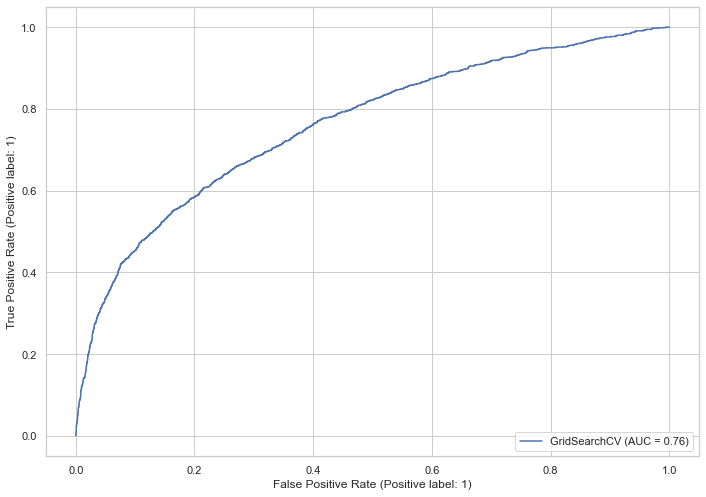

<Figure size 842.4x595.44 with 0 Axes>

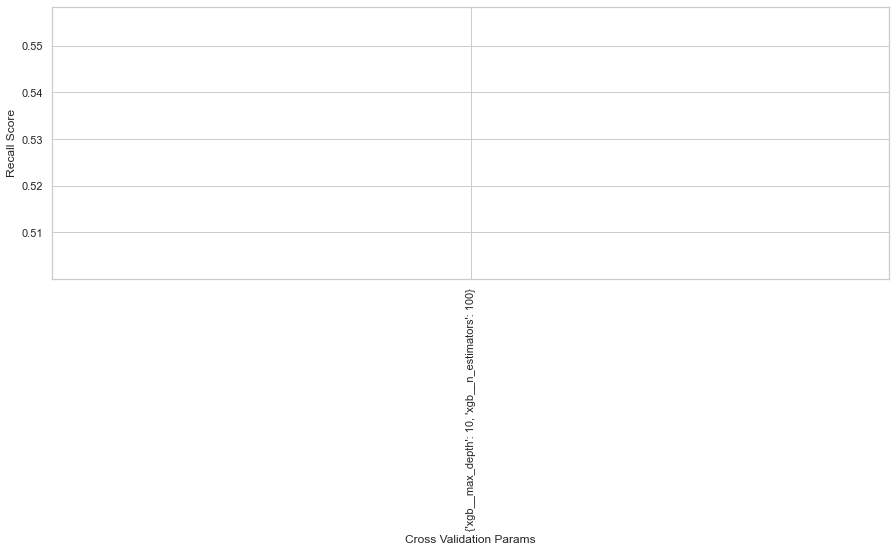

RECALL Best CV Score: 0.5292335169825029
recall_score (Train): 0.942
recall_score (Test): 0.529
f1_score (Train): 0.837
f1_score (Test): 0.515
precision_score (Train): 0.754
precision_score (Test): 0.501
roc_auc_score (Test): 0.761
[[4966  875]
 [ 781  878]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5841
           1       0.50      0.53      0.51      1659

    accuracy                           0.78      7500
   macro avg       0.68      0.69      0.69      7500
weighted avg       0.78      0.78      0.78      7500



In [127]:
nocluster_data = (X_train_c_scaled2, X_test_c_scaled2, y_train_c, y_test_c)
us = RandomUnderSampler(sampling_strategy = 0.6, random_state = randomseed)

# Define file name for pickle to dump to.
filename = './model/XGBoost_nocluster.pkl'

# Define pipeline
pipe_xgb_us_nocluster = Pipeline([
    ('us', us),
    ('columntransform', col_transformer),
    ('xgb', XGBClassifier())
])

# Define param grid
xgb_us_nocluster_param = {
    'xgb__n_estimators': [100],
    'xgb__max_depth': [10],
}


# Train model using the train_model function
# xgb_us_nocluster = train_model(X_train_c_scaled2, y_train_c, pipe_xgb_us_nocluster, xgb_us_nocluster_param, filename, recallscorer)

# Load pickle file since we have already trained the model
xgb_us_nocluster = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(xgb_us_nocluster, nocluster_data, 'XGBoost Classifier Undersample NOCLUSTER')

Best parameters: {'xgb__max_depth': 10, 'xgb__n_estimators': 100}


C:\Users\Gary2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


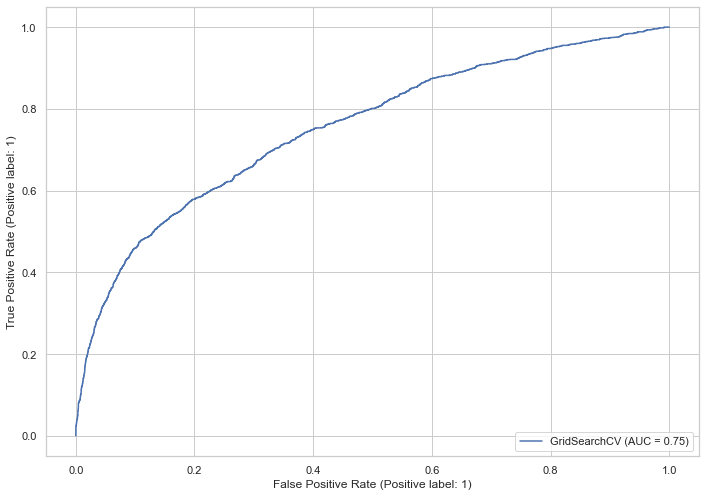

<Figure size 842.4x595.44 with 0 Axes>

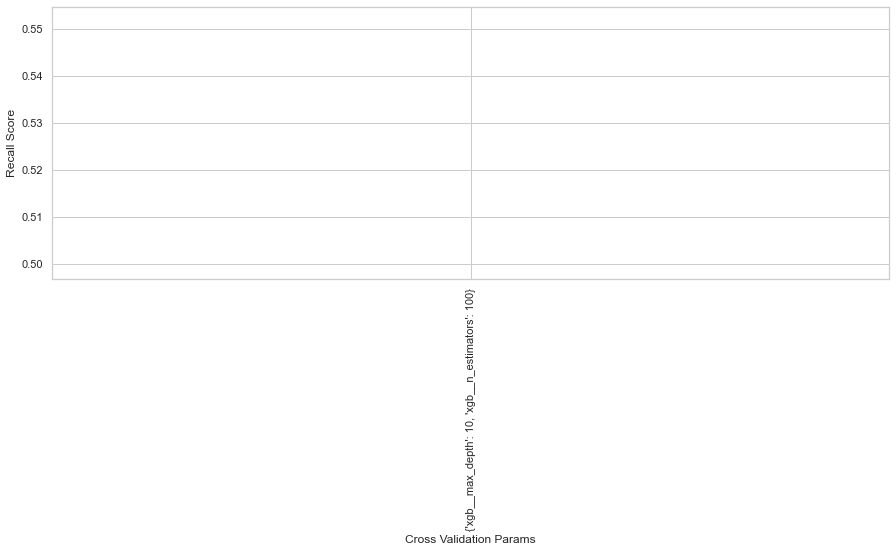

RECALL Best CV Score: 0.525819862364029
recall_score (Train): 0.956
recall_score (Test): 0.536
f1_score (Train): 0.840
f1_score (Test): 0.511
precision_score (Train): 0.750
precision_score (Test): 0.488
roc_auc_score (Test): 0.754
[[4909  932]
 [ 770  889]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5841
           1       0.49      0.54      0.51      1659

    accuracy                           0.77      7500
   macro avg       0.68      0.69      0.68      7500
weighted avg       0.78      0.77      0.78      7500



In [128]:
cluster_data = (X_train_clstrs, X_test_clstrs, y_train_c, y_test_c)

# Define file name for pickle to dump to.
filename = './model/XGBoost_cluster.pkl'

# Define pipeline
pipe_xgb_us_cluster = Pipeline([
    ('us', us),
    ('columntransform', col_transformer),
    ('xgb', XGBClassifier())
])

# Define param grid
xgb_us_cluster_param = {
    'xgb__n_estimators': [100],
    'xgb__max_depth': [10],
}


# Train model using the train_model function
# xgb_us_cluster = train_model(X_train_clstrs, y_train_c, pipe_xgb_us_cluster, xgb_us_cluster_param, filename, recallscorer)

# # Load pickle file since we have already trained the model
xgb_us_cluster = pickle.load(open(filename,'rb'))

# Print results using print_results function
print_results(xgb_us_cluster, cluster_data, 'XGBoost Classifier Undersample CLUSTER')

From the above results, we can clearly see that our clusters features has enhanced our recall score from 0.529 to 0.536. Thus, it is obvious that our base dataset with no cluster feature creates a classifier with poorer performance (recall score). By adding the cluster feature column, we are able to observe a modest boost in performance. Next steps could be to try modelling on each specific clusters, we should expect to see greater improvements in the classification scores.

# Achievement Summary (Unsupervised Learning)

We have implemented various unsupervised learning methods, such as PCA and autoencoders for dimensional reduction before experimenting with clustering algorithms like KMeans and DBSCAN.

PCA:
- We performed PCA to analyze reduced dimensionality of our entire feature dataset, and noted that there are no obvious separable clusters in based on the top 3 principal components plot in plotly express. Hence, we were able to explain the poorer performance in recall based on the current bank dataset for credit defaulters.

Autoencoders:
- We used autoencoders and were able to detect anomalies within the dataset. There was a balance achieved between recall and precision to ensure the highest f1-scores achieved for this model. The model was able to pickup higher mean-squared-error for data on defaulters only compared to data without any defaulters.

KMeans & DBScan clustering:
- Using a subset of the dataset provided such as the bill amount paid, repayment status and repayment amount, we were able to cluster the bank customers into 3 clusters using both KMeans and DBScan. Using KMEans centroids, we were able to make intuitive interpretations of the bank customer's behaviours. In addition, we also proved that by adding 'clusters' feature that each bank customer belonged to, it improves the scores of supervised learning models such as random forests and XGBoost.


# Further Improvement

- We could explore more iterations with different selections of DBScan epsilon and minpts values to obtain a more meaningful number of clusters and with a higher silhouette scores.
- After optimal number of clusters are found, one can make use of the cluster information to perform not only on the entire dataset as an added feature, but also on individual clusters to assess the model classification performance for bank-defaulters and non-defaulters.

# END